<a href="https://colab.research.google.com/github/neuraldl/DLAtypicalSerotoninergicCells/blob/main/Inference_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serotonergic Cell Recognition - DNN - Conv Model
Training & Analyzing


## Set Up Loading

In [ ]:
import os
import pandas as pd
from numpy import array
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from datetime import datetime, timedelta
import IPython
import IPython.display
import sys
# Load the TensorBoard notebook extension
%load_ext tensorboard
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras import layers
import time
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
!pip install tensorflow==2.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling te

## Data Modelling


In [ ]:

# Print iterations progress
def print_progress(iteration, total, prefix='', suffix='', decimals=1, bar_length=100):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        bar_length  - Optional  : character length of bar (Int)
    """
    str_format = "{0:." + str(decimals) + "f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(bar_length * iteration / float(total)))
    bar = '█' * filled_length + '-' * (bar_length - filled_length)

    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()



In [ ]:
lbs_n = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/NSER-DataAugmented/Tot-NSER-Labels-110124.npy')
cls_n = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/NSER-DataAugmented/Tot-NSER-Cellulars-110124.npy')
obs_n = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/NSER-DataAugmented/Tot-NSER-Observations-110124.npy')

lbs_s = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/SER-DataAugmented/Tot-SER-Labels-110124.npy')
cls_s = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/SER-DataAugmented/Tot-SER-Cellulars-110124.npy')
obs_s = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/SER-DataAugmented/Tot-SER-Observations-110124.npy')

KeyboardInterrupt: 

In [ ]:
cls_s.shape, lbs_s.shape, obs_s.shape, cls_n.shape, lbs_n.shape, obs_n.shape

((6675300, 1),
 (6675300, 1),
 (6675300, 160, 2, 1),
 (6025300, 1),
 (6025300, 1),
 (6025300, 160, 2, 1))

In [ ]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
np.unique(lbs_s)

array([0])

In [ ]:
np.unique(lbs_n)

array([1])

In [ ]:
1 in lbs_n

In [ ]:
np.unique(cls_s)

In [ ]:
np.unique(cls_n)

array(['3mean_A131024#140_trigger_1001976.csv',
       '3mean_A131024#140_trigger_1006199.csv',
       '3mean_A131024#140_trigger_1010766.csv', ...,
       '3mean_F160411#051_trigger_988417.csv',
       '3mean_F160411#051_trigger_99324.csv',
       '3mean_F160411#051_trigger_996535.csv'], dtype='<U38')

In [ ]:
import tensorflow as tf
tf.__version__
!pip uninstall tensorflow
!pip install tensorflow==2.14

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.13.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
  

In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/My Drive/NEURONDL/ModelsDNN/ModConvBinNormN20.keras")

## Model Compiling & Training: Continuous Learning

### Non-Homogeneous Data Load

In [ ]:

# Load the Non-Homogeneous data

# Paths to the data directories
directories = {
    "SERTIP": "/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER",
    "NSERTIP": "/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/NSER"
}

# Class labels
labels = {"SERTIP": 0, "NSERTIP": 1}

obsTest = []
lbsTest = []
clsTest = []
i = 0
for label, path in directories.items():
  folders = os.listdir(path)
  folders = sorted(folders)
  for folder in folders:
    if 'IMAGES' not in folder:
      path_folder = os.path.join(path,folder)
      print(path_folder)
      files = os.listdir(path_folder)
      print(len(files))
      i=0
      for file_name in files:
        file_path = os.path.join(path_folder, file_name)
        recordT = pd.read_csv(file_path,header=0)
        if len(recordT)==160:
          recordT = recordT.to_numpy().reshape(len(recordT),2,1)
          if len(obsTest)==0:
            obsTest = [recordT]
          else:
            obsTest = np.append(obsTest,[recordT], axis=0)
          clsTest = np.append(clsTest,[file_name.split('_')[0]])
          lbsTest = np.append(lbsTest,[labels[label]], axis=0)
          i+=1
lbsTest = lbsTest.reshape(len(lbsTest),1)
clsTest = clsTest.reshape(len(clsTest),1)
num_classes = 2
X_test_new = obsTest
y_test_new = lbsTest
print((len(X_test_new),len(y_test_new)))
# convert class vectors to binary class matrices
y_test_new_cat = keras.utils.to_categorical(y_test_new, num_classes)
testData = pd.DataFrame(columns=[])

testData['Cell_Name'] = clsTest.tolist()
testData['Cell_Name'] = testData['Cell_Name'].astype('string')
testData['Cell_Type'] = lbsTest.tolist()
testCellType = []
grouped_data_test = testData.groupby('Cell_Name')
for cell_name_test, group_test in grouped_data_test:
  #print(cell_name_test)
  record_t = group_test['Cell_Type'].iloc[0]
  if len(testCellType)==0:
    testCellType = [record_t]
  else:
    testCellType = np.append(testCellType,[record_t], axis=0)

/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160119#001
700
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160125#009
240
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160125#049
283
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160125#087
263
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160127#011
179
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160127#035
174
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160127#090
163
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160127#118
277
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/SER/A160129#038
700
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/NON HOMO2/

In [ ]:
# Load the Non-Homogeneous data Old

# Paths to the data directories
directories = {
    "SERTIP": "/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/TEST/SER",
    "NSERTIP": "/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/TEST/NSER"
}

# Class labels
labels = {"SERTIP": 0, "NSERTIP": 1}

obsTesto = []
lbsTesto = []
clsTesto = []
i = 0
for label, path in directories.items():
  folders = os.listdir(path)
  folders = sorted(folders)
  for folder in folders:
    if 'IMAGES' not in folder:
      path_folder = os.path.join(path,folder)
      print(path_folder)
      files = os.listdir(path_folder)
      print(len(files))
      i=0
      for file_name in files:
        file_path = os.path.join(path_folder, file_name)
        recordT = pd.read_csv(file_path,header=0)
        if len(recordT)==160:
          recordT = recordT.to_numpy().reshape(len(recordT),2,1)
          if len(obsTesto)==0:
            obsTesto = [recordT]
          else:
            obsTesto = np.append(obsTesto,[recordT], axis=0)
          clsTesto = np.append(clsTesto,[file_name.split('_')[0]])
          lbsTesto = np.append(lbsTesto,[labels[label]], axis=0)
          i+=1
lbsTesto = lbsTesto.reshape(len(lbsTesto),1)
clsTesto = clsTesto.reshape(len(clsTesto),1)
num_classes = 2
X_test_newo = obsTesto
y_test_newo = lbsTesto
print((len(X_test_new),len(y_test_new)))
# convert class vectors to binary class matrices
y_test_new_cat = keras.utils.to_categorical(y_test_new, num_classes)
testData = pd.DataFrame(columns=[])

testData['Cell_Name'] = clsTesto.tolist()
testData['Cell_Name'] = testData['Cell_Name'].astype('string')
testData['Cell_Type'] = lbsTesto.tolist()
testCellType = []
grouped_data_test = testData.groupby('Cell_Name')
for cell_name_test, group_test in grouped_data_test:
  #print(cell_name_test)
  record_t = group_test['Cell_Type'].iloc[0]
  if len(testCellType)==0:
    testCellType = [record_t]
  else:
    testCellType = np.append(testCellType,[record_t], axis=0)

/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/TEST/SER/A151028#001
159
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/TEST/SER/A151028#021
130


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
for label, path in directories.items():
  folders = os.listdir(path)
  folders = sorted(folders)
  for folder in folders:
    print('# Folders for type: '+str(label)+' '+str(len(folders)))

# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders for type: SERTIP 56
# Folders 

### Blind Data Load

In [ ]:
# Load the Blind data

# Paths to the data directories
directories = {
    "BLIND": "/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND",
}

# Class labels
labels = {"BLIND": -1}

obsTestB = []
lbsTestB = []
clsTestB = []
i = 0
for label, path in directories.items():
  folders = os.listdir(path)
  folders = sorted(folders)
  for folder in folders:
    if 'IMAGES' not in folder:
      path_folder = os.path.join(path,folder)
      print(path_folder)
      files = os.listdir(path_folder)
      print(len(files))
      i=0
      for file_name in files:
        file_path = os.path.join(path_folder, file_name)
        recordT = pd.read_csv(file_path,header=0)
        if len(recordT)==160:
          recordT = recordT.to_numpy().reshape(len(recordT),2,1)
          if len(obsTestB)==0:
            obsTestB = [recordT]
          else:
            obsTestB = np.append(obsTestB,[recordT], axis=0)
          clsTestB = np.append(clsTestB,[file_name.split('_')[0]])
          lbsTestB = np.append(lbsTestB,[labels[label]], axis=0)
          i+=1
lbsTestB = lbsTestB.reshape(len(lbsTestB),1)
clsTestB = clsTestB.reshape(len(clsTestB),1)
X_test_b = obsTestB

/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A131031#013
296
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A131031#079
259
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A131031#088
11
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A131031#200
293
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A140121#160
700
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A140122#028
568
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A140122#037
700
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A140122#087
700
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A140212#000
80
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Single-Spikes/BLIND/A140212#009
158
/content/drive/MyDrive/NEURONDL/NEW-RAW-20231205 /3rd-RUN-Sing

In [ ]:
#dfTotNormScores = pd.DataFrame(columns=['Model','Test loss','Test accuracy','Test Precision','Test Recall','Test Binary Accuracy','Test False Positives','Test False Negatives',' Test Sensitivity At Specificity 0.5'])
#dfNonHomScores = pd.DataFrame(columns=['Training Session','Test Binary Accuracy',' Test Sensitivity At Specificity 0.5','Test Confusion Matrix'])
#final_test_result_b = pd.DataFrame(columns=['Training Session','Cell_Name','Cell_Type_Name','Cell_Type','Cell_Type_Cat'])
dfTotNormScores = pd.read_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugModConvBinNormN_Tot_Scores.csv')
dfNonHomScores = pd.read_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugModConvBinNormN_NonHomogeneous_Scores-v.csv')
final_test_result_b = pd.read_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugBlindTestResults.csv')


In [ ]:
dfTotNormScores = dfTotNormScores.drop('Unnamed: 0',axis=1)
dfNonHomScores = dfNonHomScores.drop('Unnamed: 0',axis=1)
final_test_result_b = final_test_result_b.drop('Unnamed: 0',axis=1)

In [ ]:
dfNonHomScores

Training Session                            Test Binary Accuracy  \
0                   0   tf.Tensor(0.8095238, shape=(), dtype=float32)   
1                   1  tf.Tensor(0.85714287, shape=(), dtype=float32)   
2                   2  tf.Tensor(0.85714287, shape=(), dtype=float32)   
3                   3  tf.Tensor(0.85714287, shape=(), dtype=float32)   
4                   4  tf.Tensor(0.85714287, shape=(), dtype=float32)   
..                ...                                             ...   
194               194   tf.Tensor(0.7619048, shape=(), dtype=float32)   
195               195   tf.Tensor(0.7619048, shape=(), dtype=float32)   
196               196   tf.Tensor(0.7619048, shape=(), dtype=float32)   
197               197   tf.Tensor(0.8095238, shape=(), dtype=float32)   
198               198   tf.Tensor(0.7619048, shape=(), dtype=float32)   

                Test Sensitivity At Specificity 0.5  \
0           tf.Tensor(0.8, shape=(), dtype=float32)   
1     tf.Tensor(0.8181818, shape=(), dtype=float32)   
2     tf.Tensor(0.8181818, shape=(), dtype=float32)   
3     tf.Tensor(0.8181818, shape=(), dtype=float32)   
4     tf.Tensor(0.8181818, shape=(), dtype=float32)   
..                                              ...   
194  tf.Tensor(0.72727275, shape=(), dtype=float32)   
195  tf.Tensor(0.72727275, shape=(), dtype=float32)   
196  tf.Tensor(0.72727275, shape=(), dtype=float32)   
197        tf.Tensor(0.75, shape=(), dtype=float32)   
198  tf.Tensor(0.72727275, shape=(), dtype=float32)   

                                 Test Confusion Matrix  
0    [[0.81818182 0.2       ]\n [0.18181818 0.8    ...  
1    [[0.9        0.18181818]\n [0.1        0.81818...  
2    [[0.9        0.18181818]\n [0.1        0.81818...  
3    [[0.9        0.18181818]\n [0.1        0.81818...  
4    [[0.9        0.18181818]\n [0.1        0.81818...  
..                                                 ...  
194  [[0.8        0.27272727]\n [0.2        0.72727...  
195  [[0.8        0.27272727]\n [0.2        0.72727...  
196  [[0.8        0.27272727]\n [0.2        0.72727...  
197  [[0.88888889 0.25      ]\n [0.11111111 0.75   ...  
198  [[0.8        0.27272727]\n [0.2        0.72727...  

[199 rows x 4 columns]

### Continuous Learning and Testing

(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v195.keras
Loaded Model : ModConvBinNormN20-v194
Epoch 1/25
694/694 [==============================] - 12s 7ms/step - loss: 0.0205 - accuracy: 0.9948 - precision: 0.9948 - recall: 0.9948 - binary_accuracy: 0.9948 - false_positives: 233.0000 - false_negatives: 233.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9991 - val_precision: 0.9991 - val_recall: 0.9991 - val_binary_accuracy: 0.9991 - val_false_positives: 9.0000 - val_false_negatives: 9.0000 - val_sensitivity_at_specificity: 1.0000
Epoch 2/25
694/694 [==============================] - 4s 6ms/step - loss: 0.0175 - accuracy: 0.9963 - precision: 0.9963 - recall: 0.9963 - binary_accuracy: 0.9963 - false_positives: 166.0000 - false_negatives: 166.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9979 - val_precision: 0.9979 - val_r

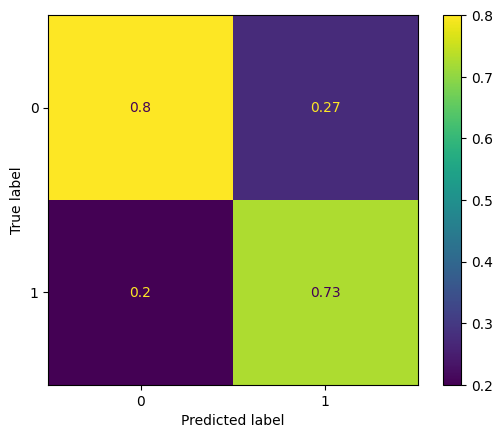

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - NSER - 1 - [0.452, 0.548]
Cell: ['A131031#079'] - NSER - 1 - [0.049, 0.951]
Cell: ['A131031#088'] - NSER - 1 - [0.458, 0.538]
Cell: ['A131031#200'] - SER - 0 - [0.616, 0.384]
Cell: ['A140121#160'] - SER - 0 - [0.628, 0.372]
Cell: ['A140122#028'] - SER - 0 - [0.877, 0.123]
Cell: ['A140122#037'] - NSER - 1 - [0.018, 0.982]
Cell: ['A140122#087'] - NSER - 1 - [0.018, 0.982]
Cell: ['A140212#000'] - NSER - 1 - [0.247, 0.753]
Cell: ['A140212#009'] - NSER - 1 - [0.004, 0.996]
Cell: ['A140212#011'] - NSER - 1 - [0.047, 0.95]
Cell: ['A140212#021'] - NSER - 1 - [0.181, 0.818]
Cell: ['A140212#031'] - SER - 0 - [0.97, 0.03]
Cell: ['A140212#038'] - SER - 0 - [0.989, 0.011]
Cell: ['A140212#040'] - SER - 0 - [0.978, 0.023]
Cell: ['A140212#043'] - SER - 0 - [0.982, 0.018]
Cell: ['A140313#006'] - SER - 0 - [0.941, 0.059]
Cell: ['A140313#014'] - NSER - 1 - [0.15, 0.85]
Cell: ['A140313#016'] - SER - 0 - [0.942, 0.058]
Cell: ['A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v196.keras
Loaded Model : ModConvBinNormN20-v195
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.1173 - accuracy: 0.9717 - precision: 0.9718 - recall: 0.9717 - binary_accuracy: 0.9717 - false_positives: 1254.0000 - false_negatives: 1258.0000 - sensitivity_at_specificity: 0.9974 - val_loss: 0.0299 - val_accuracy: 0.9905 - val_precision: 0.9905 - val_recall: 0.9905 - val_binary_accuracy: 0.9905 - val_false_positives: 90.0000 - val_false_negatives: 90.0000 - val_sensitivity_at_specificity: 0.9998
Epoch 2/25
694/694 [==============================] - 4s 6ms/step - loss: 0.0481 - accuracy: 0.9850 - precision: 0.9850 - recall: 0.9850 - binary_accuracy: 0.9850 - false_positives: 668.0000 - false_negatives: 666.0000 - sensitivity_at_specificity: 0.9993 - val_loss: 0.0276 - val_accuracy: 0.9903 - val_precision: 0.9903 - va

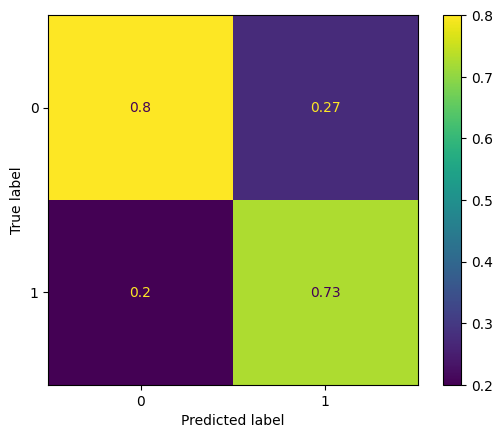

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - NSER - 1 - [0.48, 0.519]
Cell: ['A131031#079'] - NSER - 1 - [0.05, 0.95]
Cell: ['A131031#088'] - SER - 0 - [0.503, 0.499]
Cell: ['A131031#200'] - SER - 0 - [0.661, 0.34]
Cell: ['A140121#160'] - SER - 0 - [0.787, 0.213]
Cell: ['A140122#028'] - SER - 0 - [0.958, 0.042]
Cell: ['A140122#037'] - NSER - 1 - [0.018, 0.982]
Cell: ['A140122#087'] - NSER - 1 - [0.029, 0.971]
Cell: ['A140212#000'] - NSER - 1 - [0.169, 0.831]
Cell: ['A140212#009'] - NSER - 1 - [0.005, 0.995]
Cell: ['A140212#011'] - NSER - 1 - [0.091, 0.909]
Cell: ['A140212#021'] - NSER - 1 - [0.159, 0.841]
Cell: ['A140212#031'] - SER - 0 - [0.971, 0.029]
Cell: ['A140212#038'] - SER - 0 - [0.989, 0.011]
Cell: ['A140212#040'] - SER - 0 - [0.974, 0.026]
Cell: ['A140212#043'] - SER - 0 - [0.984, 0.016]
Cell: ['A140313#006'] - SER - 0 - [0.927, 0.073]
Cell: ['A140313#014'] - NSER - 1 - [0.166, 0.834]
Cell: ['A140313#016'] - SER - 0 - [0.932, 0.068]
Cell: ['A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v197.keras
Loaded Model : ModConvBinNormN20-v196
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.0339 - accuracy: 0.9953 - precision: 0.9953 - recall: 0.9954 - binary_accuracy: 0.9954 - false_positives: 207.0000 - false_negatives: 206.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9991 - val_precision: 0.9991 - val_recall: 0.9991 - val_binary_accuracy: 0.9991 - val_false_positives: 9.0000 - val_false_negatives: 9.0000 - val_sensitivity_at_specificity: 1.0000
Epoch 2/25
694/694 [==============================] - 4s 6ms/step - loss: 0.0160 - accuracy: 0.9960 - precision: 0.9959 - recall: 0.9960 - binary_accuracy: 0.9960 - false_positives: 180.0000 - false_negatives: 179.0000 - sensitivity_at_specificity: 0.9997 - val_loss: 0.0035 - val_accuracy: 0.9994 - val_precision: 0.9994 - val_re

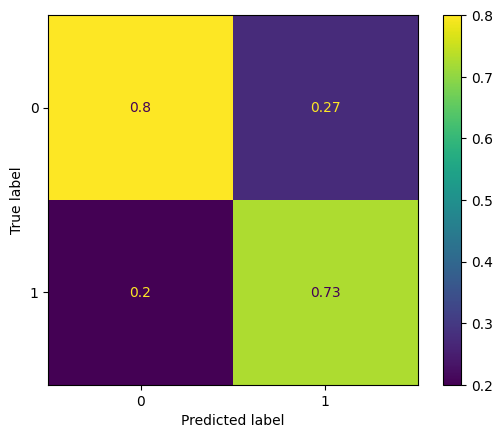

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - SER - 0 - [0.506, 0.494]
Cell: ['A131031#079'] - NSER - 1 - [0.051, 0.949]
Cell: ['A131031#088'] - SER - 0 - [0.537, 0.462]
Cell: ['A131031#200'] - SER - 0 - [0.677, 0.321]
Cell: ['A140121#160'] - SER - 0 - [0.719, 0.281]
Cell: ['A140122#028'] - SER - 0 - [0.941, 0.06]
Cell: ['A140122#037'] - NSER - 1 - [0.019, 0.981]
Cell: ['A140122#087'] - NSER - 1 - [0.03, 0.97]
Cell: ['A140212#000'] - NSER - 1 - [0.174, 0.826]
Cell: ['A140212#009'] - NSER - 1 - [0.007, 0.993]
Cell: ['A140212#011'] - NSER - 1 - [0.097, 0.903]
Cell: ['A140212#021'] - NSER - 1 - [0.176, 0.823]
Cell: ['A140212#031'] - SER - 0 - [0.971, 0.029]
Cell: ['A140212#038'] - SER - 0 - [0.986, 0.014]
Cell: ['A140212#040'] - SER - 0 - [0.978, 0.022]
Cell: ['A140212#043'] - SER - 0 - [0.983, 0.017]
Cell: ['A140313#006'] - SER - 0 - [0.932, 0.068]
Cell: ['A140313#014'] - NSER - 1 - [0.193, 0.805]
Cell: ['A140313#016'] - SER - 0 - [0.929, 0.071]
Cell: ['A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v198.keras
Loaded Model : ModConvBinNormN20-v197
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.2249 - accuracy: 0.9699 - precision: 0.9698 - recall: 0.9699 - binary_accuracy: 0.9698 - false_positives: 1340.0000 - false_negatives: 1339.0000 - sensitivity_at_specificity: 0.9973 - val_loss: 0.0357 - val_accuracy: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883 - val_binary_accuracy: 0.9883 - val_false_positives: 111.0000 - val_false_negatives: 111.0000 - val_sensitivity_at_specificity: 0.9995
Epoch 2/25
694/694 [==============================] - 5s 7ms/step - loss: 0.0574 - accuracy: 0.9817 - precision: 0.9817 - recall: 0.9817 - binary_accuracy: 0.9817 - false_positives: 812.0000 - false_negatives: 812.0000 - sensitivity_at_specificity: 0.9993 - val_loss: 0.0223 - val_accuracy: 0.9932 - val_precision: 0.9932 - 

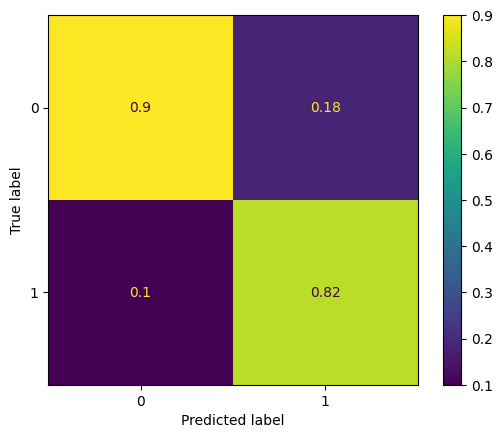

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - SER - 0 - [0.589, 0.411]
Cell: ['A131031#079'] - NSER - 1 - [0.044, 0.956]
Cell: ['A131031#088'] - SER - 0 - [0.53, 0.47]
Cell: ['A131031#200'] - SER - 0 - [0.642, 0.356]
Cell: ['A140121#160'] - SER - 0 - [0.585, 0.414]
Cell: ['A140122#028'] - SER - 0 - [0.951, 0.048]
Cell: ['A140122#037'] - NSER - 1 - [0.019, 0.981]
Cell: ['A140122#087'] - NSER - 1 - [0.032, 0.967]
Cell: ['A140212#000'] - NSER - 1 - [0.173, 0.827]
Cell: ['A140212#009'] - NSER - 1 - [0.006, 0.994]
Cell: ['A140212#011'] - NSER - 1 - [0.024, 0.976]
Cell: ['A140212#021'] - NSER - 1 - [0.202, 0.797]
Cell: ['A140212#031'] - SER - 0 - [0.981, 0.018]
Cell: ['A140212#038'] - SER - 0 - [0.987, 0.013]
Cell: ['A140212#040'] - SER - 0 - [0.982, 0.018]
Cell: ['A140212#043'] - SER - 0 - [0.99, 0.01]
Cell: ['A140313#006'] - SER - 0 - [0.958, 0.042]
Cell: ['A140313#014'] - NSER - 1 - [0.138, 0.862]
Cell: ['A140313#016'] - SER - 0 - [0.936, 0.063]
Cell: ['A1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v199.keras
Loaded Model : ModConvBinNormN20-v198
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.0241 - accuracy: 0.9948 - precision: 0.9948 - recall: 0.9948 - binary_accuracy: 0.9948 - false_positives: 230.0000 - false_negatives: 230.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9986 - val_precision: 0.9986 - val_recall: 0.9986 - val_binary_accuracy: 0.9986 - val_false_positives: 13.0000 - val_false_negatives: 13.0000 - val_sensitivity_at_specificity: 1.0000
Epoch 2/25
694/694 [==============================] - 5s 7ms/step - loss: 0.0143 - accuracy: 0.9960 - precision: 0.9960 - recall: 0.9960 - binary_accuracy: 0.9960 - false_positives: 178.0000 - false_negatives: 178.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9988 - val_precision: 0.9988 - val_

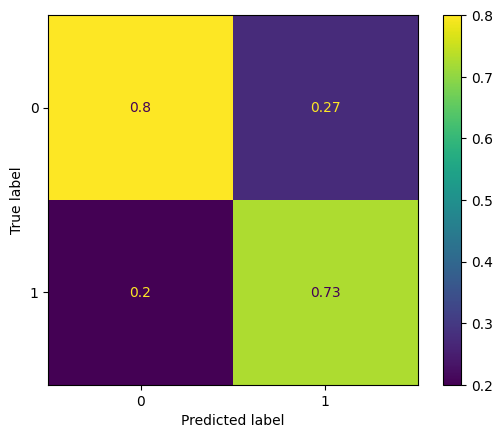

262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - SER - 0 - [0.581, 0.419]
Cell: ['A131031#079'] - NSER - 1 - [0.047, 0.953]
Cell: ['A131031#088'] - SER - 0 - [0.538, 0.462]
Cell: ['A131031#200'] - SER - 0 - [0.654, 0.346]
Cell: ['A140121#160'] - SER - 0 - [0.545, 0.455]
Cell: ['A140122#028'] - SER - 0 - [0.957, 0.043]
Cell: ['A140122#037'] - NSER - 1 - [0.02, 0.98]
Cell: ['A140122#087'] - NSER - 1 - [0.025, 0.974]
Cell: ['A140212#000'] - NSER - 1 - [0.153, 0.847]
Cell: ['A140212#009'] - NSER - 1 - [0.006, 0.994]
Cell: ['A140212#011'] - NSER - 1 - [0.028, 0.972]
Cell: ['A140212#021'] - NSER - 1 - [0.19, 0.809]
Cell: ['A140212#031'] - SER - 0 - [0.975, 0.025]
Cell: ['A140212#038'] - SER - 0 - [0.984, 0.016]
Cell: ['A140212#040'] - SER - 0 - [0.978, 0.022]
Cell: ['A140212#043'] - SER - 0 - [0.984, 0.015]
Cell: ['A140313#006'] - SER - 0 - [0.953, 0.047]
Cell: ['A140313#014'] - NSER - 1 - [0.115, 0.884]
Cell: ['A140313#016'] - SER - 0 - [0.918, 0.081]
Cell: ['A

In [ ]:
#a = 44
dimN = 160
step_a=50
step_b = 10000
start_m = 20
end_m = 32
#dfTotNormScores = pd.DataFrame(columns=['Model','Test loss','Test accuracy','Test Precision','Test Recall','Test Binary Accuracy','Test False Positives','Test False Negatives',' Test Sensitivity At Specificity 0.5'])
#dfNonHomScores = pd.DataFrame(columns=['Training Session','Test Binary Accuracy',' Test Sensitivity At Specificity 0.5','Test Confusion Matrix'])
#final_test_result_b = pd.DataFrame(columns=['Training Session','Cell_Name','Cell_Type_Name','Cell_Type','Cell_Type_Cat'])
for a in range(195,200,1):
  b=0
  obs_s_t = []
  obs_n_t = []
  obs_t = []
  lbs_s_t = []
  lbs_n_t = []
  lbs_t = []
  cls_s_t = []
  cls_n_t = []
  cls_t = []
  while a*step_a + b*step_b  < max(len(obs_s),len(obs_n)):
    if a*step_a + b*step_b  <= len(obs_s):
      obs_s_t = np.append(obs_s_t, obs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(obs_s_t)>0 else obs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      lbs_s_t = np.append(lbs_s_t, lbs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(lbs_s_t)>0 else lbs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      cls_s_t = np.append(cls_s_t, cls_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(cls_s_t)>0 else cls_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
    if a*step_a + b*step_b  <= len(obs_n):
      obs_n_t = np.append(obs_n_t, obs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(obs_n_t)>0 else obs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      lbs_n_t = np.append(lbs_n_t, lbs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(lbs_n_t)>0 else lbs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      cls_n_t = np.append(cls_n_t, cls_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(cls_n_t)>0 else cls_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
    b = b+1
  obs_t = np.append(obs_s_t,obs_n_t, axis = 0)
  lbs_t = np.append(lbs_s_t,lbs_n_t, axis = 0)
  cls_t = np.append(cls_s_t,cls_n_t, axis = 0)
  print(obs_s_t.shape)
  print(obs_n_t.shape)
  print(obs_t.shape)
  # Features and labels
  X = obs_t
  y = lbs_t
  # Splitting the data into training, validation, and test sets
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
  # Model / data parameters
  num_classes = 2
  print("x_train shape:", X_train.shape)
  print(X_train.shape[0], "train samples")
  print(X_test.shape[0], "test samples")
  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  y_val = keras.utils.to_categorical(y_val, num_classes)
  for i in range(start_m,end_m,1):
    keras.backend.clear_session()
    model_name = "ModConvBinNormN"+str(i)+"-v"+str(a)+".keras"
    print(model_name)
    if a == 0:
      input_shape = (dimN,2,1)
      modelConv = keras.Sequential(
          [
              keras.Input(shape=input_shape),
              layers.LayerNormalization(axis=[1]),
              layers.Conv2D(32, kernel_size=(i, 1), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 1)),
              layers.Conv2D(64, kernel_size=(i, 1), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 2)),
              layers.Flatten(),
              layers.Dropout(0.5),
              layers.Dense(num_classes, activation="sigmoid"),
          ]
      )
      modelConv.summary()
      modelConv.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.SensitivityAtSpecificity(0.5)])
    else:
      keras.backend.clear_session()
      modelConv = tf.keras.models.load_model("/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a-1)+".keras")
      print('Loaded Model : ModConvBinNormN'+str(i)+'-v'+str(a-1))
      #modelConv.summary()
    batch_size = 64
    epochs = 25
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=10,
                                                      mode='min')
    log_dir = "/content/drive/My Drive/NEURONDL/ModelsDNN/logs_article/serot/data-aug-fit/ModConvBinNormN"+str(i)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    history = modelConv.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping,tensorboard_callback])#validation_split=0.1)
    score = modelConv.evaluate(X_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    modelConv.save("/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a)+".keras")
    hist_df = pd.DataFrame(history.history)
    pathH = "/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTH/ModConvBinNormN"+str(i)+"-v"+str(a)+"_history.csv"
    hist_df.to_csv(pathH)
    modelConv.summary()
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    r = len(dfTotNormScores)
    dfTotNormScores.loc[r] = [model_name, score[0], score[1], score[2], score[3], score[4], score[5], score[6],score[7]]
    dfTotNormScores.to_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugModConvBinNormN_Tot_Scores.csv')
  #### Non-Homogeneous Data Test
  prsList = []
  for i in range(start_m,end_m,1):
    keras.backend.clear_session()
    loaded_model = tf.keras.models.load_model("/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a)+".keras")
    prs=loaded_model.predict(X_test_new)
    if len(prsList)>0:
      prsList = np.append(prsList,[prs],axis=0)
    else:
      prsList = [prs]
  testPrs= np.mean(prsList,axis=0)
  testPrs = np.argmax(testPrs,axis=1)
  testResults = pd.DataFrame(columns=[])
  testResults['Cell_Name'] = clsTest.tolist()
  testResults['Cell_Name'] = testResults['Cell_Name'].astype('string')
  testPrsCat= np.mean(prsList,axis=0)
  testPrs = np.argmax(testPrsCat,axis=1)
  #testPrsCat= np.round(testPrsCat,decimals=0)
  testResults['Cell_Prediction_Cat'] = testPrsCat.tolist()
  testPrs = np.argmax(testPrsCat,axis=1)
  testResults['Cell_Prediction_Bin'] = testPrs.tolist()
  # Step 2: Group by 'cell_name'
  grouped_data = testResults.groupby('Cell_Name')
  test_cell_type_pred = []
  for cell_name, group in grouped_data:
      mean_cell = np.mean(group['Cell_Prediction_Cat'].tolist(),axis=0)
      print(np.round(mean_cell[0],3))
      print(np.round(mean_cell[1],3))
      if mean_cell[0] > mean_cell[1]:
          status = 0
      else:
          status = 1

      if len(test_cell_type_pred)==0:
        test_cell_type_pred = [status]
      else:
        test_cell_type_pred = np.append(test_cell_type_pred,[status], axis=0)
      print(f"Cell: {cell_name} - {status}")
  m = keras.metrics.BinaryAccuracy()
  m.update_state(test_cell_type_pred, testCellType)
  bin_acc = m.result()
  conf_mat_result = confusion_matrix(testCellType, test_cell_type_pred , normalize='pred')
  print(conf_mat_result)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_result,display_labels=None)
  disp.plot()
  plt.show()
  mSens = keras.metrics.SensitivityAtSpecificity(0.5)
  mSens.update_state(test_cell_type_pred, testCellType)
  sens_spec = mSens.result()
  dfNonHomScores.loc[a] = [a, bin_acc, sens_spec, conf_mat_result]
  dfNonHomScores.to_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugModConvBinNormN_NonHomogeneous_Scores-v.csv')
  #### Blind Data Test
  prsListB = []
  for i in range(start_m,end_m,1):
    keras.backend.clear_session()
    loaded_model = tf.keras.models.load_model("/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a)+".keras")
    prs=loaded_model.predict(X_test_b)
    if len(prsListB)>0:
      prsListB = np.append(prsListB,[prs],axis=0)
    else:
      prsListB = [prs]
  testPrsB= np.mean(prsListB,axis=0)
  testPrsB = np.argmax(testPrsB,axis=1)
  testResultsB = pd.DataFrame(columns=[])
  testResultsB['Cell_Name'] = clsTestB.tolist()
  testResultsB['Cell_Name'] = testResultsB['Cell_Name'].astype('string')
  testPrsCatB= np.mean(prsListB,axis=0)
  testPrsB = np.argmax(testPrsCatB,axis=1)
  testResultsB['Cell_Prediction_Cat'] = testPrsCatB.tolist()
  testPrsB = np.argmax(testPrsCatB,axis=1)
  testResultsB['Cell_Prediction_Bin'] = testPrsB.tolist()
  # Step 2: Group by 'cell_name'
  grouped_data_b = testResultsB.groupby('Cell_Name')
  test_cell_type_pred_str_b = []
  test_cell_type_pred_cat_b = []
  test_cell_type_pred_b = []
  test_cell_name_b = []
  for cell_name_b, group_b in grouped_data_b:
      mean_cell = np.mean(group_b['Cell_Prediction_Cat'].tolist(),axis=0)
      status_cat = [np.round(mean_cell[0],3),np.round(mean_cell[1],3)]
      if mean_cell[0] > mean_cell[1]:
        status = 0
        status_name = 'SER'
      else:
        status = 1
        status_name = 'NSER'

      if len(test_cell_type_pred_b)==0:
        test_cell_type_pred_str_b = [status_name]
        test_cell_type_pred_cat_b = [status_cat]
        test_cell_type_pred_b = [status]
        test_cell_name_b = [cell_name_b]
      else:
        test_cell_type_pred_str_b = np.append(test_cell_type_pred_str_b,[status_name], axis=0)
        test_cell_type_pred_cat_b = np.append(test_cell_type_pred_cat_b,[status_cat], axis=0)
        test_cell_type_pred_b = np.append(test_cell_type_pred_b,[status], axis=0)
        test_cell_name_b = np.append(test_cell_name_b,[cell_name_b], axis=0)

      print(f"Cell: {cell_name_b} - {status_name} - {status} - {status_cat}")
  final_test_result_b.loc[a] = [a, test_cell_name_b, test_cell_type_pred_str_b, test_cell_type_pred_b,test_cell_type_pred_cat_b.tolist()]
  final_test_result_b.to_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugBlindTestResults.csv')
  a = a+1


### Non Homogeneous Data - Test and Results

749/749 [==============================] - 3s 4ms/step
0.827
0.173
Cell: ['A160119#001'] - 0
0.876
0.123
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.488
0.511
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.99
0.01
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.979
0.021
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.988
0.012
Cell: ['A160205#051'] - 0
0.103
0.897
Cell: ['A160426#021'] - 1
0.0
1.0
Cell: ['A160426#080'] - 1
0.104
0.896
Cell: ['A160427#022'] - 1
0.303
0.696
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.0
1.0
Cell: ['A160427#039'] - 1
0.097
0.902
Cell: ['A160427#041'] - 1
0.077
0.923
Cell: ['A160427#047'] - 1
0.98
0.02
Cell: ['A160427#049'] - 0
0.036
0.964
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.263
0.737
Cell: ['A160427#075'] - 1
0.028
0.972
Cell: ['A160427#084'] - 1
0.483
0.516
Cell: ['A16

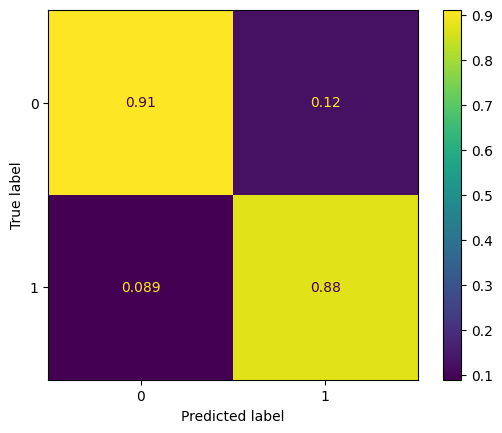

749/749 [==============================] - 3s 3ms/step
0.758
0.243
Cell: ['A160119#001'] - 0
0.83
0.17
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.404
0.597
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.068
0.932
Cell: ['A160426#021'] - 1
0.011
0.989
Cell: ['A160426#080'] - 1
0.052
0.948
Cell: ['A160427#022'] - 1
0.212
0.788
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.0
1.0
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.121
0.879
Cell: ['A160427#047'] - 1
0.999
0.001
Cell: ['A160427#049'] - 0
0.07
0.93
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.135
0.865
Cell: ['A160427#075'] - 1
0.008
0.992
Cell: ['A160427#084'] - 1
0.308
0.693
Cell: [

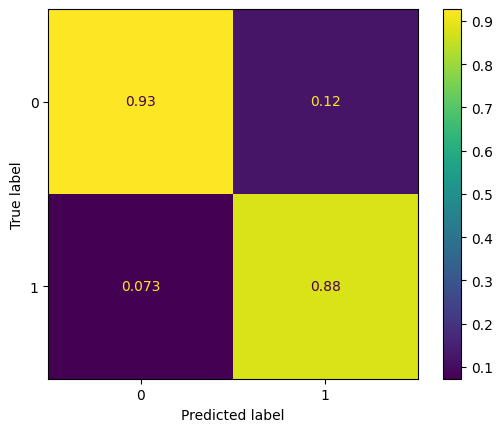

749/749 [==============================] - 3s 4ms/step
0.757
0.243
Cell: ['A160119#001'] - 0
0.828
0.172
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.435
0.564
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.984
0.016
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.059
0.941
Cell: ['A160426#021'] - 1
0.011
0.989
Cell: ['A160426#080'] - 1
0.054
0.946
Cell: ['A160427#022'] - 1
0.193
0.807
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.003
0.997
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.095
0.905
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.064
0.935
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.161
0.838
Cell: ['A160427#075'] - 1
0.013
0.987
Cell: ['A160427#084'] - 1
0.37
0.629
Cell: ['A160

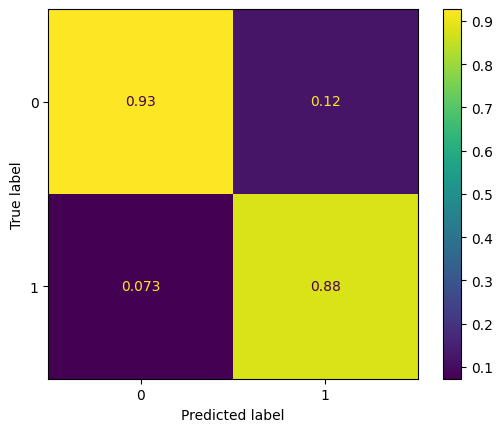

749/749 [==============================] - 2s 2ms/step
0.885
0.115
Cell: ['A160119#001'] - 0
0.884
0.116
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.528
0.473
Cell: ['A160125#087'] - 0
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.085
0.915
Cell: ['A160426#021'] - 1
0.01
0.989
Cell: ['A160426#080'] - 1
0.103
0.897
Cell: ['A160427#022'] - 1
0.361
0.639
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.0
1.0
Cell: ['A160427#039'] - 1
0.019
0.981
Cell: ['A160427#041'] - 1
0.096
0.904
Cell: ['A160427#047'] - 1
0.999
0.001
Cell: ['A160427#049'] - 0
0.025
0.975
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.214
0.786
Cell: ['A160427#075'] - 1
0.106
0.894
Cell: ['A160427#084'] - 1
0.475
0.525
Cell: ['

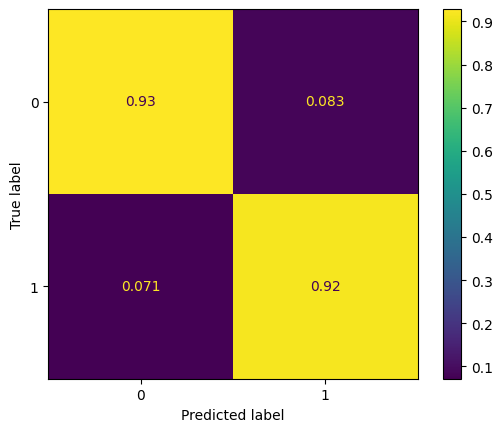

749/749 [==============================] - 2s 2ms/step
0.874
0.126
Cell: ['A160119#001'] - 0
0.865
0.135
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.491
0.509
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.995
0.005
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.082
0.918
Cell: ['A160426#021'] - 1
0.01
0.99
Cell: ['A160426#080'] - 1
0.104
0.896
Cell: ['A160427#022'] - 1
0.353
0.647
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.001
0.999
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.085
0.915
Cell: ['A160427#047'] - 1
0.998
0.002
Cell: ['A160427#049'] - 0
0.015
0.985
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.209
0.791
Cell: ['A160427#075'] - 1
0.145
0.855
Cell: ['A160427#084'] - 1
0.468
0.532
C

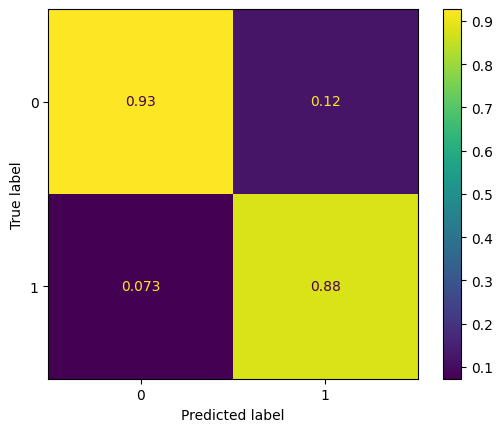

749/749 [==============================] - 3s 4ms/step
0.74
0.26
Cell: ['A160119#001'] - 0
0.848
0.152
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.476
0.524
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.994
0.006
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.992
0.008
Cell: ['A160205#051'] - 0
0.09
0.91
Cell: ['A160426#021'] - 1
0.019
0.981
Cell: ['A160426#080'] - 1
0.121
0.879
Cell: ['A160427#022'] - 1
0.284
0.716
Cell: ['A160427#035'] - 1
0.011
0.99
Cell: ['A160427#037'] - 1
0.005
0.995
Cell: ['A160427#039'] - 1
0.067
0.933
Cell: ['A160427#041'] - 1
0.08
0.92
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.007
0.993
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.201
0.799
Cell: ['A160427#075'] - 1
0.174
0.827
Cell: ['A160427#084'] - 1
0.524
0.477
Cell: ['A1

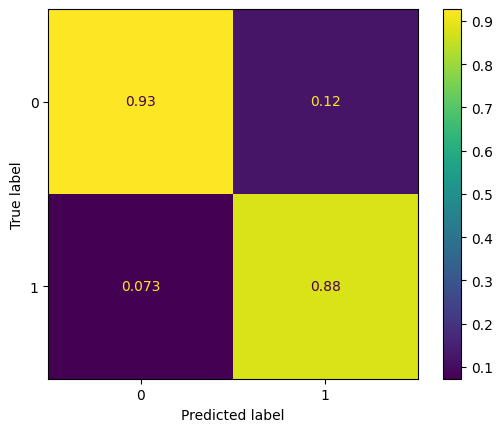

749/749 [==============================] - 3s 3ms/step
0.752
0.248
Cell: ['A160119#001'] - 0
0.835
0.165
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.451
0.549
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.993
0.007
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.991
0.009
Cell: ['A160205#051'] - 0
0.101
0.899
Cell: ['A160426#021'] - 1
0.017
0.983
Cell: ['A160426#080'] - 1
0.109
0.891
Cell: ['A160427#022'] - 1
0.27
0.73
Cell: ['A160427#035'] - 1
0.005
0.995
Cell: ['A160427#037'] - 1
0.004
0.996
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.096
0.904
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.005
0.995
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.215
0.785
Cell: ['A160427#075'] - 1
0.12
0.88
Cell: ['A160427#084'] - 1
0.534
0.466
Cell: [

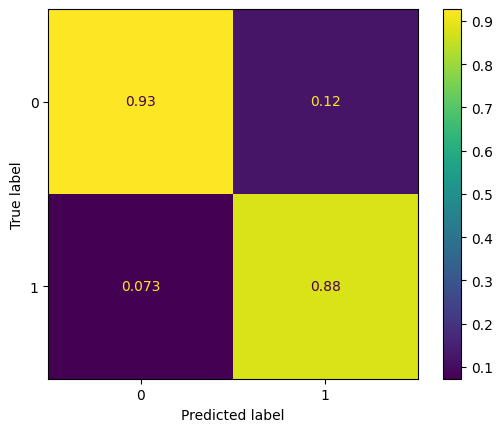

749/749 [==============================] - 3s 4ms/step
0.894
0.106
Cell: ['A160119#001'] - 0
0.865
0.135
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.564
0.436
Cell: ['A160125#087'] - 0
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.126
0.874
Cell: ['A160426#021'] - 1
0.012
0.988
Cell: ['A160426#080'] - 1
0.039
0.961
Cell: ['A160427#022'] - 1
0.272
0.729
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.005
0.995
Cell: ['A160427#039'] - 1
0.007
0.993
Cell: ['A160427#041'] - 1
0.093
0.907
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.025
0.975
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.225
0.775
Cell: ['A160427#075'] - 1
0.07
0.93
Cell: ['A160427#084'] - 1
0.703
0.298
Cell: ['A

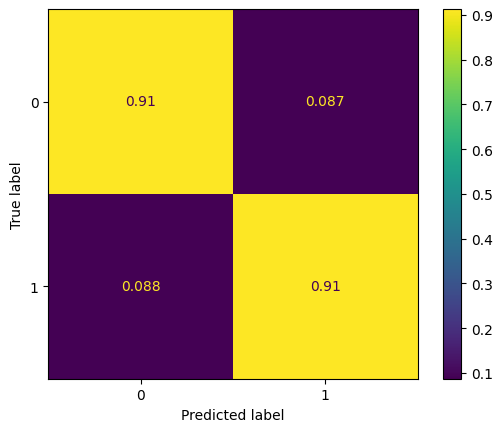

749/749 [==============================] - 2s 3ms/step
0.882
0.118
Cell: ['A160119#001'] - 0
0.88
0.12
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.592
0.408
Cell: ['A160125#087'] - 0
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.126
0.874
Cell: ['A160426#021'] - 1
0.012
0.988
Cell: ['A160426#080'] - 1
0.04
0.959
Cell: ['A160427#022'] - 1
0.334
0.667
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.007
0.993
Cell: ['A160427#039'] - 1
0.007
0.993
Cell: ['A160427#041'] - 1
0.089
0.911
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.178
0.822
Cell: ['A160427#075'] - 1
0.058
0.942
Cell: ['A160427#084'] - 1
0.625
0.375
Cell: 

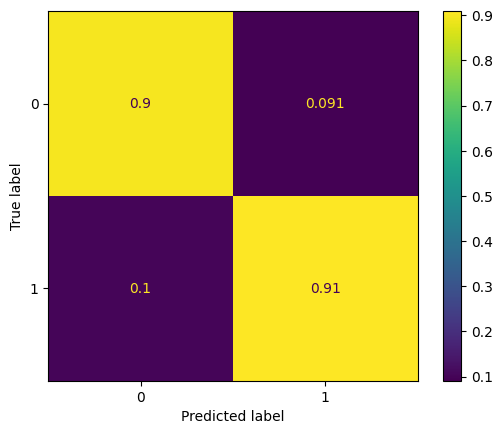

749/749 [==============================] - 3s 4ms/step
0.826
0.174
Cell: ['A160119#001'] - 0
0.847
0.153
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.463
0.537
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.179
0.821
Cell: ['A160426#021'] - 1
0.024
0.976
Cell: ['A160426#080'] - 1
0.164
0.836
Cell: ['A160427#022'] - 1
0.301
0.699
Cell: ['A160427#035'] - 1
0.009
0.991
Cell: ['A160427#037'] - 1
0.029
0.971
Cell: ['A160427#039'] - 1
0.013
0.987
Cell: ['A160427#041'] - 1
0.073
0.927
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.03
0.97
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.267
0.733
Cell: ['A160427#075'] - 1
0.161
0.839
Cell: ['A160427#084'] - 1
0.649
0.351
Cell:

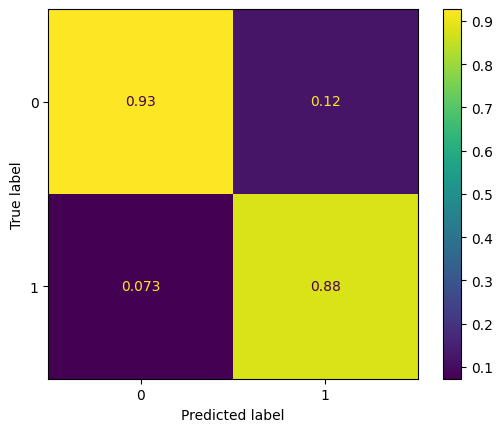

749/749 [==============================] - 2s 2ms/step
0.81
0.19
Cell: ['A160119#001'] - 0
0.868
0.132
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.478
0.522
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.996
0.004
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.184
0.816
Cell: ['A160426#021'] - 1
0.024
0.975
Cell: ['A160426#080'] - 1
0.162
0.838
Cell: ['A160427#022'] - 1
0.292
0.708
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.037
0.963
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.065
0.935
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.033
0.967
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.288
0.712
Cell: ['A160427#075'] - 1
0.149
0.851
Cell: ['A160427#084'] - 1
0.631
0.369
Cell:

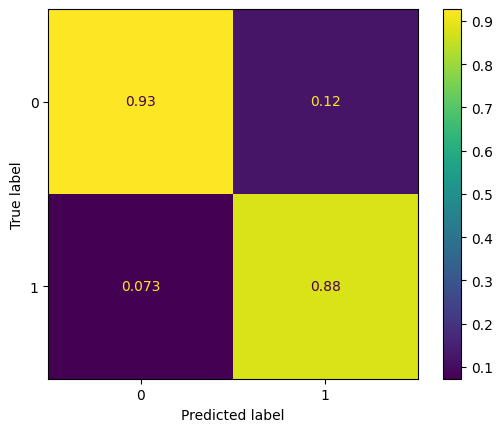

749/749 [==============================] - 4s 5ms/step
0.879
0.121
Cell: ['A160119#001'] - 0
0.829
0.171
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.47
0.53
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
1.0
0.0
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.167
0.833
Cell: ['A160426#021'] - 1
0.018
0.982
Cell: ['A160426#080'] - 1
0.055
0.945
Cell: ['A160427#022'] - 1
0.24
0.76
Cell: ['A160427#035'] - 1
0.007
0.993
Cell: ['A160427#037'] - 1
0.01
0.99
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.078
0.922
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.299
0.701
Cell: ['A160427#075'] - 1
0.047
0.953
Cell: ['A160427#084'] - 1
0.672
0.328
Cell: ['A

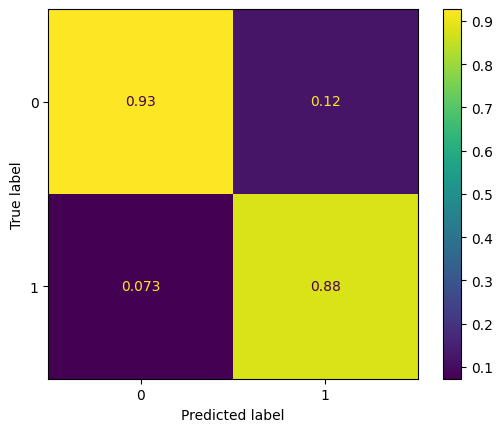

749/749 [==============================] - 2s 3ms/step
0.849
0.151
Cell: ['A160119#001'] - 0
0.779
0.221
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.499
0.501
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.16
0.841
Cell: ['A160426#021'] - 1
0.022
0.978
Cell: ['A160426#080'] - 1
0.056
0.944
Cell: ['A160427#022'] - 1
0.243
0.757
Cell: ['A160427#035'] - 1
0.002
0.997
Cell: ['A160427#037'] - 1
0.004
0.996
Cell: ['A160427#039'] - 1
0.011
0.989
Cell: ['A160427#041'] - 1
0.09
0.911
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.033
0.967
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.307
0.693
Cell: ['A160427#075'] - 1
0.054
0.946
Cell: ['A160427#084'] - 1
0.661
0.339
Cell:

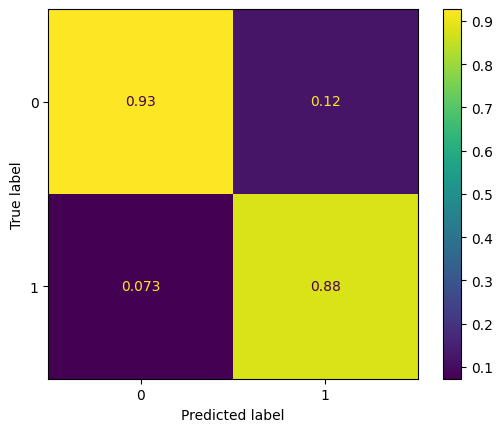

749/749 [==============================] - 3s 4ms/step
0.912
0.088
Cell: ['A160119#001'] - 0
0.818
0.182
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.5
0.5
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.172
0.828
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.05
0.95
Cell: ['A160427#022'] - 1
0.293
0.707
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.036
0.964
Cell: ['A160427#039'] - 1
0.027
0.973
Cell: ['A160427#041'] - 1
0.092
0.908
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.016
0.984
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.287
0.714
Cell: ['A160427#075'] - 1
0.026
0.974
Cell: ['A160427#084'] - 1
0.568
0.432
Cell: ['A

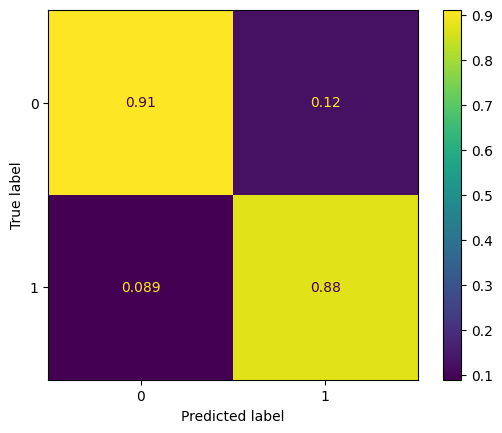

749/749 [==============================] - 3s 4ms/step
0.9
0.1
Cell: ['A160119#001'] - 0
0.799
0.201
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.5
0.5
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.161
0.839
Cell: ['A160426#021'] - 1
0.021
0.979
Cell: ['A160426#080'] - 1
0.073
0.927
Cell: ['A160427#022'] - 1
0.288
0.712
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.055
0.945
Cell: ['A160427#039'] - 1
0.017
0.983
Cell: ['A160427#041'] - 1
0.109
0.891
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.026
0.974
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.28
0.719
Cell: ['A160427#075'] - 1
0.045
0.955
Cell: ['A160427#084'] - 1
0.493
0.506
Cell: ['A160

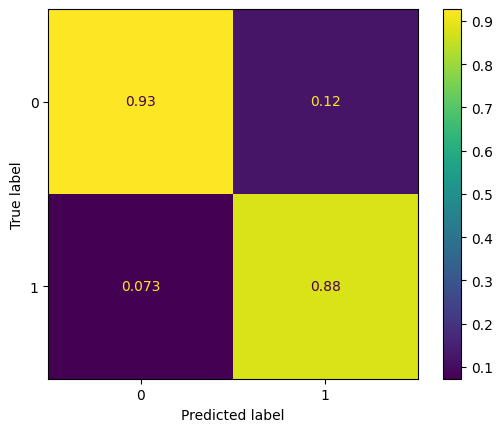

749/749 [==============================] - 3s 3ms/step
0.898
0.102
Cell: ['A160119#001'] - 0
0.813
0.187
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.412
0.588
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.083
0.917
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.044
0.956
Cell: ['A160427#022'] - 1
0.345
0.655
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.012
0.988
Cell: ['A160427#039'] - 1
0.023
0.977
Cell: ['A160427#041'] - 1
0.079
0.921
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.036
0.964
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.268
0.732
Cell: ['A160427#075'] - 1
0.041
0.959
Cell: ['A160427#084'] - 1
0.552
0.448
Cell: ['A16

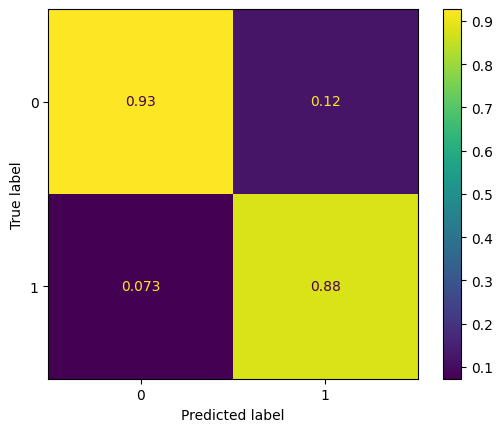

749/749 [==============================] - 2s 2ms/step
0.875
0.125
Cell: ['A160119#001'] - 0
0.745
0.255
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.373
0.627
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.062
0.938
Cell: ['A160426#021'] - 1
0.012
0.988
Cell: ['A160426#080'] - 1
0.043
0.957
Cell: ['A160427#022'] - 1
0.33
0.67
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.007
0.993
Cell: ['A160427#039'] - 1
0.032
0.968
Cell: ['A160427#041'] - 1
0.06
0.94
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.027
0.973
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.233
0.768
Cell: ['A160427#075'] - 1
0.036
0.964
Cell: ['A160427#084'] - 1
0.448
0.552
Cell: ['A160427

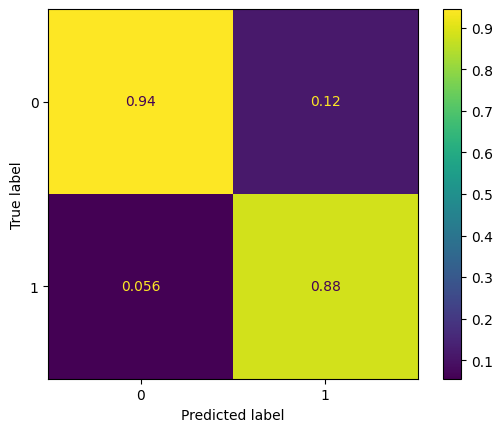

749/749 [==============================] - 3s 4ms/step
0.855
0.145
Cell: ['A160119#001'] - 0
0.851
0.149
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.315
0.685
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
1.0
0.0
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.101
0.899
Cell: ['A160426#021'] - 1
0.012
0.988
Cell: ['A160426#080'] - 1
0.027
0.973
Cell: ['A160427#022'] - 1
0.315
0.685
Cell: ['A160427#035'] - 1
0.005
0.995
Cell: ['A160427#037'] - 1
0.064
0.936
Cell: ['A160427#039'] - 1
0.011
0.989
Cell: ['A160427#041'] - 1
0.089
0.911
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.01
0.99
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.243
0.756
Cell: ['A160427#075'] - 1
0.008
0.992
Cell: ['A160427#084'] - 1
0.645
0.355
Cell: ['A

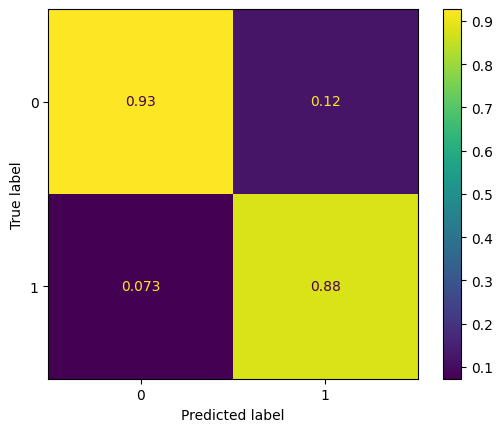

749/749 [==============================] - 2s 3ms/step
0.817
0.182
Cell: ['A160119#001'] - 0
0.848
0.152
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.336
0.664
Cell: ['A160125#087'] - 1
1.0
0.0
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
1.0
0.0
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.095
0.904
Cell: ['A160426#021'] - 1
0.011
0.989
Cell: ['A160426#080'] - 1
0.027
0.973
Cell: ['A160427#022'] - 1
0.294
0.706
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.067
0.933
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.104
0.896
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.01
0.99
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.202
0.798
Cell: ['A160427#075'] - 1
0.011
0.989
Cell: ['A160427#084'] - 1
0.543
0.457
Cell: ['A1604

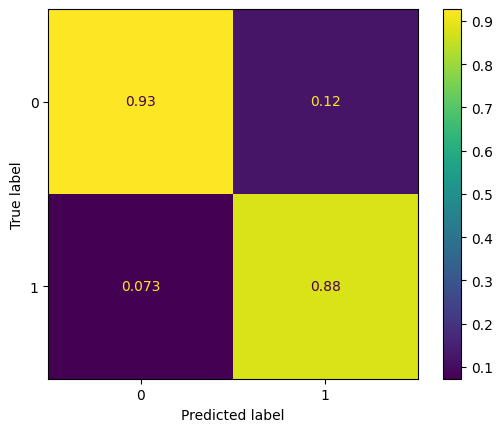

749/749 [==============================] - 3s 4ms/step
0.806
0.194
Cell: ['A160119#001'] - 0
0.874
0.126
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.425
0.575
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.109
0.891
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.061
0.939
Cell: ['A160427#022'] - 1
0.311
0.689
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.011
0.989
Cell: ['A160427#039'] - 1
0.109
0.891
Cell: ['A160427#041'] - 1
0.068
0.931
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.028
0.972
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.276
0.724
Cell: ['A160427#075'] - 1
0.124
0.876
Cell: ['A160427#084'] - 1
0.62
0.38
Cell: ['A1604

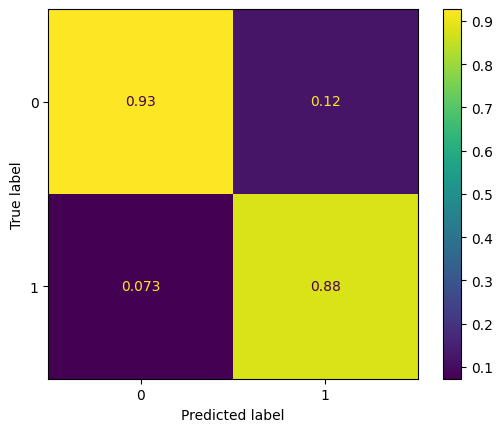

749/749 [==============================] - 4s 6ms/step
0.764
0.237
Cell: ['A160119#001'] - 0
0.881
0.119
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.411
0.589
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.093
0.907
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.05
0.95
Cell: ['A160427#022'] - 1
0.325
0.675
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.012
0.988
Cell: ['A160427#039'] - 1
0.088
0.912
Cell: ['A160427#041'] - 1
0.062
0.938
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.233
0.767
Cell: ['A160427#075'] - 1
0.126
0.874
Cell: ['A160427#084'] - 1
0.581
0.419
Cell: ['A

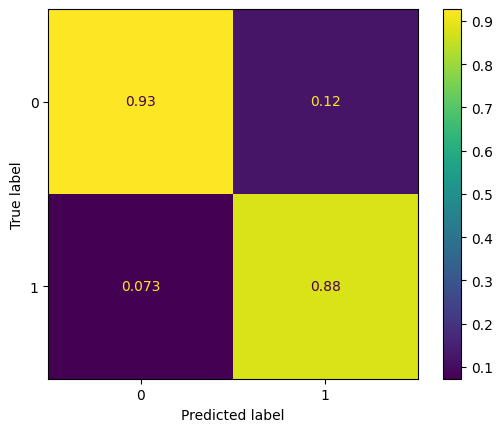

749/749 [==============================] - 5s 6ms/step
0.75
0.25
Cell: ['A160119#001'] - 0
0.891
0.109
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.48
0.52
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.169
0.831
Cell: ['A160426#021'] - 1
0.038
0.962
Cell: ['A160426#080'] - 1
0.134
0.866
Cell: ['A160427#022'] - 1
0.502
0.498
Cell: ['A160427#035'] - 0
0.013
0.987
Cell: ['A160427#037'] - 1
0.037
0.963
Cell: ['A160427#039'] - 1
0.032
0.968
Cell: ['A160427#041'] - 1
0.145
0.855
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.012
0.988
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.181
0.819
Cell: ['A160427#075'] - 1
0.221
0.779
Cell: ['A160427#084'] - 1
0.487
0.512
Cell: [

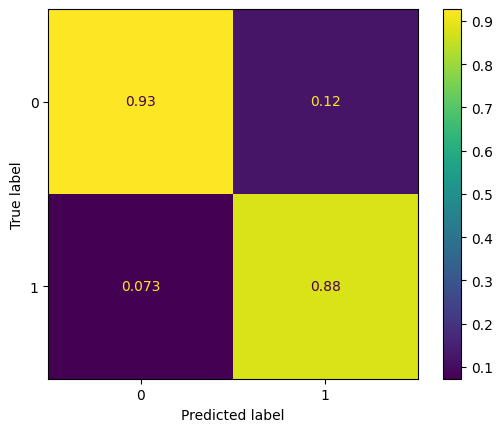

749/749 [==============================] - 3s 4ms/step
0.723
0.277
Cell: ['A160119#001'] - 0
0.876
0.124
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.417
0.583
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
1.0
0.0
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.126
0.874
Cell: ['A160426#021'] - 1
0.024
0.976
Cell: ['A160426#080'] - 1
0.112
0.888
Cell: ['A160427#022'] - 1
0.508
0.492
Cell: ['A160427#035'] - 0
0.016
0.984
Cell: ['A160427#037'] - 1
0.051
0.949
Cell: ['A160427#039'] - 1
0.047
0.953
Cell: ['A160427#041'] - 1
0.128
0.872
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.007
0.993
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.172
0.828
Cell: ['A160427#075'] - 1
0.179
0.821
Cell: ['A160427#084'] - 1
0.45
0.549
Cell: ['

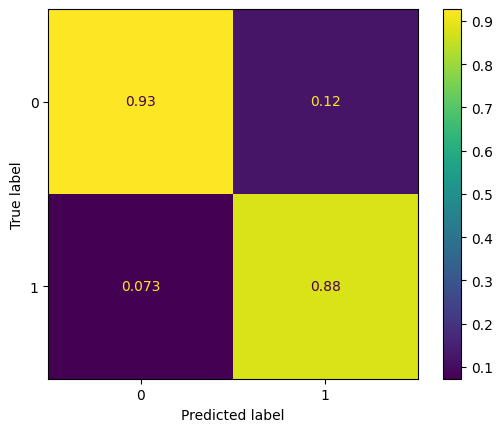

749/749 [==============================] - 4s 5ms/step
0.8
0.2
Cell: ['A160119#001'] - 0
0.855
0.145
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.491
0.509
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.043
0.957
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.075
0.925
Cell: ['A160427#022'] - 1
0.344
0.656
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.037
0.963
Cell: ['A160427#039'] - 1
0.02
0.98
Cell: ['A160427#041'] - 1
0.125
0.875
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.006
0.994
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.25
0.75
Cell: ['A160427#075'] - 1
0.03
0.97
Cell: ['A160427#084'] - 1
0.545
0.454
Cell: ['A1604

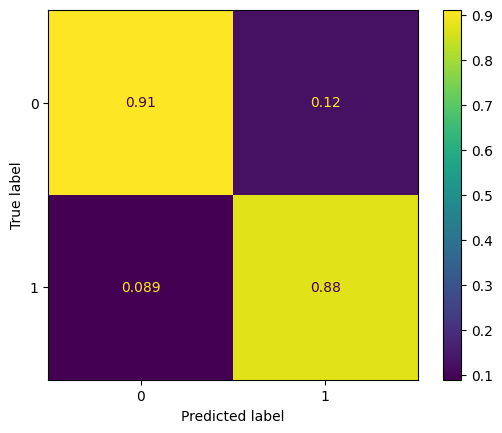

749/749 [==============================] - 2s 2ms/step
0.773
0.227
Cell: ['A160119#001'] - 0
0.84
0.16
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.474
0.526
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.042
0.958
Cell: ['A160426#021'] - 1
0.017
0.983
Cell: ['A160426#080'] - 1
0.06
0.94
Cell: ['A160427#022'] - 1
0.349
0.651
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.052
0.948
Cell: ['A160427#039'] - 1
0.006
0.994
Cell: ['A160427#041'] - 1
0.1
0.9
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.225
0.775
Cell: ['A160427#075'] - 1
0.02
0.98
Cell: ['A160427#084'] - 1
0.493
0.507
Cell: ['A160427#0

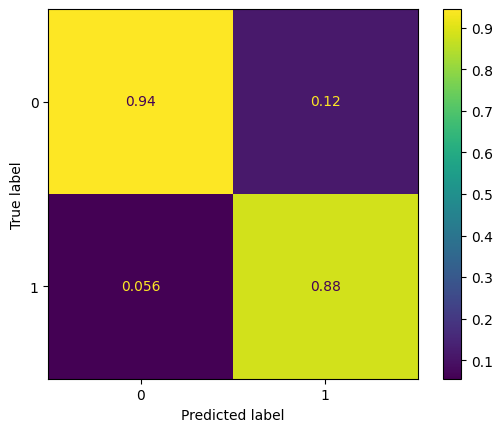

749/749 [==============================] - 2s 3ms/step
0.733
0.267
Cell: ['A160119#001'] - 0
0.813
0.187
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.37
0.63
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.068
0.932
Cell: ['A160426#021'] - 1
0.024
0.976
Cell: ['A160426#080'] - 1
0.099
0.901
Cell: ['A160427#022'] - 1
0.337
0.663
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.037
0.963
Cell: ['A160427#039'] - 1
0.021
0.979
Cell: ['A160427#041'] - 1
0.093
0.907
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.007
0.993
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.317
0.683
Cell: ['A160427#075'] - 1
0.154
0.846
Cell: ['A160427#084'] - 1
0.597
0.403
Cell:

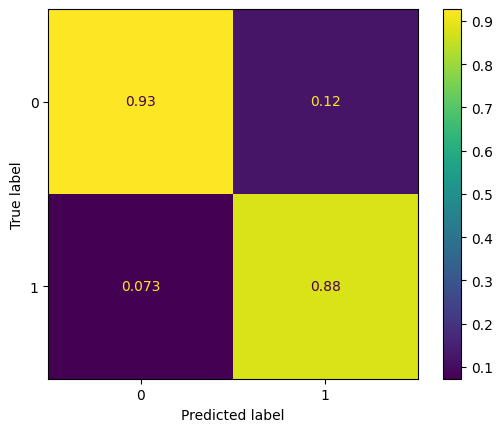

749/749 [==============================] - 2s 3ms/step
0.68
0.32
Cell: ['A160119#001'] - 0
0.797
0.203
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.319
0.681
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.059
0.941
Cell: ['A160426#021'] - 1
0.031
0.969
Cell: ['A160426#080'] - 1
0.103
0.897
Cell: ['A160427#022'] - 1
0.316
0.684
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.016
0.984
Cell: ['A160427#039'] - 1
0.02
0.98
Cell: ['A160427#041'] - 1
0.071
0.929
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.016
0.984
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.295
0.705
Cell: ['A160427#075'] - 1
0.204
0.796
Cell: ['A160427#084'] - 1
0.581
0.419
Cell: [

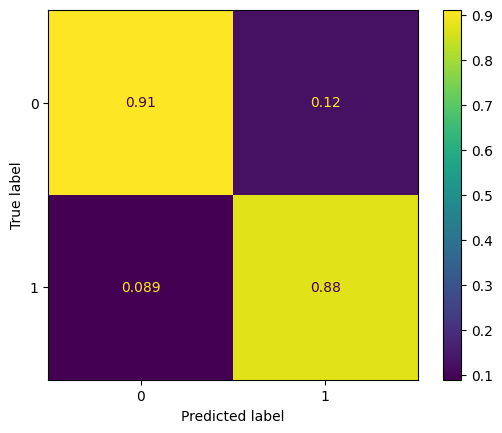

749/749 [==============================] - 2s 3ms/step
0.817
0.183
Cell: ['A160119#001'] - 0
0.829
0.171
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.4
0.6
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.078
0.922
Cell: ['A160426#021'] - 1
0.024
0.976
Cell: ['A160426#080'] - 1
0.081
0.919
Cell: ['A160427#022'] - 1
0.359
0.641
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.031
0.969
Cell: ['A160427#039'] - 1
0.04
0.96
Cell: ['A160427#041'] - 1
0.074
0.926
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.02
0.98
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.313
0.687
Cell: ['A160427#075'] - 1
0.121
0.879
Cell: ['A160427#084'] - 1
0.705
0.295
Cell: ['A160427#094

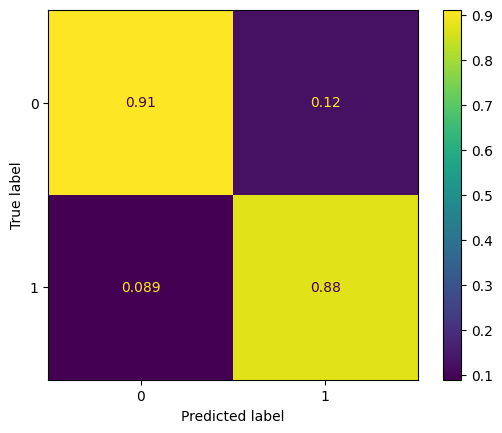

749/749 [==============================] - 2s 3ms/step
0.798
0.202
Cell: ['A160119#001'] - 0
0.82
0.18
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.366
0.634
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.079
0.921
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.081
0.919
Cell: ['A160427#022'] - 1
0.377
0.623
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.03
0.97
Cell: ['A160427#039'] - 1
0.052
0.948
Cell: ['A160427#041'] - 1
0.07
0.93
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.026
0.974
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.325
0.675
Cell: ['A160427#075'] - 1
0.121
0.879
Cell: ['A160427#084'] - 1
0.685
0.315
Cell: ['A160427#0

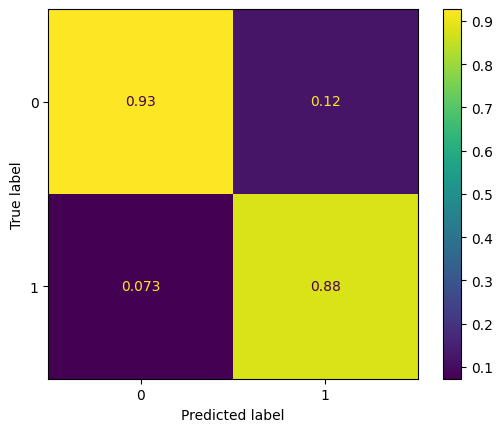

749/749 [==============================] - 2s 2ms/step
0.907
0.093
Cell: ['A160119#001'] - 0
0.896
0.104
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.329
0.671
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.089
0.911
Cell: ['A160426#021'] - 1
0.032
0.968
Cell: ['A160426#080'] - 1
0.093
0.907
Cell: ['A160427#022'] - 1
0.388
0.612
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.007
0.993
Cell: ['A160427#039'] - 1
0.022
0.978
Cell: ['A160427#041'] - 1
0.054
0.946
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.006
0.994
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.401
0.599
Cell: ['A160427#075'] - 1
0.166
0.834
Cell: ['A160427#084'] - 1
0.773
0.227
Cell: ['A16

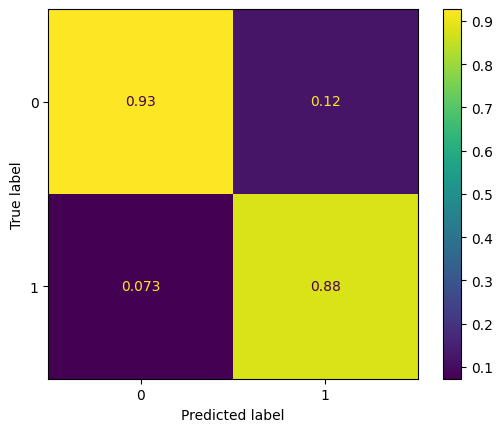

749/749 [==============================] - 2s 3ms/step
0.902
0.098
Cell: ['A160119#001'] - 0
0.901
0.099
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.329
0.67
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.078
0.922
Cell: ['A160426#021'] - 1
0.033
0.967
Cell: ['A160426#080'] - 1
0.121
0.879
Cell: ['A160427#022'] - 1
0.458
0.542
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.009
0.991
Cell: ['A160427#039'] - 1
0.029
0.971
Cell: ['A160427#041'] - 1
0.056
0.944
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.008
0.992
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.359
0.641
Cell: ['A160427#075'] - 1
0.222
0.778
Cell: ['A160427#084'] - 1
0.698
0.302
Cell: ['A160

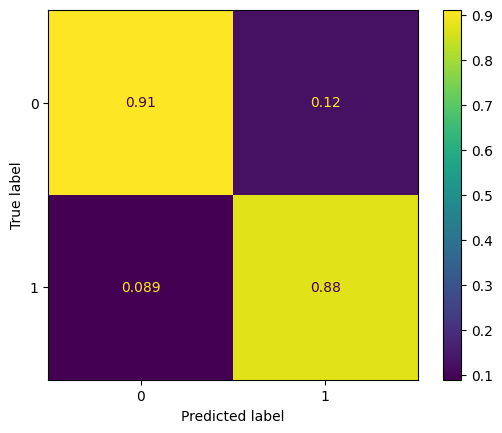

749/749 [==============================] - 2s 2ms/step
0.832
0.168
Cell: ['A160119#001'] - 0
0.852
0.148
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.332
0.668
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.136
0.864
Cell: ['A160426#021'] - 1
0.03
0.97
Cell: ['A160426#080'] - 1
0.132
0.868
Cell: ['A160427#022'] - 1
0.422
0.578
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.019
0.981
Cell: ['A160427#039'] - 1
0.031
0.969
Cell: ['A160427#041'] - 1
0.081
0.919
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.021
0.979
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.396
0.604
Cell: ['A160427#075'] - 1
0.246
0.753
Cell: ['A160427#084'] - 1
0.741
0.259
Cell: ['A1604

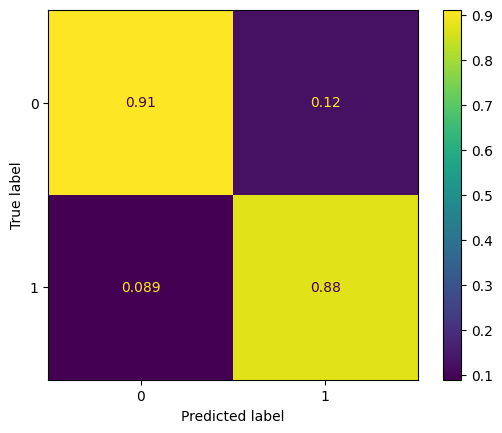

749/749 [==============================] - 2s 2ms/step
0.811
0.189
Cell: ['A160119#001'] - 0
0.837
0.163
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.37
0.63
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.135
0.865
Cell: ['A160426#021'] - 1
0.035
0.965
Cell: ['A160426#080'] - 1
0.152
0.848
Cell: ['A160427#022'] - 1
0.397
0.603
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.013
0.987
Cell: ['A160427#039'] - 1
0.021
0.979
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.023
0.978
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.422
0.578
Cell: ['A160427#075'] - 1
0.316
0.685
Cell: ['A160427#084'] - 1
0.792
0.208
Cell:

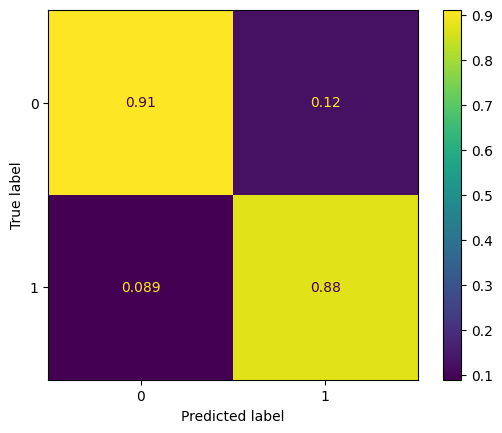

749/749 [==============================] - 2s 3ms/step
0.79
0.21
Cell: ['A160119#001'] - 0
0.9
0.1
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.354
0.646
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.087
0.913
Cell: ['A160426#021'] - 1
0.027
0.973
Cell: ['A160426#080'] - 1
0.098
0.902
Cell: ['A160427#022'] - 1
0.456
0.544
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.003
0.997
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.054
0.946
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.041
0.959
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.202
0.798
Cell: ['A160427#075'] - 1
0.242
0.758
Cell: ['A160427#084'] - 1
0.675
0.325
Cell: ['A160427#0

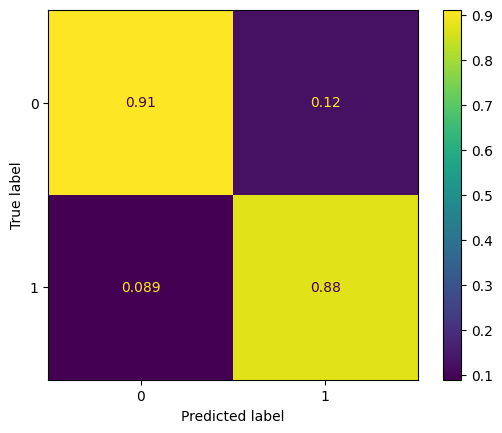

749/749 [==============================] - 2s 3ms/step
0.764
0.236
Cell: ['A160119#001'] - 0
0.882
0.118
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.312
0.688
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.095
0.906
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.105
0.895
Cell: ['A160427#022'] - 1
0.46
0.54
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.006
0.994
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.054
0.946
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.036
0.964
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.168
0.832
Cell: ['A160427#075'] - 1
0.313
0.687
Cell: ['A160427#084'] - 1
0.628
0.372
Cell: ['A1604

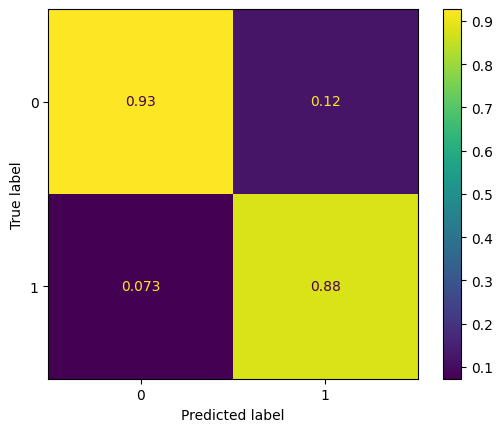

749/749 [==============================] - 2s 2ms/step
0.641
0.359
Cell: ['A160119#001'] - 0
0.775
0.225
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.389
0.611
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.111
0.889
Cell: ['A160426#021'] - 1
0.023
0.977
Cell: ['A160426#080'] - 1
0.052
0.948
Cell: ['A160427#022'] - 1
0.413
0.587
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.008
0.992
Cell: ['A160427#039'] - 1
0.004
0.996
Cell: ['A160427#041'] - 1
0.072
0.928
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.031
0.969
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.272
0.728
Cell: ['A160427#075'] - 1
0.062
0.938
Cell: ['A160427#084'] - 1
0.659
0.341
Cell: ['A160427

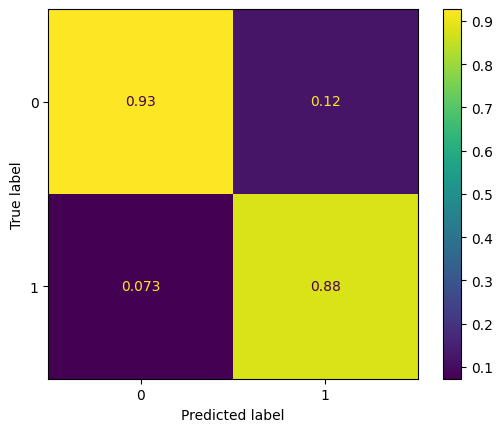

749/749 [==============================] - 2s 2ms/step
0.632
0.368
Cell: ['A160119#001'] - 0
0.781
0.219
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.407
0.593
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.116
0.884
Cell: ['A160426#021'] - 1
0.023
0.977
Cell: ['A160426#080'] - 1
0.052
0.948
Cell: ['A160427#022'] - 1
0.439
0.561
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.007
0.993
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.066
0.934
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.016
0.984
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.27
0.729
Cell: ['A160427#075'] - 1
0.059
0.941
Cell: ['A160427#084'] - 1
0.626
0.374
Cell: ['A160427#

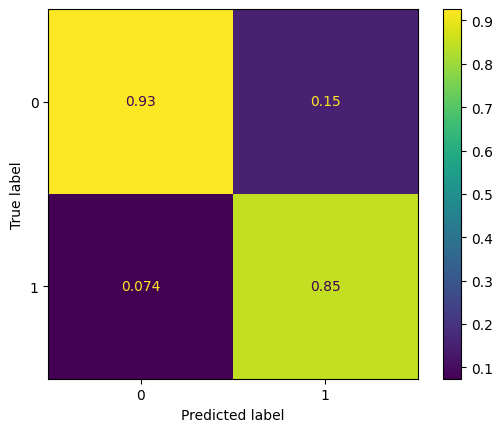

749/749 [==============================] - 2s 3ms/step
0.731
0.269
Cell: ['A160119#001'] - 0
0.787
0.213
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.359
0.641
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.113
0.887
Cell: ['A160426#021'] - 1
0.015
0.985
Cell: ['A160426#080'] - 1
0.091
0.909
Cell: ['A160427#022'] - 1
0.412
0.588
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.021
0.979
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.112
0.888
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.038
0.961
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.292
0.708
Cell: ['A160427#075'] - 1
0.105
0.895
Cell: ['A160427#084'] - 1
0.694
0.306
Cel

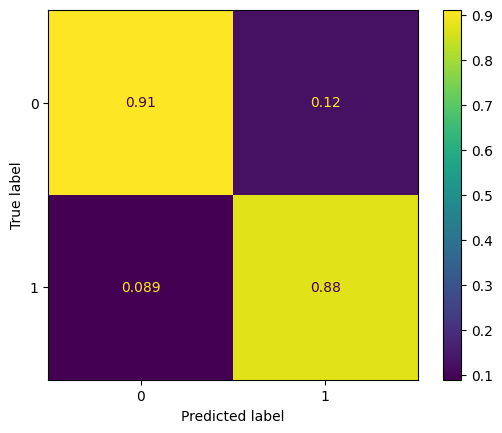

749/749 [==============================] - 2s 3ms/step
0.687
0.313
Cell: ['A160119#001'] - 0
0.816
0.184
Cell: ['A160125#009'] - 0
1.0
0.0
Cell: ['A160125#049'] - 0
0.36
0.639
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.119
0.881
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.101
0.899
Cell: ['A160427#022'] - 1
0.405
0.595
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.034
0.966
Cell: ['A160427#039'] - 1
0.01
0.99
Cell: ['A160427#041'] - 1
0.127
0.873
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.044
0.956
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.269
0.731
Cell: ['A160427#075'] - 1
0.162
0.838
Cell: ['A160427#084'] - 1
0.665
0.335
Cell: ['A1

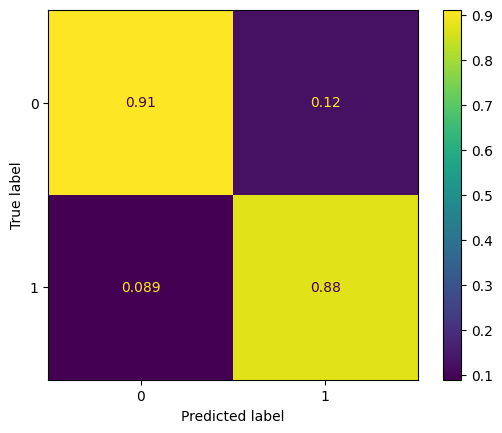

749/749 [==============================] - 2s 3ms/step
0.795
0.205
Cell: ['A160119#001'] - 0
0.825
0.175
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.326
0.674
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.06
0.94
Cell: ['A160426#021'] - 1
0.009
0.991
Cell: ['A160426#080'] - 1
0.053
0.947
Cell: ['A160427#022'] - 1
0.33
0.67
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.042
0.959
Cell: ['A160427#039'] - 1
0.003
0.997
Cell: ['A160427#041'] - 1
0.071
0.929
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.022
0.978
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.22
0.78
Cell: ['A160427#075'] - 1
0.067
0.933
Cell: ['A160427#084'] - 1
0.649
0.351
Cell: ['A1604

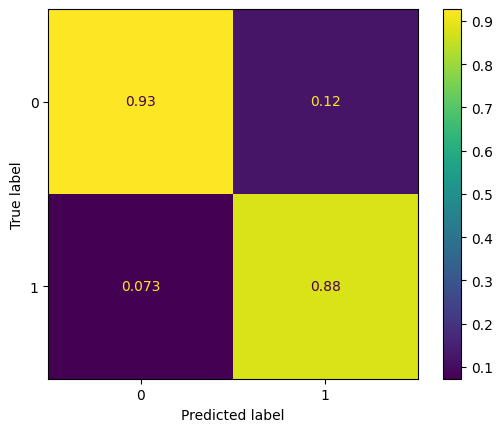

749/749 [==============================] - 2s 3ms/step
0.825
0.175
Cell: ['A160119#001'] - 0
0.845
0.155
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.332
0.668
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.003
Cell: ['A160205#051'] - 0
0.063
0.937
Cell: ['A160426#021'] - 1
0.01
0.99
Cell: ['A160426#080'] - 1
0.047
0.953
Cell: ['A160427#022'] - 1
0.346
0.654
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.034
0.966
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.06
0.94
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.022
0.977
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.249
0.751
Cell: ['A160427#075'] - 1
0.07
0.93
Cell: ['A160427#084'] - 1
0.657
0.343
Cell: ['A1604

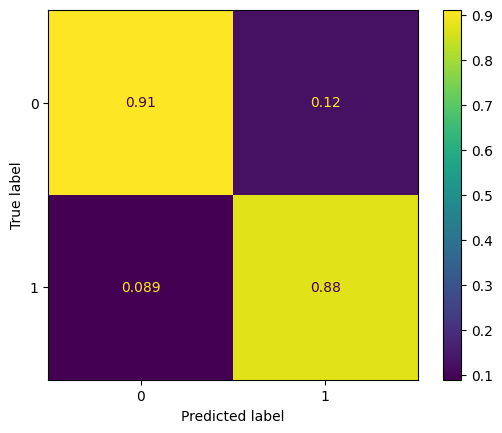

749/749 [==============================] - 2s 2ms/step
0.781
0.219
Cell: ['A160119#001'] - 0
0.899
0.101
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.367
0.633
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.066
0.934
Cell: ['A160426#021'] - 1
0.01
0.99
Cell: ['A160426#080'] - 1
0.067
0.933
Cell: ['A160427#022'] - 1
0.307
0.693
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.008
0.992
Cell: ['A160427#039'] - 1
0.001
0.999
Cell: ['A160427#041'] - 1
0.06
0.94
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.007
0.993
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.186
0.814
Cell: ['A160427#075'] - 1
0.04
0.96
Cell: ['A160427#084'] - 1
0.528
0.472
Cell: ['A1604

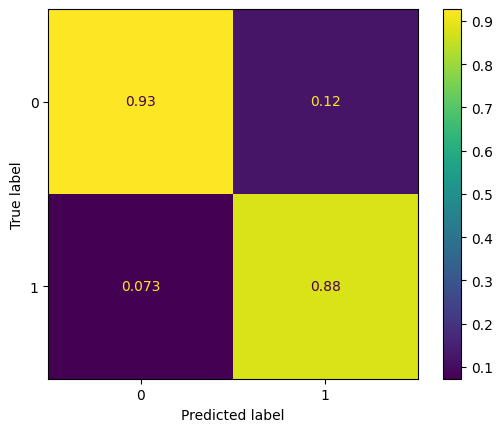

749/749 [==============================] - 2s 3ms/step
0.779
0.221
Cell: ['A160119#001'] - 0
0.89
0.109
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.372
0.628
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.056
0.944
Cell: ['A160426#021'] - 1
0.013
0.987
Cell: ['A160426#080'] - 1
0.08
0.92
Cell: ['A160427#022'] - 1
0.303
0.697
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.006
0.994
Cell: ['A160427#039'] - 1
0.001
0.999
Cell: ['A160427#041'] - 1
0.057
0.943
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.018
0.983
Cell: ['A160427#055'] - 1
0.006
0.994
Cell: ['A160427#073'] - 1
0.186
0.814
Cell: ['A160427#075'] - 1
0.055
0.945
Cell: ['A160427#084'] - 1
0.522
0.478
Cell: ['A1

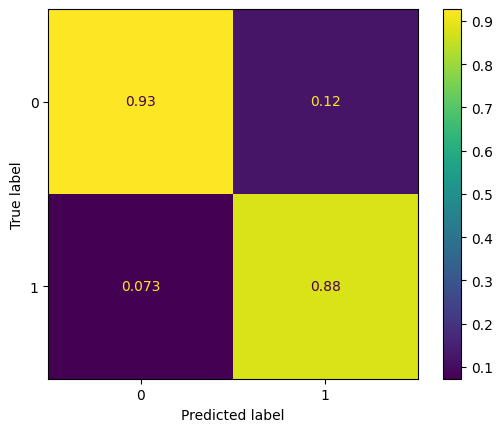

749/749 [==============================] - 2s 3ms/step
0.868
0.132
Cell: ['A160119#001'] - 0
0.922
0.078
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.368
0.632
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.073
0.927
Cell: ['A160426#021'] - 1
0.01
0.99
Cell: ['A160426#080'] - 1
0.042
0.958
Cell: ['A160427#022'] - 1
0.426
0.574
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.014
0.986
Cell: ['A160427#039'] - 1
0.005
0.995
Cell: ['A160427#041'] - 1
0.126
0.873
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.045
0.955
Cell: ['A160427#055'] - 1
0.011
0.989
Cell: ['A160427#073'] - 1
0.175
0.825
Cell: ['A160427#075'] - 1
0.11
0.89
Cell: ['A160427#084'] - 1
0.457
0.543
Cell: ['A16

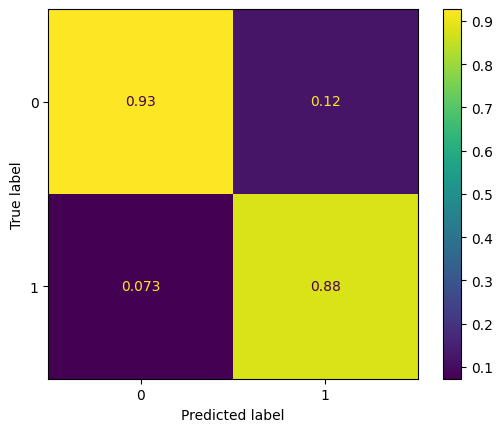

749/749 [==============================] - 2s 2ms/step
0.872
0.128
Cell: ['A160119#001'] - 0
0.94
0.06
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.398
0.602
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.081
0.919
Cell: ['A160426#021'] - 1
0.011
0.989
Cell: ['A160426#080'] - 1
0.045
0.955
Cell: ['A160427#022'] - 1
0.447
0.553
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.024
0.976
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.146
0.854
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.031
0.969
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.164
0.836
Cell: ['A160427#075'] - 1
0.11
0.89
Cell: ['A160427#084'] - 1
0.477
0.523
Cell: [

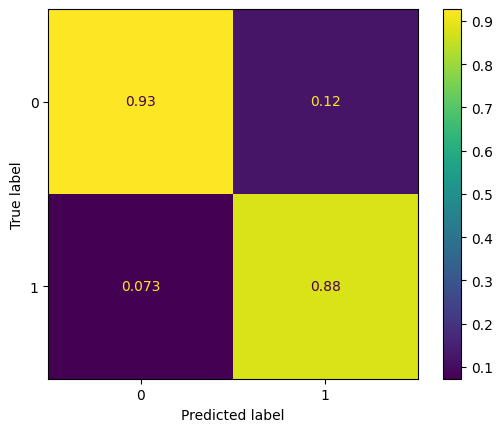

749/749 [==============================] - 2s 3ms/step
0.834
0.166
Cell: ['A160119#001'] - 0
0.82
0.18
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.325
0.675
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.123
0.877
Cell: ['A160426#021'] - 1
0.015
0.985
Cell: ['A160426#080'] - 1
0.048
0.953
Cell: ['A160427#022'] - 1
0.382
0.618
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.038
0.962
Cell: ['A160427#039'] - 1
0.004
0.996
Cell: ['A160427#041'] - 1
0.084
0.915
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.035
0.965
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.332
0.668
Cell: ['A160427#075'] - 1
0.065
0.935
Cell: ['A160427#084'] - 1
0.716
0.284
Cell: ['A

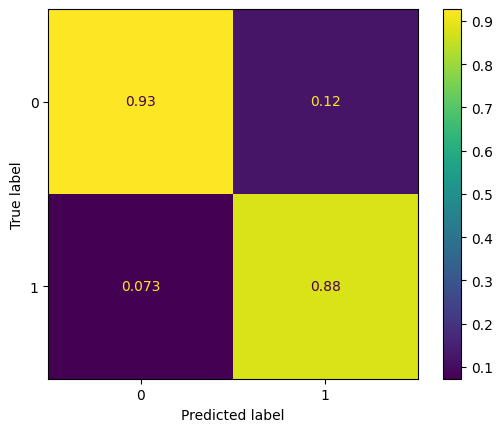

749/749 [==============================] - 2s 2ms/step
0.832
0.168
Cell: ['A160119#001'] - 0
0.812
0.188
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.343
0.657
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.142
0.858
Cell: ['A160426#021'] - 1
0.016
0.985
Cell: ['A160426#080'] - 1
0.059
0.941
Cell: ['A160427#022'] - 1
0.398
0.602
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.041
0.96
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.039
0.961
Cell: ['A160427#055'] - 1
0.006
0.994
Cell: ['A160427#073'] - 1
0.337
0.663
Cell: ['A160427#075'] - 1
0.099
0.901
Cell: ['A160427#084'] - 1
0.725
0.275
Cell

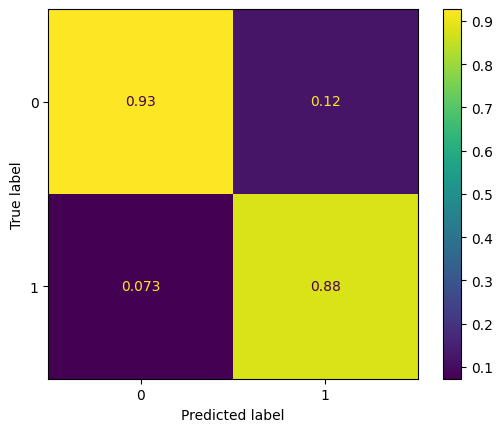

749/749 [==============================] - 2s 2ms/step
0.787
0.213
Cell: ['A160119#001'] - 0
0.799
0.201
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.52
0.48
Cell: ['A160125#087'] - 0
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.122
0.878
Cell: ['A160426#021'] - 1
0.015
0.985
Cell: ['A160426#080'] - 1
0.052
0.948
Cell: ['A160427#022'] - 1
0.399
0.601
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.019
0.981
Cell: ['A160427#039'] - 1
0.0
1.0
Cell: ['A160427#041'] - 1
0.076
0.924
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.02
0.98
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.295
0.705
Cell: ['A160427#075'] - 1
0.031
0.969
Cell: ['A160427#084'] - 1
0.66
0.34
Cell: ['A160427#094']

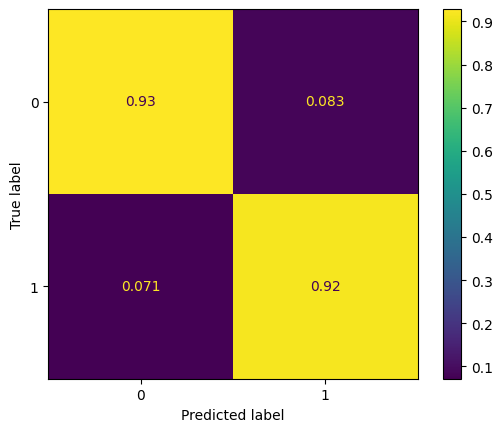

749/749 [==============================] - 2s 3ms/step
0.792
0.208
Cell: ['A160119#001'] - 0
0.787
0.213
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.54
0.46
Cell: ['A160125#087'] - 0
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.119
0.881
Cell: ['A160426#021'] - 1
0.019
0.981
Cell: ['A160426#080'] - 1
0.065
0.935
Cell: ['A160427#022'] - 1
0.371
0.629
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.018
0.982
Cell: ['A160427#039'] - 1
0.0
1.0
Cell: ['A160427#041'] - 1
0.06
0.94
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.29
0.71
Cell: ['A160427#075'] - 1
0.047
0.953
Cell: ['A160427#084'] - 1
0.596
0.404
Cell: ['A160427#094'] - 0

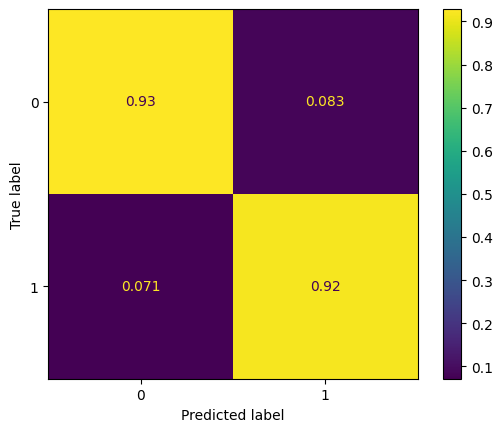

749/749 [==============================] - 2s 2ms/step
0.751
0.249
Cell: ['A160119#001'] - 0
0.852
0.148
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.379
0.621
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.989
0.011
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.057
0.943
Cell: ['A160426#021'] - 1
0.02
0.98
Cell: ['A160426#080'] - 1
0.059
0.941
Cell: ['A160427#022'] - 1
0.384
0.616
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.145
0.855
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.056
0.944
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.274
0.726
Cell: ['A160427#075'] - 1
0.063
0.937
Cell: ['A160427#084'] - 1
0.607
0.393
Cell: ['A

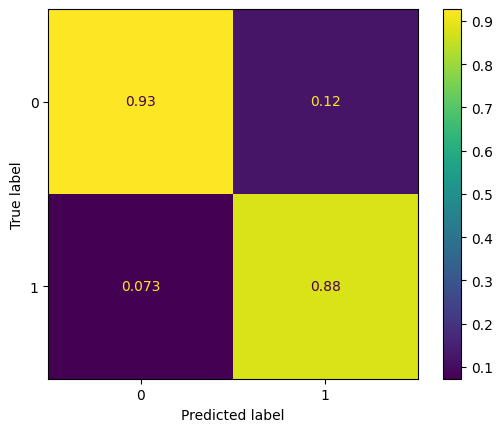

749/749 [==============================] - 2s 2ms/step
0.758
0.242
Cell: ['A160119#001'] - 0
0.841
0.159
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.399
0.601
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.06
0.941
Cell: ['A160426#021'] - 1
0.019
0.981
Cell: ['A160426#080'] - 1
0.06
0.94
Cell: ['A160427#022'] - 1
0.332
0.668
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.115
0.885
Cell: ['A160427#039'] - 1
0.001
0.999
Cell: ['A160427#041'] - 1
0.063
0.937
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.008
0.992
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.276
0.724
Cell: ['A160427#075'] - 1
0.079
0.921
Cell: ['A160427#084'] - 1
0.598
0.402
Cell: ['A160427#09

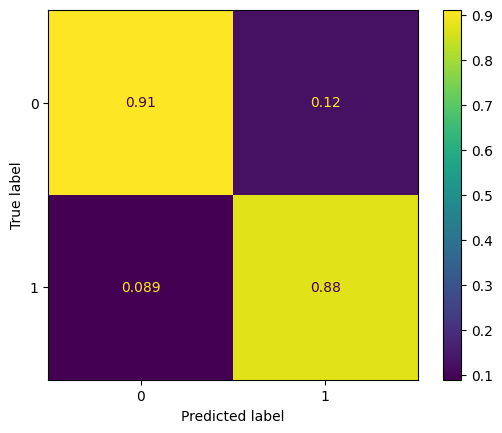

749/749 [==============================] - 2s 3ms/step
0.763
0.237
Cell: ['A160119#001'] - 0
0.786
0.214
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.334
0.666
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.996
0.004
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.991
0.009
Cell: ['A160205#051'] - 0
0.142
0.858
Cell: ['A160426#021'] - 1
0.012
0.988
Cell: ['A160426#080'] - 1
0.055
0.945
Cell: ['A160427#022'] - 1
0.378
0.622
Cell: ['A160427#035'] - 1
0.01
0.99
Cell: ['A160427#037'] - 1
0.088
0.912
Cell: ['A160427#039'] - 1
0.024
0.976
Cell: ['A160427#041'] - 1
0.09
0.91
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.012
0.988
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.178
0.822
Cell: ['A160427#075'] - 1
0.146
0.854
Cell: ['A160427#084'] - 1
0.467
0.533
Cell: [

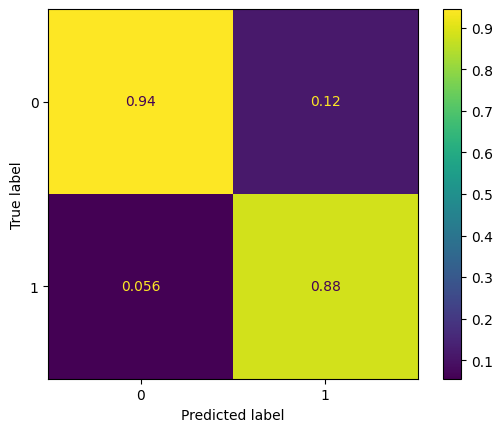

749/749 [==============================] - 2s 3ms/step
0.767
0.233
Cell: ['A160119#001'] - 0
0.798
0.202
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.365
0.635
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.994
0.006
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.99
0.01
Cell: ['A160205#051'] - 0
0.134
0.866
Cell: ['A160426#021'] - 1
0.014
0.986
Cell: ['A160426#080'] - 1
0.069
0.931
Cell: ['A160427#022'] - 1
0.383
0.617
Cell: ['A160427#035'] - 1
0.007
0.993
Cell: ['A160427#037'] - 1
0.095
0.905
Cell: ['A160427#039'] - 1
0.021
0.979
Cell: ['A160427#041'] - 1
0.087
0.913
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.165
0.835
Cell: ['A160427#075'] - 1
0.164
0.835
Cell: ['A160427#084'] - 1
0.506
0.494
Cell:

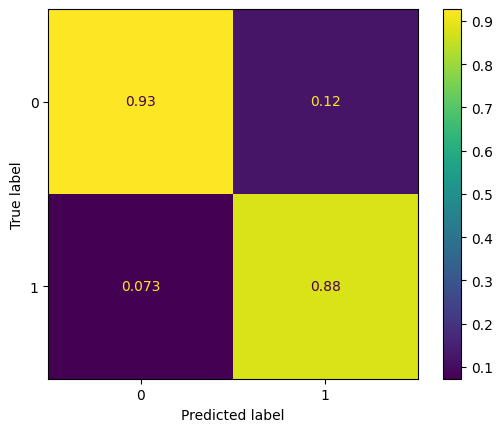

749/749 [==============================] - 2s 2ms/step
0.824
0.176
Cell: ['A160119#001'] - 0
0.846
0.154
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.399
0.601
Cell: ['A160125#087'] - 1
0.985
0.015
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.091
0.909
Cell: ['A160426#021'] - 1
0.057
0.942
Cell: ['A160426#080'] - 1
0.117
0.883
Cell: ['A160427#022'] - 1
0.392
0.608
Cell: ['A160427#035'] - 1
0.008
0.992
Cell: ['A160427#037'] - 1
0.085
0.915
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.112
0.888
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.048
0.952
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.203
0.796
Cell: ['A160427#075'] - 1
0.155
0.845
Cell: ['A160427#084'] - 1
0.36
0.64
Cell: ['A

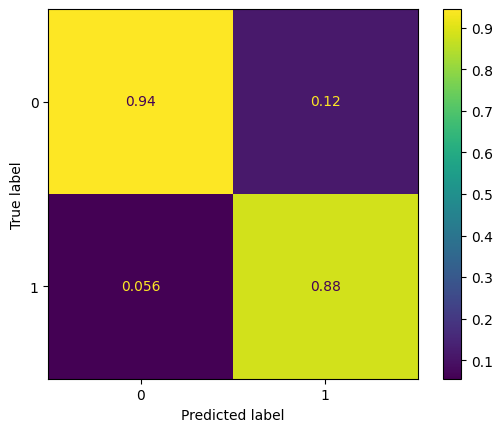

749/749 [==============================] - 2s 2ms/step
0.832
0.168
Cell: ['A160119#001'] - 0
0.841
0.159
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.385
0.615
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.088
0.912
Cell: ['A160426#021'] - 1
0.072
0.928
Cell: ['A160426#080'] - 1
0.126
0.874
Cell: ['A160427#022'] - 1
0.367
0.633
Cell: ['A160427#035'] - 1
0.029
0.971
Cell: ['A160427#037'] - 1
0.141
0.859
Cell: ['A160427#039'] - 1
0.019
0.981
Cell: ['A160427#041'] - 1
0.112
0.888
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.079
0.921
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.227
0.773
Cell: ['A160427#075'] - 1
0.169
0.831
Cell: ['A160427#084'] - 1
0.37
0.63
Cell: ['A

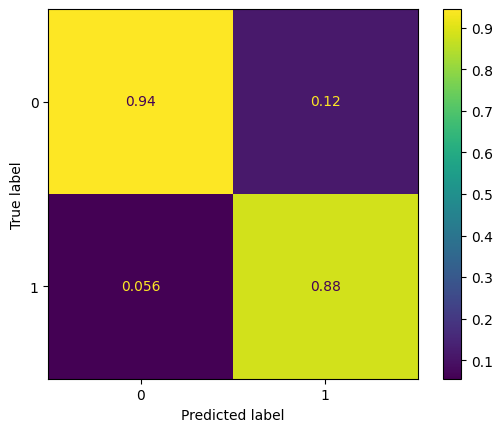

749/749 [==============================] - 2s 2ms/step
0.829
0.171
Cell: ['A160119#001'] - 0
0.864
0.136
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.428
0.572
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.033
0.967
Cell: ['A160426#021'] - 1
0.018
0.982
Cell: ['A160426#080'] - 1
0.059
0.941
Cell: ['A160427#022'] - 1
0.43
0.57
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.032
0.968
Cell: ['A160427#039'] - 1
0.005
0.995
Cell: ['A160427#041'] - 1
0.094
0.906
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.045
0.955
Cell: ['A160427#055'] - 1
0.013
0.987
Cell: ['A160427#073'] - 1
0.252
0.748
Cell: ['A160427#075'] - 1
0.237
0.762
Cell: ['A160427#084'] - 1
0.636
0.364
C

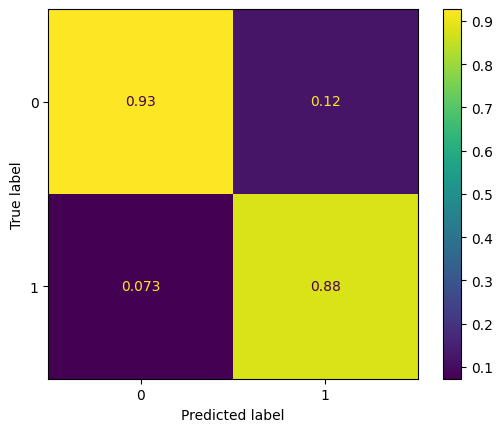

749/749 [==============================] - 2s 2ms/step
0.85
0.15
Cell: ['A160119#001'] - 0
0.866
0.134
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.42
0.58
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.043
0.957
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.055
0.945
Cell: ['A160427#022'] - 1
0.453
0.547
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.028
0.972
Cell: ['A160427#039'] - 1
0.004
0.996
Cell: ['A160427#041'] - 1
0.08
0.92
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.04
0.96
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.242
0.758
Cell: ['A160427#075'] - 1
0.297
0.703
Cell: ['A160427#084'] - 1
0.62
0.38
Cell: ['A1604

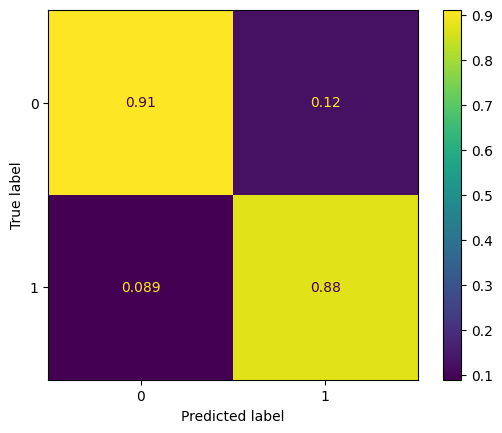

749/749 [==============================] - 2s 2ms/step
0.839
0.161
Cell: ['A160119#001'] - 0
0.798
0.202
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.335
0.665
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.026
0.974
Cell: ['A160426#021'] - 1
0.029
0.971
Cell: ['A160426#080'] - 1
0.063
0.937
Cell: ['A160427#022'] - 1
0.398
0.602
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.054
0.946
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.076
0.924
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.011
0.989
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.256
0.744
Cell: ['A160427#075'] - 1
0.118
0.882
Cell: ['A160427#084'] - 1
0.647
0.353
Cell: ['A16

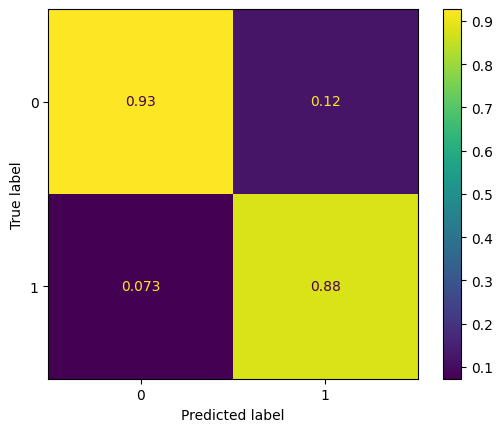

749/749 [==============================] - 2s 3ms/step
0.833
0.167
Cell: ['A160119#001'] - 0
0.796
0.204
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.325
0.675
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.028
0.972
Cell: ['A160426#021'] - 1
0.029
0.972
Cell: ['A160426#080'] - 1
0.056
0.944
Cell: ['A160427#022'] - 1
0.45
0.55
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.066
0.934
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.082
0.918
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.254
0.746
Cell: ['A160427#075'] - 1
0.116
0.884
Cell: ['A160427#084'] - 1
0.677
0.323
Cell: ['A

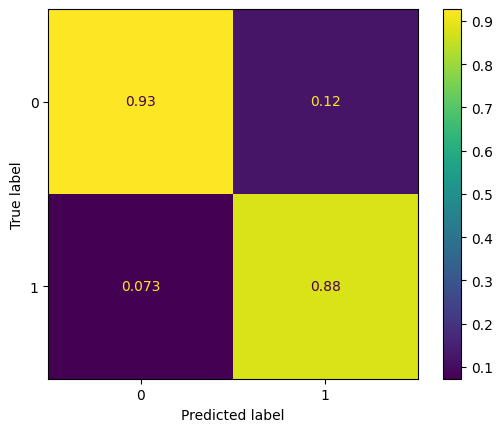

749/749 [==============================] - 2s 2ms/step
0.687
0.313
Cell: ['A160119#001'] - 0
0.835
0.165
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.284
0.716
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.055
0.945
Cell: ['A160426#021'] - 1
0.073
0.927
Cell: ['A160426#080'] - 1
0.111
0.89
Cell: ['A160427#022'] - 1
0.458
0.543
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.113
0.887
Cell: ['A160427#039'] - 1
0.013
0.988
Cell: ['A160427#041'] - 1
0.084
0.916
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.085
0.915
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.291
0.709
Cell: ['A160427#075'] - 1
0.192
0.808
Cell: ['A160427#084'] - 1
0.529
0.471
Cell: ['A160

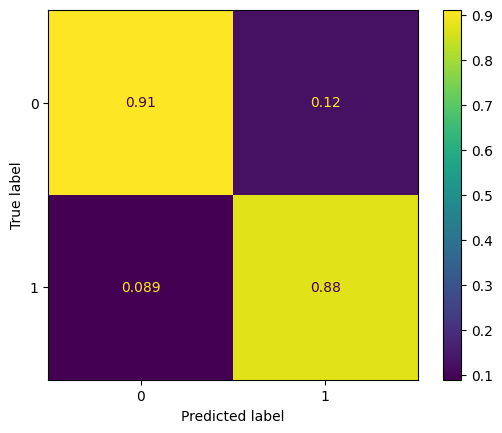

749/749 [==============================] - 2s 2ms/step
0.623
0.377
Cell: ['A160119#001'] - 0
0.85
0.15
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.29
0.71
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.052
0.948
Cell: ['A160426#021'] - 1
0.066
0.934
Cell: ['A160426#080'] - 1
0.125
0.875
Cell: ['A160427#022'] - 1
0.444
0.556
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.116
0.884
Cell: ['A160427#039'] - 1
0.014
0.986
Cell: ['A160427#041'] - 1
0.074
0.926
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.08
0.92
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.229
0.771
Cell: ['A160427#075'] - 1
0.195
0.805
Cell: ['A160427#084'] - 1
0.507
0.493
Cell: ['A160427#0

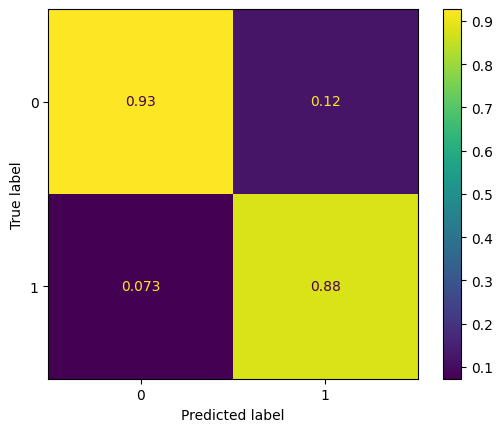

749/749 [==============================] - 2s 3ms/step
0.801
0.199
Cell: ['A160119#001'] - 0
0.886
0.114
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.319
0.681
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.048
0.952
Cell: ['A160426#021'] - 1
0.026
0.974
Cell: ['A160426#080'] - 1
0.1
0.9
Cell: ['A160427#022'] - 1
0.345
0.655
Cell: ['A160427#035'] - 1
0.017
0.983
Cell: ['A160427#037'] - 1
0.098
0.901
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.068
0.932
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.13
0.869
Cell: ['A160427#055'] - 1
0.024
0.976
Cell: ['A160427#073'] - 1
0.262
0.739
Cell: ['A160427#075'] - 1
0.148
0.852
Cell: ['A160427#084'] - 1
0.57
0.43
Cell: ['A160427#094'

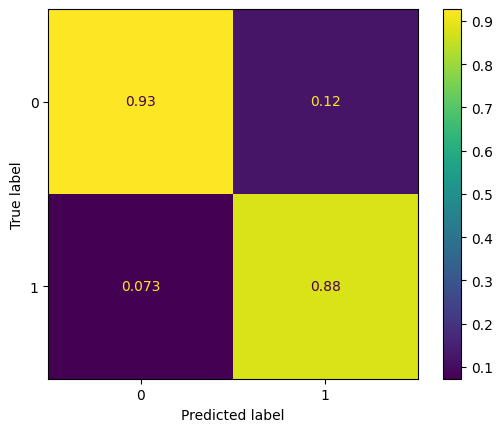

749/749 [==============================] - 2s 3ms/step
0.763
0.237
Cell: ['A160119#001'] - 0
0.87
0.13
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.334
0.666
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.052
0.948
Cell: ['A160426#021'] - 1
0.03
0.97
Cell: ['A160426#080'] - 1
0.12
0.88
Cell: ['A160427#022'] - 1
0.385
0.615
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.093
0.907
Cell: ['A160427#039'] - 1
0.014
0.986
Cell: ['A160427#041'] - 1
0.06
0.94
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.107
0.892
Cell: ['A160427#055'] - 1
0.019
0.981
Cell: ['A160427#073'] - 1
0.237
0.763
Cell: ['A160427#075'] - 1
0.203
0.797
Cell: ['A160427#084'] - 1
0.592
0.408
Cell: ['A160427#094

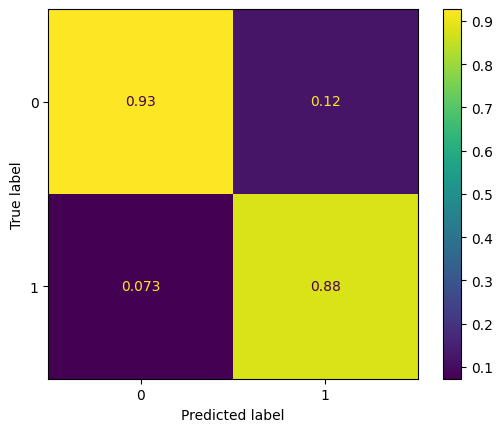

749/749 [==============================] - 2s 2ms/step
0.741
0.259
Cell: ['A160119#001'] - 0
0.854
0.146
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.451
0.549
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.137
0.863
Cell: ['A160426#021'] - 1
0.056
0.944
Cell: ['A160426#080'] - 1
0.174
0.826
Cell: ['A160427#022'] - 1
0.469
0.531
Cell: ['A160427#035'] - 1
0.015
0.985
Cell: ['A160427#037'] - 1
0.14
0.86
Cell: ['A160427#039'] - 1
0.031
0.969
Cell: ['A160427#041'] - 1
0.125
0.875
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.051
0.949
Cell: ['A160427#055'] - 1
0.02
0.98
Cell: ['A160427#073'] - 1
0.294
0.706
Cell: ['A160427#075'] - 1
0.171
0.829
Cell: ['A160427#084'] - 1
0.519
0.481
Cell: ['A16

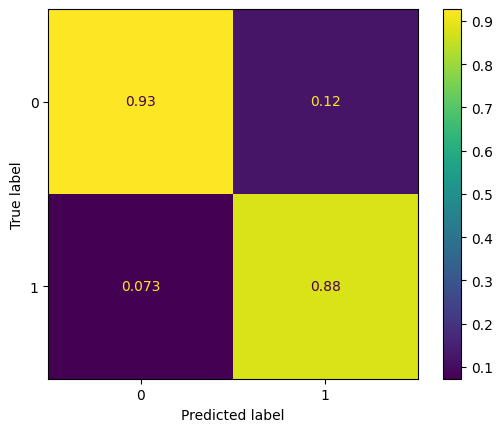

749/749 [==============================] - 2s 3ms/step
0.7
0.3
Cell: ['A160119#001'] - 0
0.868
0.132
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.443
0.557
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.124
0.876
Cell: ['A160426#021'] - 1
0.051
0.949
Cell: ['A160426#080'] - 1
0.198
0.802
Cell: ['A160427#022'] - 1
0.513
0.487
Cell: ['A160427#035'] - 0
0.016
0.984
Cell: ['A160427#037'] - 1
0.137
0.864
Cell: ['A160427#039'] - 1
0.036
0.964
Cell: ['A160427#041'] - 1
0.099
0.901
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.053
0.947
Cell: ['A160427#055'] - 1
0.017
0.983
Cell: ['A160427#073'] - 1
0.28
0.721
Cell: ['A160427#075'] - 1
0.2
0.8
Cell: ['A160427#084'] - 1
0.483
0.517
Cell: ['A160427#

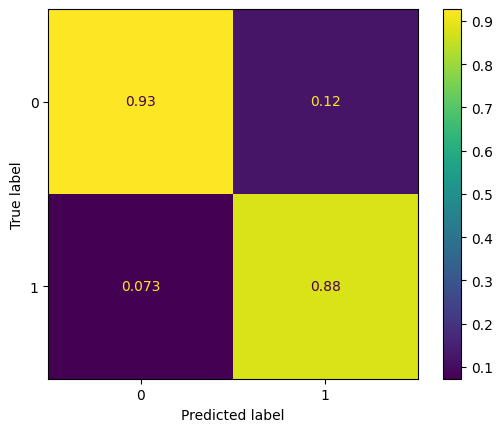

749/749 [==============================] - 2s 3ms/step
0.785
0.216
Cell: ['A160119#001'] - 0
0.709
0.291
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.334
0.666
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.05
0.95
Cell: ['A160426#021'] - 1
0.039
0.961
Cell: ['A160426#080'] - 1
0.065
0.936
Cell: ['A160427#022'] - 1
0.564
0.436
Cell: ['A160427#035'] - 0
0.0
1.0
Cell: ['A160427#037'] - 1
0.046
0.953
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.067
0.933
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.057
0.943
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.199
0.802
Cell: ['A160427#075'] - 1
0.163
0.837
Cell: ['A160427#084'] - 1
0.548
0.452
Cell: ['A1604

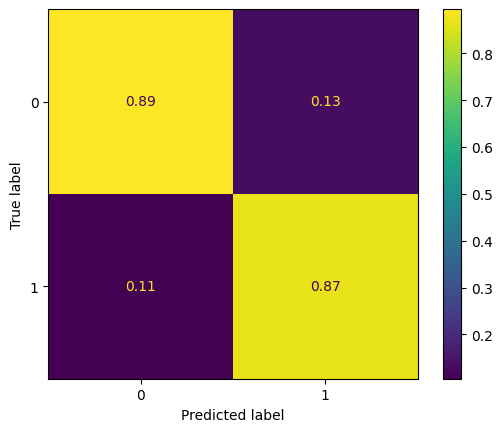

749/749 [==============================] - 2s 3ms/step
0.783
0.217
Cell: ['A160119#001'] - 0
0.716
0.284
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.326
0.674
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.047
0.953
Cell: ['A160426#021'] - 1
0.036
0.964
Cell: ['A160426#080'] - 1
0.059
0.941
Cell: ['A160427#022'] - 1
0.637
0.363
Cell: ['A160427#035'] - 0
0.0
1.0
Cell: ['A160427#037'] - 1
0.054
0.946
Cell: ['A160427#039'] - 1
0.009
0.992
Cell: ['A160427#041'] - 1
0.075
0.925
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.043
0.957
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.182
0.818
Cell: ['A160427#075'] - 1
0.163
0.837
Cell: ['A160427#084'] - 1
0.539
0.461
Cell: ['A160427

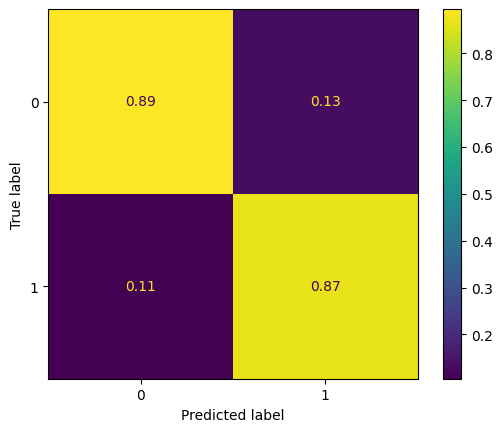

749/749 [==============================] - 2s 3ms/step
0.764
0.236
Cell: ['A160119#001'] - 0
0.746
0.254
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.355
0.645
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.104
0.896
Cell: ['A160426#021'] - 1
0.057
0.944
Cell: ['A160426#080'] - 1
0.18
0.82
Cell: ['A160427#022'] - 1
0.45
0.55
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.085
0.915
Cell: ['A160427#039'] - 1
0.006
0.994
Cell: ['A160427#041'] - 1
0.107
0.893
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.079
0.922
Cell: ['A160427#055'] - 1
0.02
0.98
Cell: ['A160427#073'] - 1
0.356
0.644
Cell: ['A160427#075'] - 1
0.295
0.706
Cell: ['A160427#084'] - 1
0.613
0.386
Cell: ['A

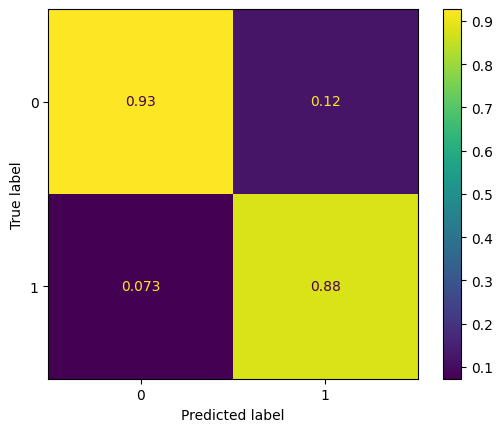

749/749 [==============================] - 2s 3ms/step
0.803
0.197
Cell: ['A160119#001'] - 0
0.727
0.272
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.315
0.684
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.995
0.005
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.99
0.01
Cell: ['A160205#051'] - 0
0.102
0.898
Cell: ['A160426#021'] - 1
0.048
0.951
Cell: ['A160426#080'] - 1
0.162
0.838
Cell: ['A160427#022'] - 1
0.378
0.621
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.069
0.931
Cell: ['A160427#039'] - 1
0.007
0.993
Cell: ['A160427#041'] - 1
0.087
0.912
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.061
0.939
Cell: ['A160427#055'] - 1
0.016
0.984
Cell: ['A160427#073'] - 1
0.302
0.698
Cell: ['A160427#075'] - 1
0.263
0.737
Cell: ['A160427#084'] - 1
0.523
0.477
C

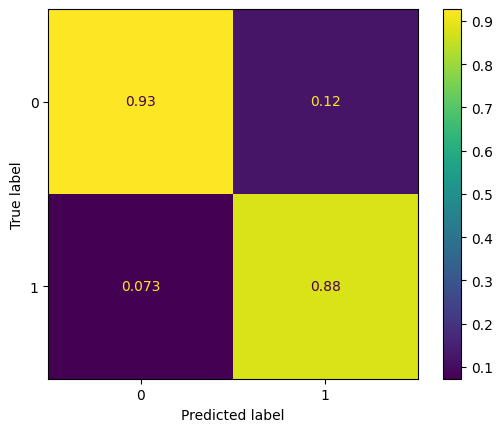

749/749 [==============================] - 2s 3ms/step
0.785
0.215
Cell: ['A160119#001'] - 0
0.791
0.209
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.396
0.604
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.045
0.955
Cell: ['A160426#021'] - 1
0.021
0.979
Cell: ['A160426#080'] - 1
0.069
0.931
Cell: ['A160427#022'] - 1
0.518
0.482
Cell: ['A160427#035'] - 0
0.005
0.995
Cell: ['A160427#037'] - 1
0.094
0.906
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.146
0.855
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.027
0.973
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.431
0.569
Cell: ['A160427#075'] - 1
0.077
0.923
Cell: ['A160427#084'] - 1
0.765
0.235
Cel

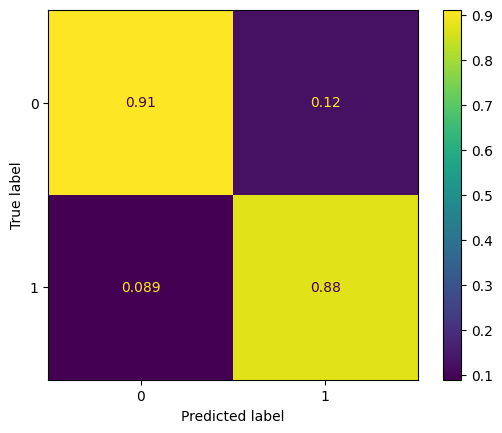

749/749 [==============================] - 2s 2ms/step
0.767
0.233
Cell: ['A160119#001'] - 0
0.793
0.207
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.364
0.636
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.035
0.965
Cell: ['A160426#021'] - 1
0.016
0.984
Cell: ['A160426#080'] - 1
0.055
0.945
Cell: ['A160427#022'] - 1
0.487
0.512
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.097
0.903
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.134
0.866
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.027
0.973
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.454
0.546
Cell: ['A160427#075'] - 1
0.061
0.939
Cell: ['A160427#084'] - 1
0.798
0

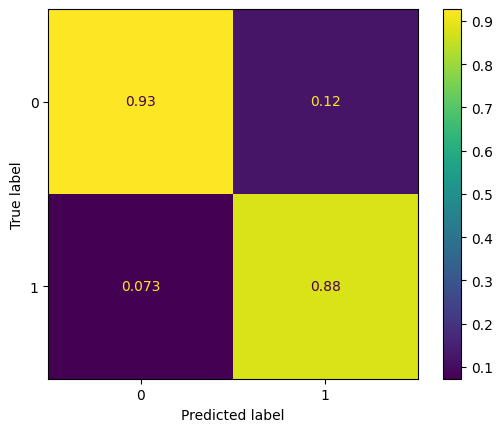

749/749 [==============================] - 2s 2ms/step
0.769
0.231
Cell: ['A160119#001'] - 0
0.73
0.27
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.348
0.652
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.069
0.931
Cell: ['A160426#021'] - 1
0.017
0.983
Cell: ['A160426#080'] - 1
0.066
0.934
Cell: ['A160427#022'] - 1
0.397
0.603
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.05
0.95
Cell: ['A160427#039'] - 1
0.021
0.979
Cell: ['A160427#041'] - 1
0.097
0.902
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.045
0.955
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.27
0.73
Cell: ['A160427#075'] - 1
0.072
0.928
Cell: ['A160427#084'] - 1
0.547
0.453
Cell: ['A1604

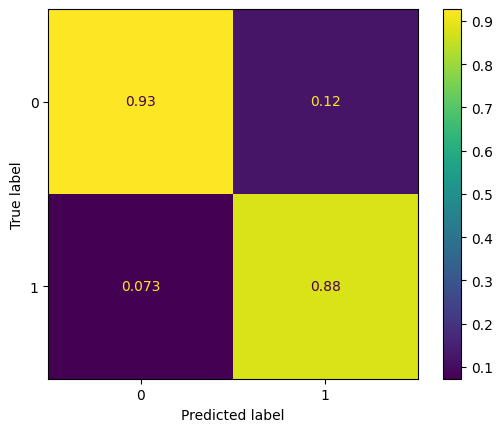

749/749 [==============================] - 2s 3ms/step
0.785
0.215
Cell: ['A160119#001'] - 0
0.74
0.26
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.361
0.639
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.067
0.933
Cell: ['A160426#021'] - 1
0.028
0.972
Cell: ['A160426#080'] - 1
0.079
0.921
Cell: ['A160427#022'] - 1
0.367
0.633
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.058
0.942
Cell: ['A160427#039'] - 1
0.026
0.974
Cell: ['A160427#041'] - 1
0.097
0.903
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.047
0.953
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.279
0.721
Cell: ['A160427#075'] - 1
0.078
0.922
Cell: ['A160427#084'] - 1
0.499
0.501
Cell:

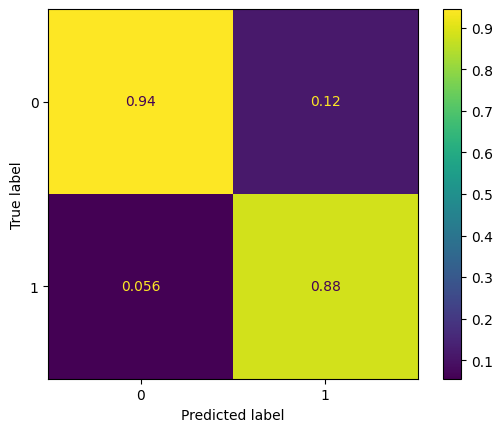

749/749 [==============================] - 2s 2ms/step
0.824
0.176
Cell: ['A160119#001'] - 0
0.803
0.196
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.383
0.618
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.138
0.862
Cell: ['A160426#021'] - 1
0.064
0.936
Cell: ['A160426#080'] - 1
0.093
0.907
Cell: ['A160427#022'] - 1
0.424
0.576
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.111
0.889
Cell: ['A160427#039'] - 1
0.019
0.981
Cell: ['A160427#041'] - 1
0.112
0.888
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.113
0.887
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.334
0.666
Cell: ['A160427#075'] - 1
0.221
0.779
Cell: ['A160427#084'] - 1
0.536
0.463
Cel

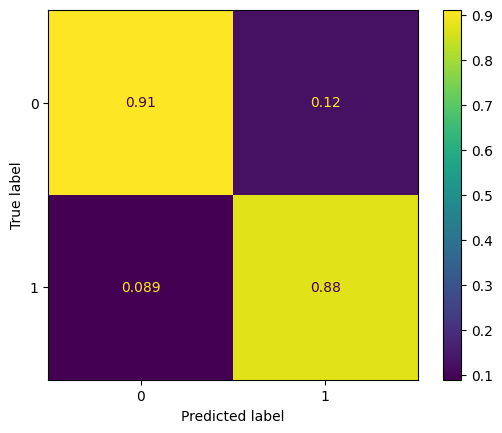

749/749 [==============================] - 2s 2ms/step
0.779
0.221
Cell: ['A160119#001'] - 0
0.792
0.208
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.368
0.632
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.999
0.001
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.126
0.874
Cell: ['A160426#021'] - 1
0.069
0.931
Cell: ['A160426#080'] - 1
0.089
0.911
Cell: ['A160427#022'] - 1
0.406
0.594
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.093
0.907
Cell: ['A160427#039'] - 1
0.01
0.99
Cell: ['A160427#041'] - 1
0.106
0.894
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.128
0.872
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.306
0.694
Cell: ['A160427#075'] - 1
0.31
0.69
Cell: ['A160427#084'] - 1
0.478
0.523
Cell: ['A16

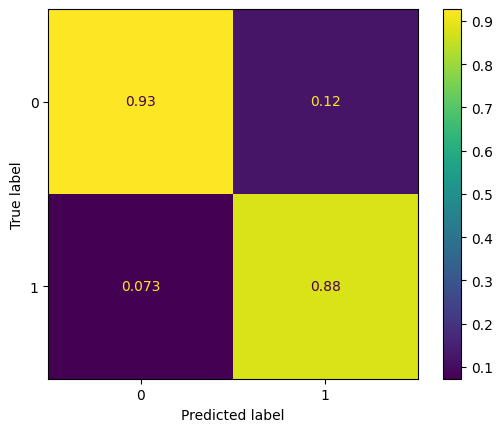

749/749 [==============================] - 2s 2ms/step
0.834
0.166
Cell: ['A160119#001'] - 0
0.77
0.23
Cell: ['A160125#009'] - 0
1.0
0.0
Cell: ['A160125#049'] - 0
0.335
0.665
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.129
0.871
Cell: ['A160426#021'] - 1
0.063
0.937
Cell: ['A160426#080'] - 1
0.112
0.888
Cell: ['A160427#022'] - 1
0.55
0.45
Cell: ['A160427#035'] - 0
0.0
1.0
Cell: ['A160427#037'] - 1
0.073
0.926
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.093
0.907
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.106
0.895
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.285
0.715
Cell: ['A160427#075'] - 1
0.172
0.828
Cell: ['A160427#084'] - 1
0.471
0.529
Cell: ['A160427#094

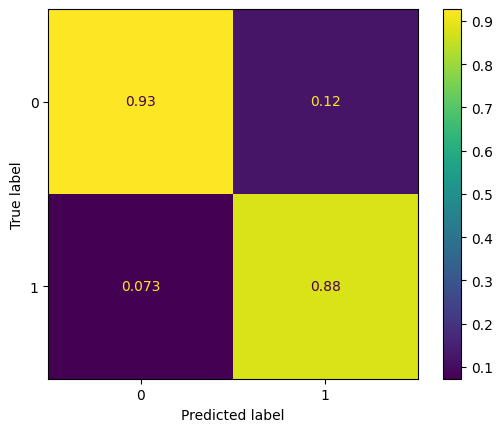

749/749 [==============================] - 2s 2ms/step
0.905
0.095
Cell: ['A160119#001'] - 0
0.798
0.202
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.368
0.632
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.125
0.875
Cell: ['A160426#021'] - 1
0.038
0.962
Cell: ['A160426#080'] - 1
0.076
0.924
Cell: ['A160427#022'] - 1
0.521
0.479
Cell: ['A160427#035'] - 0
0.0
1.0
Cell: ['A160427#037'] - 1
0.073
0.927
Cell: ['A160427#039'] - 1
0.004
0.996
Cell: ['A160427#041'] - 1
0.105
0.895
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.123
0.878
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.331
0.669
Cell: ['A160427#075'] - 1
0.144
0.856
Cell: ['A160427#084'] - 1
0.543
0.457
Cell: [

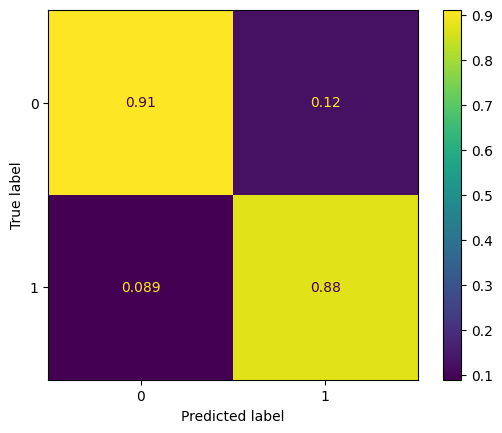

749/749 [==============================] - 2s 2ms/step
0.884
0.116
Cell: ['A160119#001'] - 0
0.754
0.246
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.236
0.764
Cell: ['A160125#087'] - 1
0.99
0.01
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.117
0.883
Cell: ['A160426#021'] - 1
0.04
0.96
Cell: ['A160426#080'] - 1
0.045
0.955
Cell: ['A160427#022'] - 1
0.405
0.595
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.067
0.933
Cell: ['A160427#039'] - 1
0.006
0.994
Cell: ['A160427#041'] - 1
0.089
0.911
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.119
0.882
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.323
0.677
Cell: ['A160427#075'] - 1
0.228
0.772
Cell: ['A160427#084'] - 1
0.501
0.5
Cell: ['A160427#0

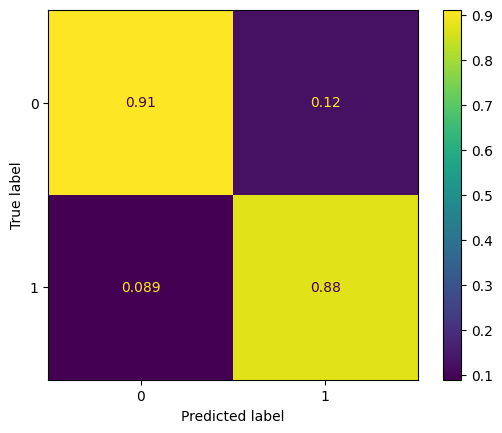

749/749 [==============================] - 2s 2ms/step
0.868
0.132
Cell: ['A160119#001'] - 0
0.74
0.26
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.214
0.786
Cell: ['A160125#087'] - 1
0.988
0.012
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.099
0.901
Cell: ['A160426#021'] - 1
0.032
0.968
Cell: ['A160426#080'] - 1
0.044
0.956
Cell: ['A160427#022'] - 1
0.399
0.601
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.058
0.942
Cell: ['A160427#039'] - 1
0.004
0.996
Cell: ['A160427#041'] - 1
0.072
0.928
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.139
0.861
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.248
0.752
Cell: ['A160427#075'] - 1
0.207
0.793
Cell: ['A160427#084'] - 1
0.397
0.603
Cell:

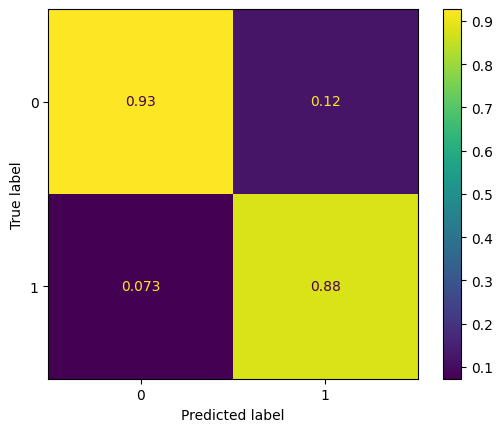

749/749 [==============================] - 2s 2ms/step
0.842
0.158
Cell: ['A160119#001'] - 0
0.778
0.222
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.289
0.711
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.11
0.89
Cell: ['A160426#021'] - 1
0.053
0.947
Cell: ['A160426#080'] - 1
0.089
0.911
Cell: ['A160427#022'] - 1
0.56
0.44
Cell: ['A160427#035'] - 0
0.001
0.999
Cell: ['A160427#037'] - 1
0.084
0.916
Cell: ['A160427#039'] - 1
0.005
0.995
Cell: ['A160427#041'] - 1
0.048
0.952
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.093
0.907
Cell: ['A160427#055'] - 1
0.006
0.994
Cell: ['A160427#073'] - 1
0.275
0.725
Cell: ['A160427#075'] - 1
0.401
0.599
Cell: ['A160427#084'] - 1
0.503
0.497
Cell: ['A16

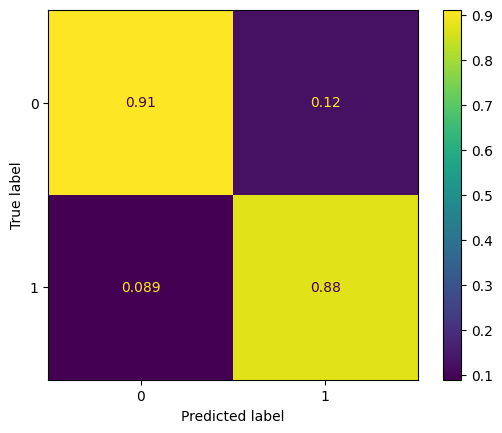

749/749 [==============================] - 2s 2ms/step
0.795
0.205
Cell: ['A160119#001'] - 0
0.813
0.187
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.293
0.707
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.113
0.887
Cell: ['A160426#021'] - 1
0.045
0.955
Cell: ['A160426#080'] - 1
0.082
0.919
Cell: ['A160427#022'] - 1
0.587
0.413
Cell: ['A160427#035'] - 0
0.002
0.998
Cell: ['A160427#037'] - 1
0.099
0.902
Cell: ['A160427#039'] - 1
0.005
0.995
Cell: ['A160427#041'] - 1
0.056
0.944
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.062
0.938
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.272
0.728
Cell: ['A160427#075'] - 1
0.343
0.656
Cell: ['A160427#084'] - 1
0.444
0.556
Cel

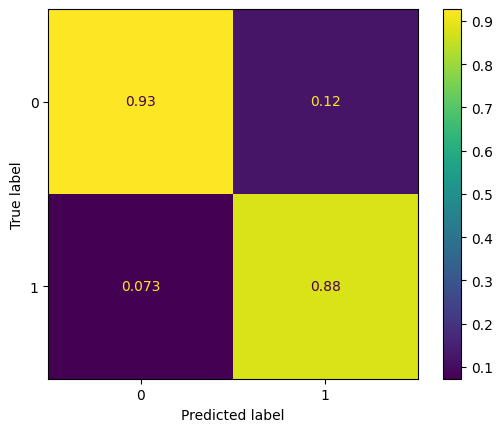

749/749 [==============================] - 2s 2ms/step
0.861
0.138
Cell: ['A160119#001'] - 0
0.776
0.224
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.343
0.657
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.063
0.937
Cell: ['A160426#021'] - 1
0.088
0.912
Cell: ['A160426#080'] - 1
0.094
0.906
Cell: ['A160427#022'] - 1
0.479
0.521
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.06
0.94
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.077
0.922
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.21
0.79
Cell: ['A160427#075'] - 1
0.244
0.755
Cell: ['A160427#084'] - 1
0.504
0.496
Cell: [

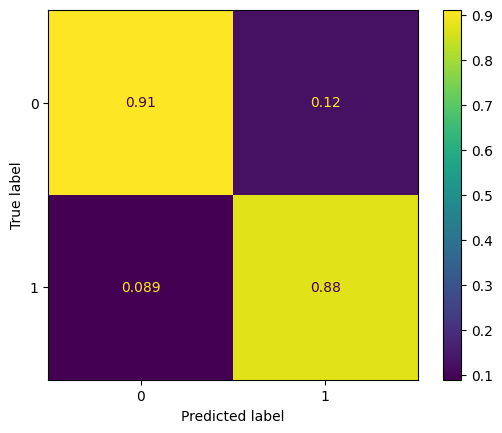

749/749 [==============================] - 2s 2ms/step
0.815
0.185
Cell: ['A160119#001'] - 0
0.781
0.219
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.343
0.657
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.053
0.947
Cell: ['A160426#021'] - 1
0.082
0.918
Cell: ['A160426#080'] - 1
0.074
0.926
Cell: ['A160427#022'] - 1
0.49
0.51
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.055
0.945
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.091
0.909
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.088
0.912
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.256
0.744
Cell: ['A160427#075'] - 1
0.187
0.812
Cell: ['A160427#084'] - 1
0.615
0.385
C

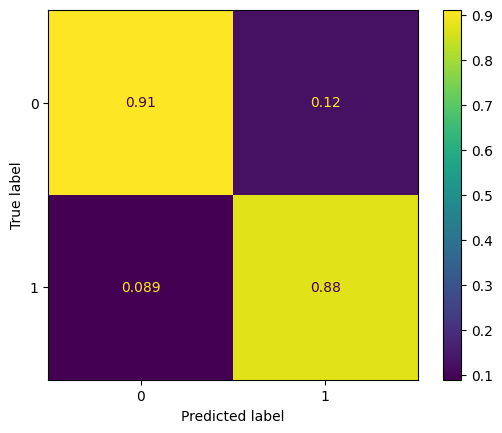

749/749 [==============================] - 2s 2ms/step
0.775
0.225
Cell: ['A160119#001'] - 0
0.7
0.3
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.201
0.799
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.051
0.949
Cell: ['A160426#021'] - 1
0.057
0.943
Cell: ['A160426#080'] - 1
0.08
0.92
Cell: ['A160427#022'] - 1
0.395
0.605
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.067
0.933
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.059
0.941
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.05
0.95
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.277
0.723
Cell: ['A160427#075'] - 1
0.19
0.81
Cell: ['A160427#084'] - 1
0.59
0.411
Cell: ['A160427#09

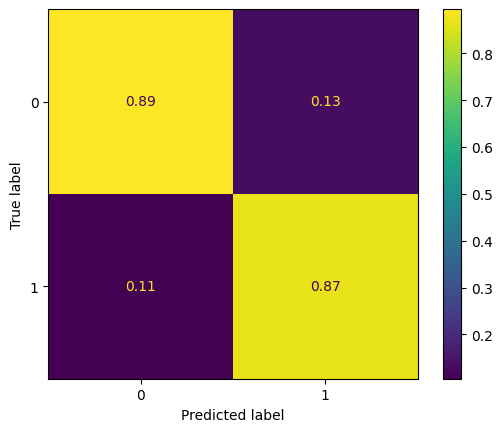

749/749 [==============================] - 2s 2ms/step
0.802
0.198
Cell: ['A160119#001'] - 0
0.691
0.309
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.194
0.806
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.044
0.956
Cell: ['A160426#021'] - 1
0.052
0.949
Cell: ['A160426#080'] - 1
0.08
0.92
Cell: ['A160427#022'] - 1
0.411
0.589
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.057
0.943
Cell: ['A160427#039'] - 1
0.011
0.989
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.049
0.951
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.253
0.747
Cell: ['A160427#075'] - 1
0.18
0.82
Cell: ['A160427#084'] - 1
0.553
0.448
Cell: ['A160427

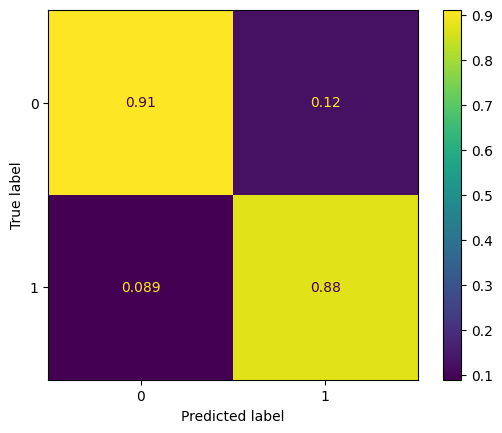

749/749 [==============================] - 2s 2ms/step
0.83
0.17
Cell: ['A160119#001'] - 0
0.792
0.208
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.324
0.676
Cell: ['A160125#087'] - 1
0.989
0.011
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.052
0.948
Cell: ['A160426#021'] - 1
0.04
0.96
Cell: ['A160426#080'] - 1
0.059
0.941
Cell: ['A160427#022'] - 1
0.453
0.547
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.054
0.946
Cell: ['A160427#039'] - 1
0.03
0.97
Cell: ['A160427#041'] - 1
0.071
0.929
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.042
0.958
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.212
0.788
Cell: ['A160427#075'] - 1
0.064
0.936
Cell: ['A160427#084'] - 1
0.424
0.576
Cell: ['A1604

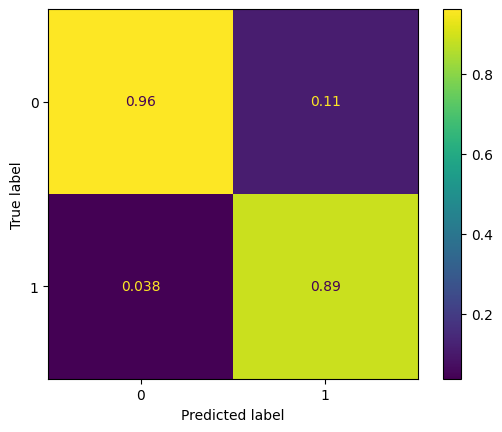

749/749 [==============================] - 2s 2ms/step
0.798
0.202
Cell: ['A160119#001'] - 0
0.805
0.195
Cell: ['A160125#009'] - 0
0.999
0.002
Cell: ['A160125#049'] - 0
0.333
0.667
Cell: ['A160125#087'] - 1
0.981
0.019
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.048
0.952
Cell: ['A160426#021'] - 1
0.04
0.959
Cell: ['A160426#080'] - 1
0.052
0.948
Cell: ['A160427#022'] - 1
0.424
0.576
Cell: ['A160427#035'] - 1
0.005
0.995
Cell: ['A160427#037'] - 1
0.091
0.909
Cell: ['A160427#039'] - 1
0.026
0.974
Cell: ['A160427#041'] - 1
0.091
0.909
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.033
0.967
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.227
0.773
Cell: ['A160427#075'] - 1
0.076
0.924
Cell: ['A160427#084'] - 1
0.475
0.526
Cell

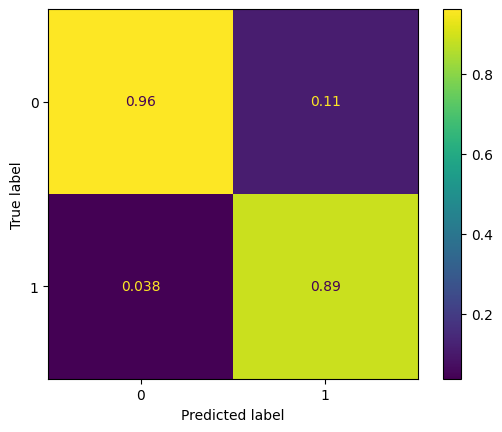

749/749 [==============================] - 2s 2ms/step
0.844
0.156
Cell: ['A160119#001'] - 0
0.86
0.14
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.364
0.637
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.996
0.004
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.163
0.837
Cell: ['A160426#021'] - 1
0.072
0.928
Cell: ['A160426#080'] - 1
0.151
0.849
Cell: ['A160427#022'] - 1
0.474
0.526
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.112
0.888
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.088
0.912
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.047
0.953
Cell: ['A160427#055'] - 1
0.013
0.988
Cell: ['A160427#073'] - 1
0.318
0.682
Cell: ['A160427#075'] - 1
0.222
0.778
Cell: ['A160427#084'] - 1
0.434
0.566
C

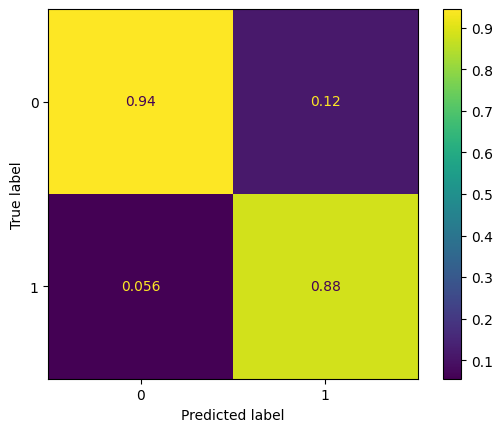

749/749 [==============================] - 2s 2ms/step
0.796
0.204
Cell: ['A160119#001'] - 0
0.822
0.178
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.331
0.669
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.995
0.005
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.136
0.865
Cell: ['A160426#021'] - 1
0.045
0.955
Cell: ['A160426#080'] - 1
0.133
0.867
Cell: ['A160427#022'] - 1
0.432
0.568
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.072
0.928
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.079
0.921
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.042
0.958
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.252
0.748
Cell: ['A160427#075'] - 1
0.203
0.797
Cell: ['A160427#084'] - 1
0.385
0

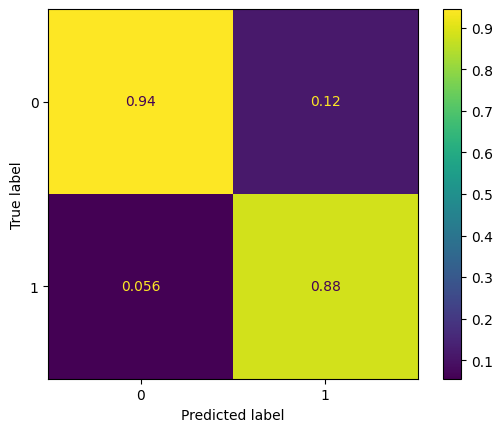

749/749 [==============================] - 2s 2ms/step
0.871
0.129
Cell: ['A160119#001'] - 0
0.894
0.106
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.291
0.709
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.052
0.948
Cell: ['A160426#021'] - 1
0.051
0.949
Cell: ['A160426#080'] - 1
0.084
0.916
Cell: ['A160427#022'] - 1
0.466
0.534
Cell: ['A160427#035'] - 1
0.024
0.976
Cell: ['A160427#037'] - 1
0.152
0.848
Cell: ['A160427#039'] - 1
0.034
0.966
Cell: ['A160427#041'] - 1
0.077
0.923
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.015
0.985
Cell: ['A160427#055'] - 1
0.013
0.987
Cell: ['A160427#073'] - 1
0.299
0.7
Cell: ['A160427#075'] - 1
0.186
0.814
Cell: ['A160427#084'] - 1
0.531
0.468
Cell:

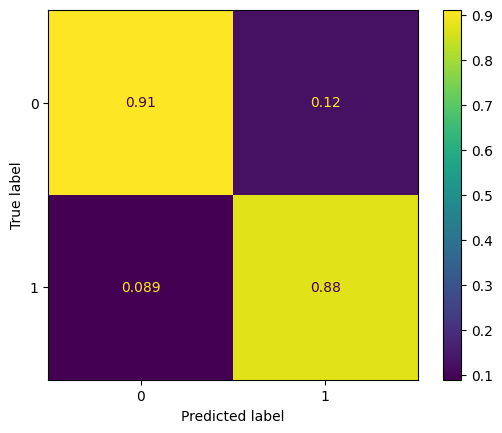

749/749 [==============================] - 2s 2ms/step
0.831
0.169
Cell: ['A160119#001'] - 0
0.89
0.11
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.254
0.746
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.051
0.949
Cell: ['A160426#021'] - 1
0.039
0.96
Cell: ['A160426#080'] - 1
0.085
0.915
Cell: ['A160427#022'] - 1
0.428
0.572
Cell: ['A160427#035'] - 1
0.016
0.984
Cell: ['A160427#037'] - 1
0.172
0.828
Cell: ['A160427#039'] - 1
0.031
0.969
Cell: ['A160427#041'] - 1
0.072
0.928
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.015
0.985
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.289
0.71
Cell: ['A160427#075'] - 1
0.166
0.834
Cell: ['A160427#084'] - 1
0.483
0.516
Cell: [

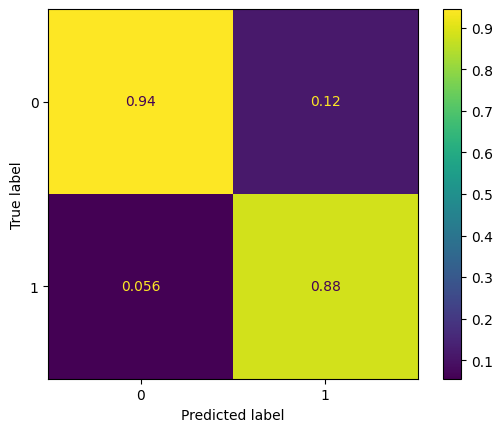

749/749 [==============================] - 2s 2ms/step
0.866
0.134
Cell: ['A160119#001'] - 0
0.862
0.138
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.285
0.716
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.048
0.952
Cell: ['A160426#021'] - 1
0.057
0.943
Cell: ['A160426#080'] - 1
0.107
0.893
Cell: ['A160427#022'] - 1
0.372
0.628
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.085
0.915
Cell: ['A160427#039'] - 1
0.003
0.997
Cell: ['A160427#041'] - 1
0.07
0.931
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.049
0.951
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.286
0.714
Cell: ['A160427#075'] - 1
0.098
0.902
Cell: ['A160427#084'] - 1
0.451
0.549
Cell: ['

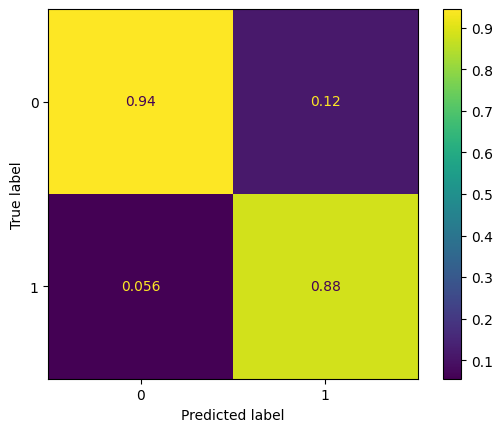

749/749 [==============================] - 2s 2ms/step
0.865
0.135
Cell: ['A160119#001'] - 0
0.855
0.145
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.27
0.73
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.062
0.938
Cell: ['A160426#021'] - 1
0.042
0.958
Cell: ['A160426#080'] - 1
0.084
0.916
Cell: ['A160427#022'] - 1
0.424
0.576
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.078
0.923
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.053
0.947
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.058
0.941
Cell: ['A160427#055'] - 1
0.01
0.99
Cell: ['A160427#073'] - 1
0.296
0.704
Cell: ['A160427#075'] - 1
0.079
0.92
Cell: ['A160427#084'] - 1
0.441
0.559
Cell: ['A160427#

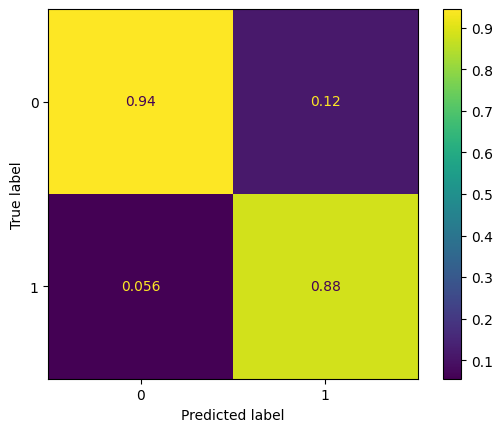

749/749 [==============================] - 2s 2ms/step
0.871
0.129
Cell: ['A160119#001'] - 0
0.835
0.165
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.403
0.597
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.072
0.928
Cell: ['A160426#021'] - 1
0.092
0.908
Cell: ['A160426#080'] - 1
0.174
0.826
Cell: ['A160427#022'] - 1
0.34
0.66
Cell: ['A160427#035'] - 1
0.031
0.969
Cell: ['A160427#037'] - 1
0.146
0.854
Cell: ['A160427#039'] - 1
0.021
0.979
Cell: ['A160427#041'] - 1
0.073
0.927
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.036
0.964
Cell: ['A160427#055'] - 1
0.01
0.99
Cell: ['A160427#073'] - 1
0.346
0.654
Cell: ['A160427#075'] - 1
0.136
0.865
Cell: ['A160427#084'] - 1
0.616
0.384
Cell: ['A160427

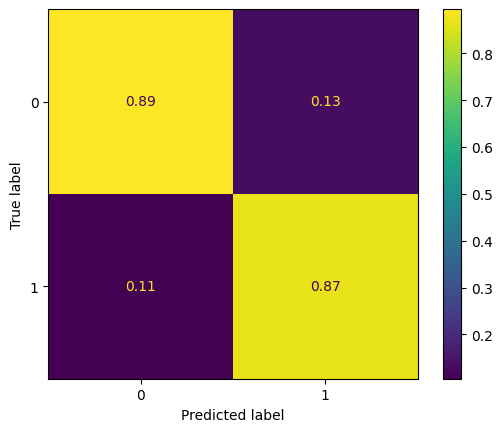

749/749 [==============================] - 2s 2ms/step
0.856
0.144
Cell: ['A160119#001'] - 0
0.815
0.185
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.412
0.588
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.058
0.942
Cell: ['A160426#021'] - 1
0.078
0.922
Cell: ['A160426#080'] - 1
0.162
0.837
Cell: ['A160427#022'] - 1
0.334
0.666
Cell: ['A160427#035'] - 1
0.022
0.977
Cell: ['A160427#037'] - 1
0.112
0.888
Cell: ['A160427#039'] - 1
0.019
0.981
Cell: ['A160427#041'] - 1
0.087
0.913
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.055
0.945
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.364
0.636
Cell: ['A160427#075'] - 1
0.154
0.846
Cell: ['A160427#084'] - 1
0.64
0.36
Cell: ['A1604

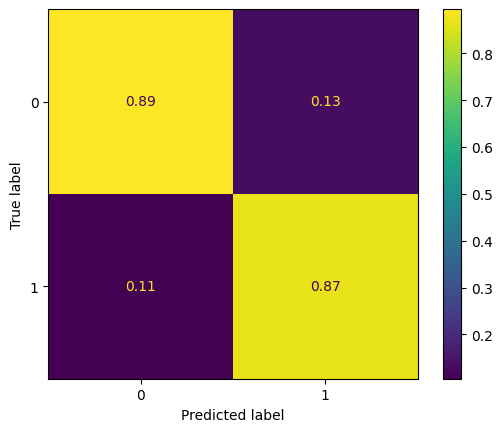

749/749 [==============================] - 2s 2ms/step
0.804
0.196
Cell: ['A160119#001'] - 0
0.837
0.164
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.439
0.561
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.126
0.873
Cell: ['A160426#021'] - 1
0.027
0.973
Cell: ['A160426#080'] - 1
0.103
0.897
Cell: ['A160427#022'] - 1
0.316
0.684
Cell: ['A160427#035'] - 1
0.051
0.949
Cell: ['A160427#037'] - 1
0.152
0.848
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.024
0.976
Cell: ['A160427#073'] - 1
0.557
0.442
Cell: ['A160427#075'] - 0
0.01
0.99
Cell: ['A160427#084'] - 1
0.825
0.175
Cell:

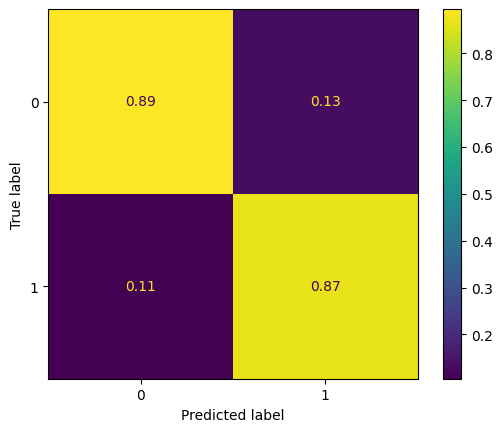

749/749 [==============================] - 2s 3ms/step
0.803
0.197
Cell: ['A160119#001'] - 0
0.82
0.18
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.404
0.596
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
0.999
0.001
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.121
0.879
Cell: ['A160426#021'] - 1
0.017
0.983
Cell: ['A160426#080'] - 1
0.093
0.906
Cell: ['A160427#022'] - 1
0.325
0.675
Cell: ['A160427#035'] - 1
0.029
0.971
Cell: ['A160427#037'] - 1
0.108
0.893
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.082
0.918
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.02
0.98
Cell: ['A160427#073'] - 1
0.535
0.465
Cell: ['A160427#075'] - 0
0.013
0.987
Cell: ['A160427#084'] - 1
0.815
0.186
Cell: [

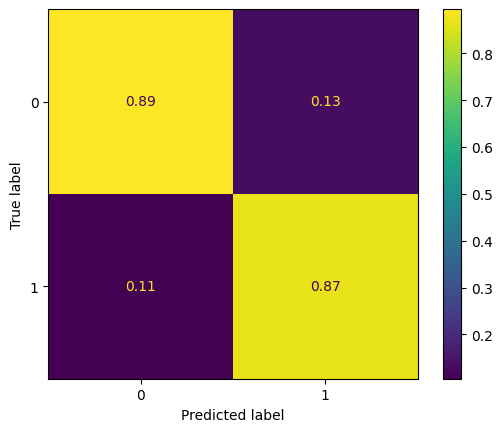

749/749 [==============================] - 2s 2ms/step
0.798
0.202
Cell: ['A160119#001'] - 0
0.756
0.245
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.455
0.545
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.064
0.936
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.111
0.889
Cell: ['A160427#022'] - 1
0.351
0.649
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.134
0.866
Cell: ['A160427#039'] - 1
0.006
0.994
Cell: ['A160427#041'] - 1
0.128
0.872
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.027
0.974
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.24
0.76
Cell: ['A160427#075'] - 1
0.138
0.862
Cell: ['A160427#084'] - 1
0.491
0.508
C

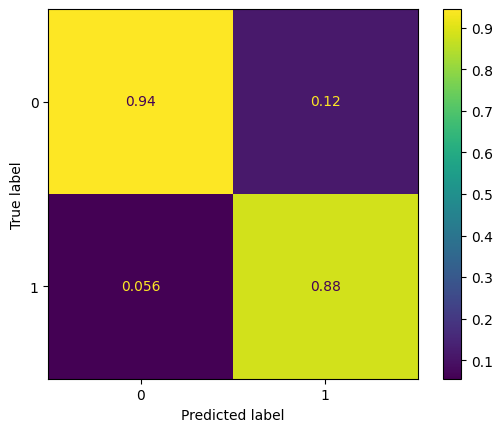

749/749 [==============================] - 2s 2ms/step
0.8
0.2
Cell: ['A160119#001'] - 0
0.778
0.221
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.437
0.563
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.059
0.941
Cell: ['A160426#021'] - 1
0.029
0.971
Cell: ['A160426#080'] - 1
0.107
0.893
Cell: ['A160427#022'] - 1
0.348
0.652
Cell: ['A160427#035'] - 1
0.01
0.99
Cell: ['A160427#037'] - 1
0.144
0.857
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.102
0.898
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.018
0.982
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.225
0.775
Cell: ['A160427#075'] - 1
0.141
0.86
Cell: ['A160427#084'] - 1
0.471
0.528
Cell: ['A1

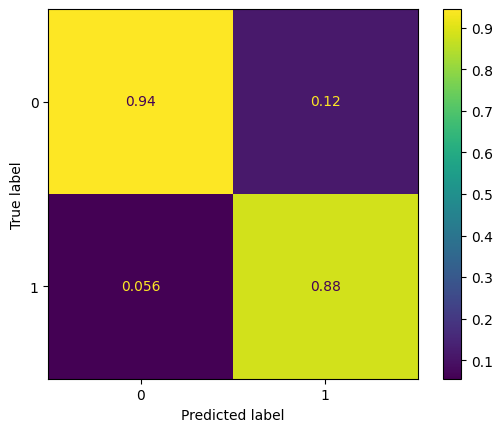

749/749 [==============================] - 2s 2ms/step
0.791
0.209
Cell: ['A160119#001'] - 0
0.86
0.14
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.338
0.662
Cell: ['A160125#087'] - 1
0.988
0.012
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.058
0.942
Cell: ['A160426#021'] - 1
0.027
0.973
Cell: ['A160426#080'] - 1
0.058
0.942
Cell: ['A160427#022'] - 1
0.343
0.657
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.108
0.893
Cell: ['A160427#039'] - 1
0.117
0.883
Cell: ['A160427#041'] - 1
0.085
0.915
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.977
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.273
0.728
Cell: ['A160427#075'] - 1
0.04
0.96
Cell: ['A160427#084'] - 1
0.555
0.445
Cell: [

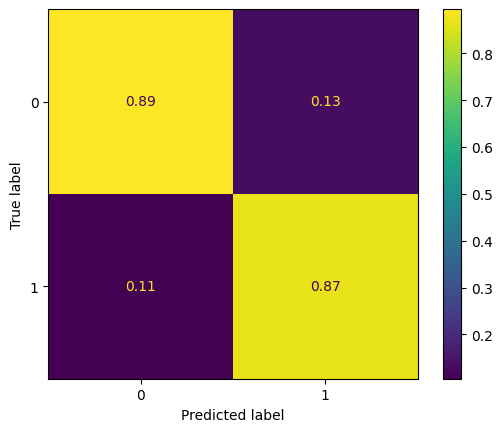

749/749 [==============================] - 2s 2ms/step
0.807
0.193
Cell: ['A160119#001'] - 0
0.861
0.139
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.337
0.663
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.077
0.923
Cell: ['A160426#021'] - 1
0.031
0.969
Cell: ['A160426#080'] - 1
0.066
0.934
Cell: ['A160427#022'] - 1
0.332
0.668
Cell: ['A160427#035'] - 1
0.01
0.99
Cell: ['A160427#037'] - 1
0.103
0.896
Cell: ['A160427#039'] - 1
0.145
0.855
Cell: ['A160427#041'] - 1
0.108
0.892
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.034
0.966
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.335
0.665
Cell: ['A160427#075'] - 1
0.049
0.951
Cell: ['A160427#084'] - 1
0.678
0.322
C

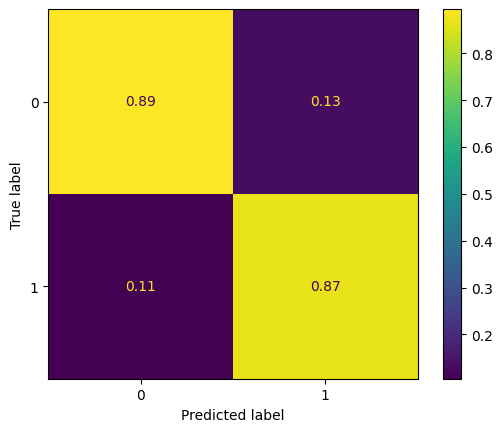

749/749 [==============================] - 2s 2ms/step
0.814
0.186
Cell: ['A160119#001'] - 0
0.75
0.25
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.206
0.794
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.056
0.944
Cell: ['A160426#021'] - 1
0.054
0.946
Cell: ['A160426#080'] - 1
0.125
0.875
Cell: ['A160427#022'] - 1
0.313
0.687
Cell: ['A160427#035'] - 1
0.005
0.995
Cell: ['A160427#037'] - 1
0.093
0.907
Cell: ['A160427#039'] - 1
0.094
0.906
Cell: ['A160427#041'] - 1
0.057
0.943
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.134
0.867
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.245
0.755
Cell: ['A160427#075'] - 1
0.318
0.681
Cell: ['A160427#084'] - 1
0.497
0.503
C

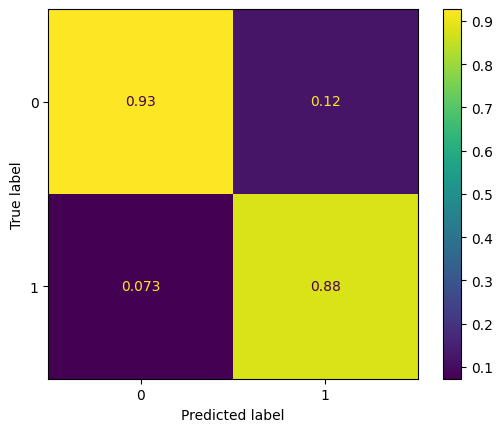

749/749 [==============================] - 2s 2ms/step
0.8
0.2
Cell: ['A160119#001'] - 0
0.757
0.242
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.183
0.817
Cell: ['A160125#087'] - 1
0.99
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.998
0.001
Cell: ['A160205#051'] - 0
0.041
0.959
Cell: ['A160426#021'] - 1
0.04
0.959
Cell: ['A160426#080'] - 1
0.092
0.908
Cell: ['A160427#022'] - 1
0.298
0.702
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.06
0.94
Cell: ['A160427#039'] - 1
0.133
0.866
Cell: ['A160427#041'] - 1
0.059
0.941
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.097
0.903
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.243
0.756
Cell: ['A160427#075'] - 1
0.186
0.813
Cell: ['A160427#084'] - 1
0.507
0.493
Cell: ['A16

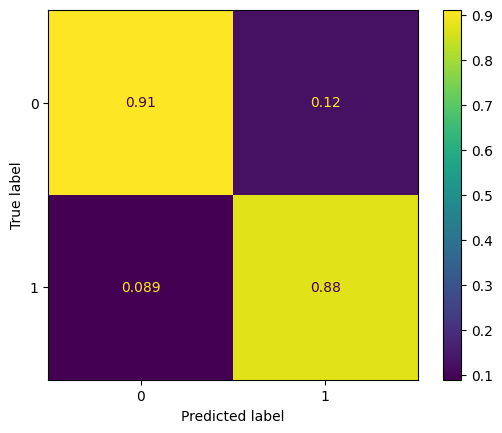

749/749 [==============================] - 2s 2ms/step
0.855
0.145
Cell: ['A160119#001'] - 0
0.808
0.192
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.236
0.764
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.063
0.937
Cell: ['A160426#021'] - 1
0.155
0.844
Cell: ['A160426#080'] - 1
0.205
0.794
Cell: ['A160427#022'] - 1
0.356
0.644
Cell: ['A160427#035'] - 1
0.011
0.989
Cell: ['A160427#037'] - 1
0.2
0.8
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.097
0.903
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.052
0.948
Cell: ['A160427#055'] - 1
0.006
0.994
Cell: ['A160427#073'] - 1
0.427
0.573
Cell: ['A160427#075'] - 1
0.326
0.673
Cell: ['A160427#084'] - 1
0.741
0.259
Cell: [

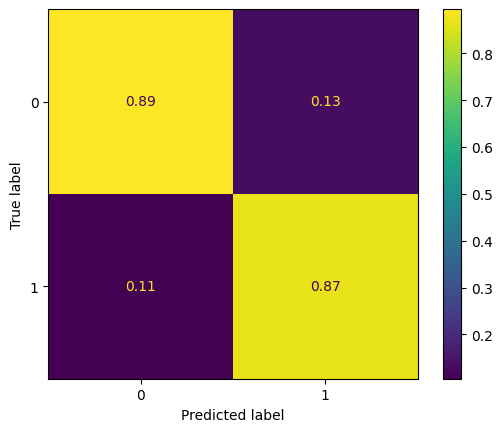

749/749 [==============================] - 2s 2ms/step
0.865
0.135
Cell: ['A160119#001'] - 0
0.823
0.177
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.246
0.754
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.081
0.919
Cell: ['A160426#021'] - 1
0.16
0.839
Cell: ['A160426#080'] - 1
0.211
0.789
Cell: ['A160427#022'] - 1
0.347
0.653
Cell: ['A160427#035'] - 1
0.014
0.986
Cell: ['A160427#037'] - 1
0.217
0.784
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.097
0.903
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.067
0.933
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.484
0.516
Cell: ['A160427#075'] - 1
0.303
0.696
Cell: ['A160427#084'] - 1
0.814
0.186
Cell

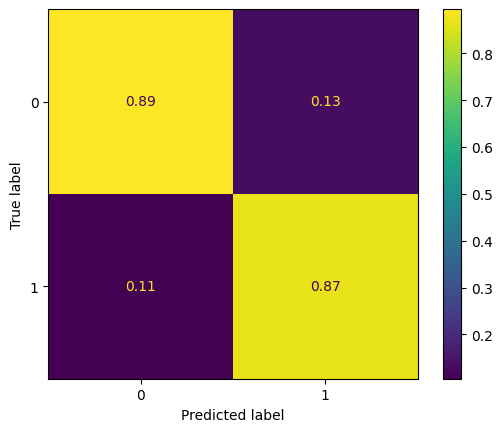

749/749 [==============================] - 2s 2ms/step
0.766
0.234
Cell: ['A160119#001'] - 0
0.841
0.159
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.381
0.619
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.005
Cell: ['A160205#051'] - 0
0.074
0.926
Cell: ['A160426#021'] - 1
0.04
0.96
Cell: ['A160426#080'] - 1
0.087
0.913
Cell: ['A160427#022'] - 1
0.452
0.548
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.042
0.958
Cell: ['A160427#039'] - 1
0.023
0.977
Cell: ['A160427#041'] - 1
0.1
0.9
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.054
0.945
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.392
0.608
Cell: ['A160427#075'] - 1
0.29
0.71
Cell: ['A160427#084'] - 1
0.678
0.322
Cell: ['A160427#094

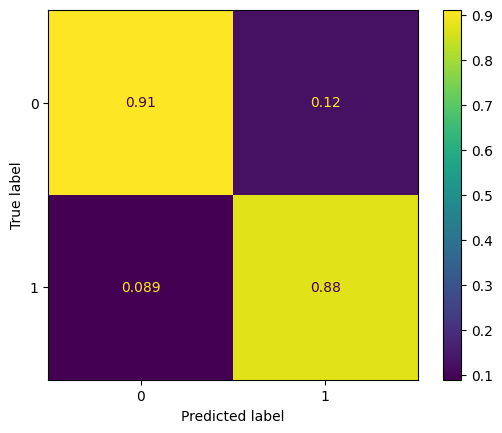

749/749 [==============================] - 2s 2ms/step
0.74
0.26
Cell: ['A160119#001'] - 0
0.852
0.148
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.384
0.615
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.077
0.923
Cell: ['A160426#021'] - 1
0.037
0.963
Cell: ['A160426#080'] - 1
0.089
0.911
Cell: ['A160427#022'] - 1
0.502
0.498
Cell: ['A160427#035'] - 0
0.002
0.998
Cell: ['A160427#037'] - 1
0.036
0.964
Cell: ['A160427#039'] - 1
0.031
0.969
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.058
0.943
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.372
0.628
Cell: ['A160427#075'] - 1
0.245
0.755
Cell: ['A160427#084'] - 1
0.658
0.342
Cell:

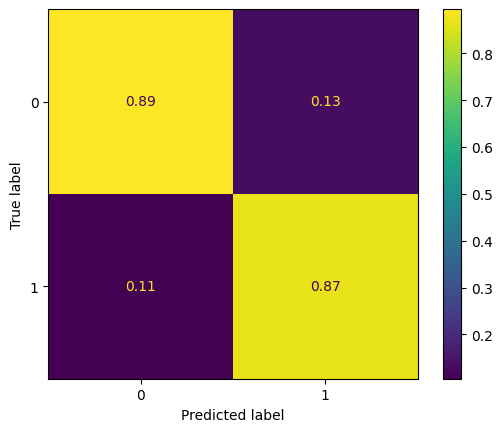

749/749 [==============================] - 2s 2ms/step
0.786
0.214
Cell: ['A160119#001'] - 0
0.741
0.259
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.38
0.62
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.06
0.939
Cell: ['A160426#021'] - 1
0.041
0.959
Cell: ['A160426#080'] - 1
0.073
0.927
Cell: ['A160427#022'] - 1
0.309
0.691
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.077
0.923
Cell: ['A160427#039'] - 1
0.019
0.98
Cell: ['A160427#041'] - 1
0.083
0.917
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.017
0.982
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.393
0.607
Cell: ['A160427#075'] - 1
0.233
0.767
Cell: ['A160427#084'] - 1
0.75
0.25
Cell: ['A16

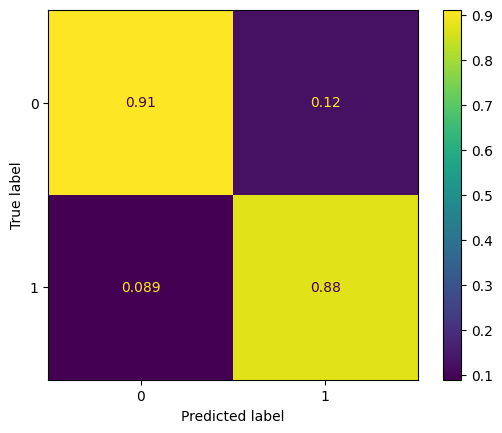

749/749 [==============================] - 2s 2ms/step
0.82
0.18
Cell: ['A160119#001'] - 0
0.736
0.264
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.396
0.604
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.063
0.937
Cell: ['A160426#021'] - 1
0.037
0.963
Cell: ['A160426#080'] - 1
0.079
0.92
Cell: ['A160427#022'] - 1
0.311
0.689
Cell: ['A160427#035'] - 1
0.001
0.999
Cell: ['A160427#037'] - 1
0.081
0.919
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.104
0.897
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.033
0.967
Cell: ['A160427#055'] - 1
0.011
0.989
Cell: ['A160427#073'] - 1
0.421
0.579
Cell: ['A160427#075'] - 1
0.298
0.702
Cell: ['A160427#084'] - 1
0.767
0.233
Cell: 

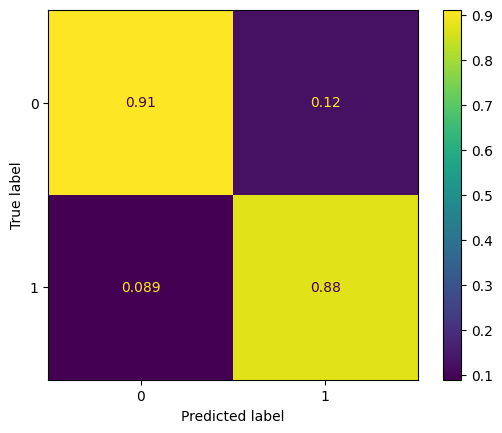

749/749 [==============================] - 2s 2ms/step
0.854
0.146
Cell: ['A160119#001'] - 0
0.724
0.276
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.358
0.642
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.036
0.963
Cell: ['A160426#021'] - 1
0.014
0.986
Cell: ['A160426#080'] - 1
0.038
0.962
Cell: ['A160427#022'] - 1
0.362
0.638
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.067
0.933
Cell: ['A160427#039'] - 1
0.034
0.966
Cell: ['A160427#041'] - 1
0.079
0.921
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.018
0.982
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.35
0.65
Cell: ['A160427#075'] - 1
0.078
0.921
Cell: ['A160427#084'] - 1
0.661
0.3

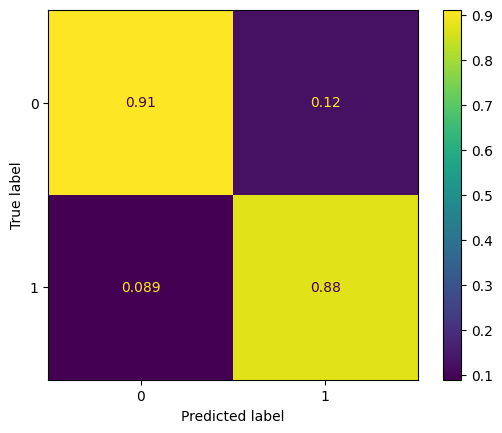

749/749 [==============================] - 2s 2ms/step
0.82
0.18
Cell: ['A160119#001'] - 0
0.747
0.253
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.378
0.622
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.028
0.971
Cell: ['A160426#021'] - 1
0.02
0.98
Cell: ['A160426#080'] - 1
0.043
0.957
Cell: ['A160427#022'] - 1
0.386
0.614
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.062
0.938
Cell: ['A160427#039'] - 1
0.023
0.977
Cell: ['A160427#041'] - 1
0.081
0.919
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.018
0.983
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.339
0.661
Cell: ['A160427#075'] - 1
0.103
0.897
Cell: ['A160427#084'] - 1
0.674
0.326

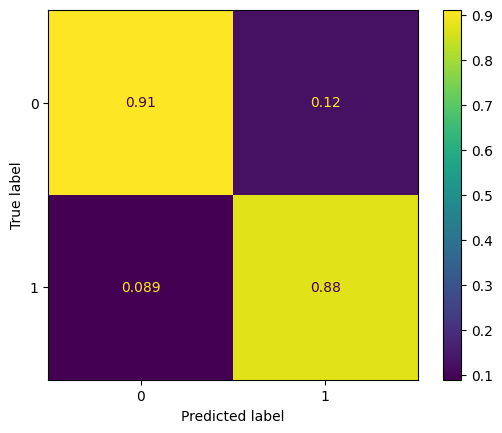

749/749 [==============================] - 2s 2ms/step
0.836
0.164
Cell: ['A160119#001'] - 0
0.818
0.182
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.387
0.613
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.09
0.91
Cell: ['A160426#021'] - 1
0.022
0.978
Cell: ['A160426#080'] - 1
0.063
0.937
Cell: ['A160427#022'] - 1
0.323
0.677
Cell: ['A160427#035'] - 1
0.002
0.998
Cell: ['A160427#037'] - 1
0.115
0.885
Cell: ['A160427#039'] - 1
0.047
0.953
Cell: ['A160427#041'] - 1
0.071
0.929
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.003
0.997
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.353
0.646
Cell: ['A160427#075'] - 1
0.063
0.937
Cell: ['A160427#084'] - 1
0.633
0.367
C

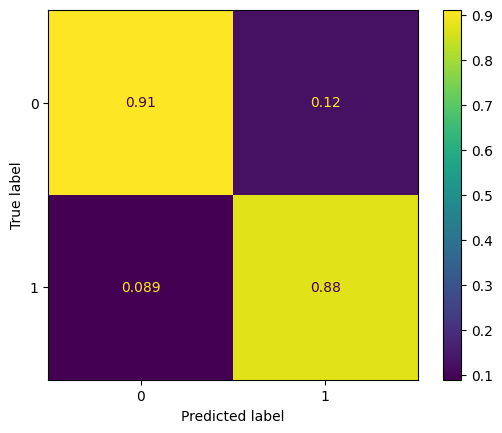

749/749 [==============================] - 2s 2ms/step
0.859
0.141
Cell: ['A160119#001'] - 0
0.813
0.187
Cell: ['A160125#009'] - 0
0.998
0.003
Cell: ['A160125#049'] - 0
0.374
0.626
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.108
0.892
Cell: ['A160426#021'] - 1
0.031
0.969
Cell: ['A160426#080'] - 1
0.055
0.945
Cell: ['A160427#022'] - 1
0.313
0.687
Cell: ['A160427#035'] - 1
0.008
0.992
Cell: ['A160427#037'] - 1
0.158
0.841
Cell: ['A160427#039'] - 1
0.061
0.939
Cell: ['A160427#041'] - 1
0.074
0.926
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.004
0.996
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.388
0.612
Cell: ['A160427#075'] - 1
0.073
0.927
Cell: ['A160427#084'] - 1
0.673
0.326

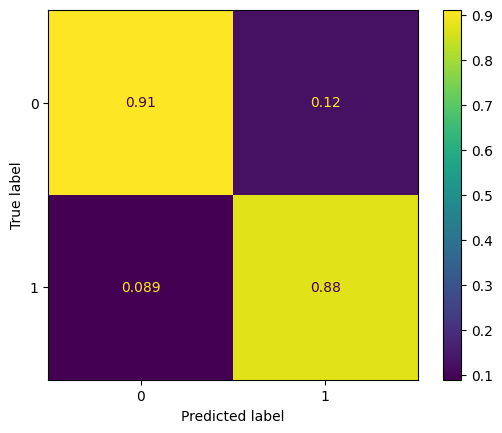

749/749 [==============================] - 2s 2ms/step
0.868
0.132
Cell: ['A160119#001'] - 0
0.79
0.21
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.373
0.627
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.998
0.002
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.048
0.952
Cell: ['A160426#021'] - 1
0.054
0.947
Cell: ['A160426#080'] - 1
0.151
0.848
Cell: ['A160427#022'] - 1
0.384
0.616
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.07
0.93
Cell: ['A160427#039'] - 1
0.082
0.918
Cell: ['A160427#041'] - 1
0.065
0.935
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.345
0.655
Cell: ['A160427#075'] - 1
0.147
0.853
Cell: ['A160427#084'] - 1
0.765
0.235
Cell: [

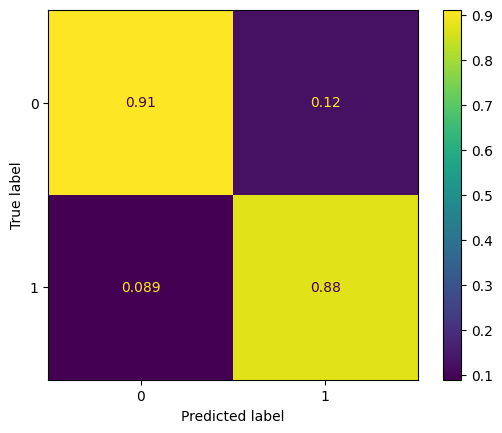

749/749 [==============================] - 2s 2ms/step
0.859
0.141
Cell: ['A160119#001'] - 0
0.799
0.201
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.345
0.655
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.042
0.959
Cell: ['A160426#021'] - 1
0.048
0.952
Cell: ['A160426#080'] - 1
0.16
0.84
Cell: ['A160427#022'] - 1
0.368
0.632
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.063
0.936
Cell: ['A160427#039'] - 1
0.093
0.907
Cell: ['A160427#041'] - 1
0.063
0.937
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.016
0.983
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.288
0.711
Cell: ['A160427#075'] - 1
0.238
0.761
Cell: ['A160427#084'] - 1
0.704
0.296
C

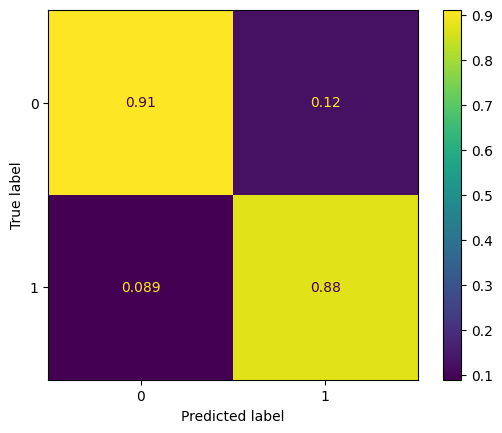

749/749 [==============================] - 2s 2ms/step
0.804
0.196
Cell: ['A160119#001'] - 0
0.673
0.327
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.409
0.591
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.058
0.942
Cell: ['A160426#021'] - 1
0.06
0.941
Cell: ['A160426#080'] - 1
0.111
0.889
Cell: ['A160427#022'] - 1
0.31
0.69
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.079
0.921
Cell: ['A160427#039'] - 1
0.05
0.949
Cell: ['A160427#041'] - 1
0.08
0.92
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.008
0.991
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.326
0.674
Cell: ['A160427#075'] - 1
0.113
0.887
Cell: ['A160427#084'] - 1
0.564
0.436
Cell: ['A16

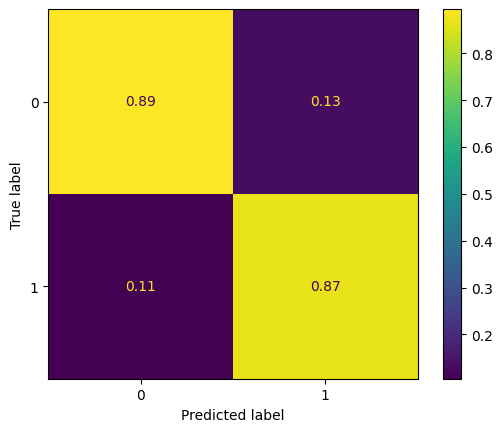

749/749 [==============================] - 2s 2ms/step
0.823
0.177
Cell: ['A160119#001'] - 0
0.709
0.291
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.417
0.583
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.058
0.942
Cell: ['A160426#021'] - 1
0.082
0.918
Cell: ['A160426#080'] - 1
0.11
0.89
Cell: ['A160427#022'] - 1
0.375
0.625
Cell: ['A160427#035'] - 1
0.007
0.993
Cell: ['A160427#037'] - 1
0.115
0.885
Cell: ['A160427#039'] - 1
0.065
0.935
Cell: ['A160427#041'] - 1
0.093
0.907
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.01
0.99
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.331
0.669
Cell: ['A160427#075'] - 1
0.125
0.875
Cell: ['A160427#084'] - 1
0.571
0.429
Cell: ['A

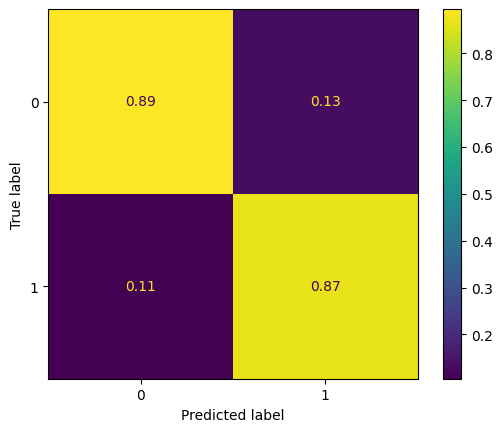

749/749 [==============================] - 2s 2ms/step
0.81
0.19
Cell: ['A160119#001'] - 0
0.706
0.294
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.347
0.653
Cell: ['A160125#087'] - 1
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.044
0.956
Cell: ['A160426#021'] - 1
0.024
0.976
Cell: ['A160426#080'] - 1
0.079
0.921
Cell: ['A160427#022'] - 1
0.327
0.673
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.114
0.886
Cell: ['A160427#039'] - 1
0.173
0.827
Cell: ['A160427#041'] - 1
0.085
0.915
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.371
0.629
Cell: ['A160427#075'] - 1
0.062
0.938
Cell: ['A160427#084'] - 1
0.61
0.39

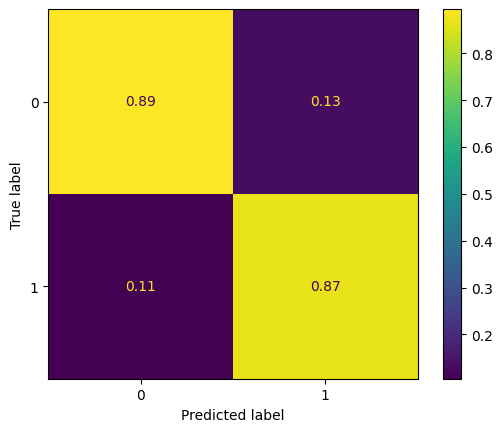

749/749 [==============================] - 2s 2ms/step
0.81
0.19
Cell: ['A160119#001'] - 0
0.677
0.323
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.34
0.66
Cell: ['A160125#087'] - 1
0.988
0.012
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.997
0.003
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.05
0.95
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.058
0.942
Cell: ['A160427#022'] - 1
0.305
0.695
Cell: ['A160427#035'] - 1
0.01
0.99
Cell: ['A160427#037'] - 1
0.122
0.878
Cell: ['A160427#039'] - 1
0.183
0.817
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.017
0.983
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.392
0.608
Cell: ['A160427#075'] - 1
0.066
0.933
Cell: ['A160427#084'] - 1
0.644
0.354
Cel

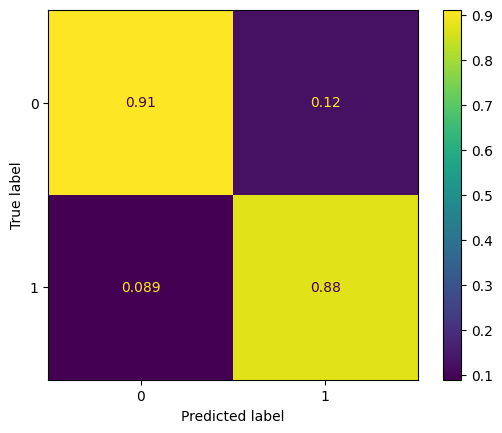

749/749 [==============================] - 2s 2ms/step
0.832
0.168
Cell: ['A160119#001'] - 0
0.772
0.228
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.333
0.667
Cell: ['A160125#087'] - 1
0.986
0.014
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.997
0.004
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.094
0.906
Cell: ['A160426#021'] - 1
0.032
0.968
Cell: ['A160426#080'] - 1
0.108
0.892
Cell: ['A160427#022'] - 1
0.333
0.666
Cell: ['A160427#035'] - 1
0.033
0.967
Cell: ['A160427#037'] - 1
0.177
0.824
Cell: ['A160427#039'] - 1
0.062
0.938
Cell: ['A160427#041'] - 1
0.119
0.881
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.016
0.984
Cell: ['A160427#055'] - 1
0.043
0.957
Cell: ['A160427#073'] - 1
0.359
0.641
Cell: ['A160427#075'] - 1
0.086
0.914
Cell: ['A160427#084'] - 1
0.715
0.285

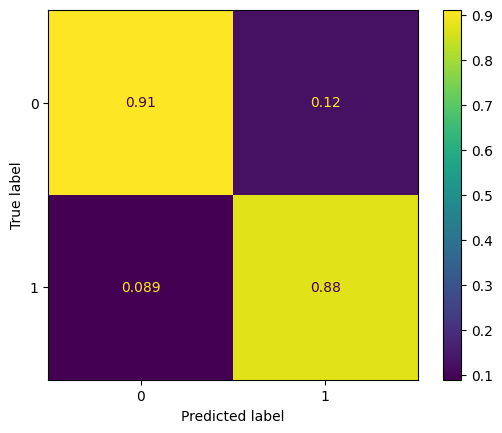

749/749 [==============================] - 2s 2ms/step
0.821
0.18
Cell: ['A160119#001'] - 0
0.792
0.208
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.35
0.652
Cell: ['A160125#087'] - 1
0.989
0.011
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.102
0.898
Cell: ['A160426#021'] - 1
0.03
0.97
Cell: ['A160426#080'] - 1
0.1
0.9
Cell: ['A160427#022'] - 1
0.325
0.675
Cell: ['A160427#035'] - 1
0.038
0.963
Cell: ['A160427#037'] - 1
0.176
0.824
Cell: ['A160427#039'] - 1
0.061
0.939
Cell: ['A160427#041'] - 1
0.127
0.874
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.017
0.983
Cell: ['A160427#055'] - 1
0.05
0.95
Cell: ['A160427#073'] - 1
0.427
0.574
Cell: ['A160427#075'] - 1
0.064
0.937
Cell: ['A160427#084'] - 1
0.793
0.208
Cell: ['A16

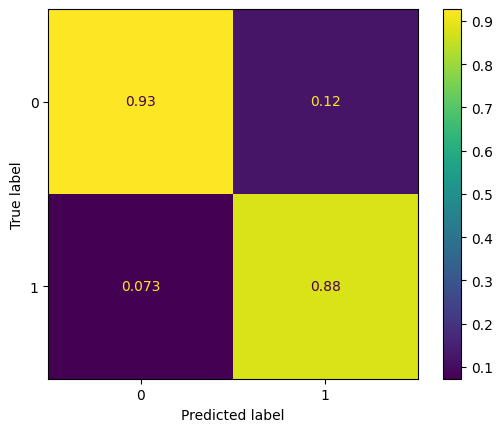

749/749 [==============================] - 2s 2ms/step
0.818
0.182
Cell: ['A160119#001'] - 0
0.856
0.144
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.416
0.583
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.067
0.933
Cell: ['A160426#021'] - 1
0.055
0.945
Cell: ['A160426#080'] - 1
0.16
0.84
Cell: ['A160427#022'] - 1
0.383
0.616
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.077
0.923
Cell: ['A160427#039'] - 1
0.149
0.851
Cell: ['A160427#041'] - 1
0.09
0.91
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.089
0.91
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.382
0.618
Cell: ['A160427#075'] - 1
0.206
0.795
Cell: ['A160427#084'] - 1
0.702
0.297
Cell: ['A160

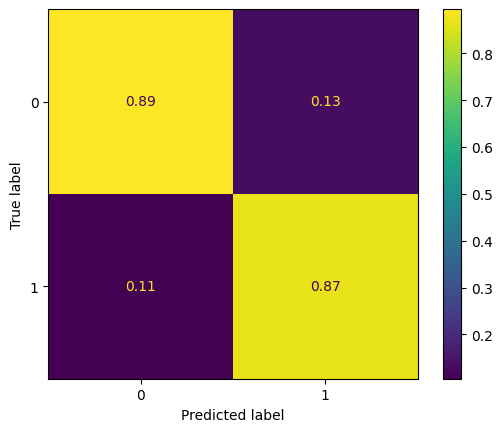

749/749 [==============================] - 2s 2ms/step
0.798
0.201
Cell: ['A160119#001'] - 0
0.826
0.174
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.35
0.65
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.059
0.94
Cell: ['A160426#021'] - 1
0.06
0.94
Cell: ['A160426#080'] - 1
0.151
0.848
Cell: ['A160427#022'] - 1
0.361
0.639
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.086
0.914
Cell: ['A160427#039'] - 1
0.16
0.84
Cell: ['A160427#041'] - 1
0.098
0.902
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.091
0.909
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.378
0.622
Cell: ['A160427#075'] - 1
0.208
0.792
Cell: ['A160427#084'] - 1
0.701
0.299
Cell: ['A1

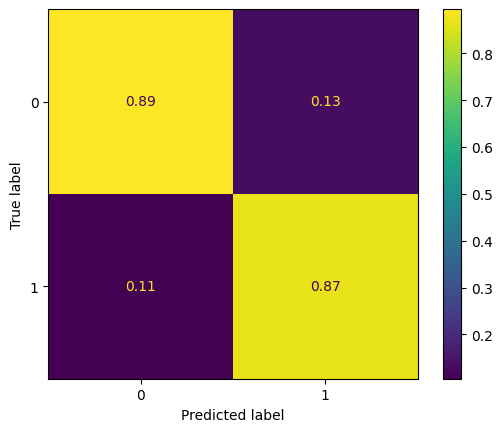

749/749 [==============================] - 2s 2ms/step
0.795
0.204
Cell: ['A160119#001'] - 0
0.883
0.118
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.378
0.623
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.11
0.89
Cell: ['A160426#021'] - 1
0.106
0.894
Cell: ['A160426#080'] - 1
0.189
0.811
Cell: ['A160427#022'] - 1
0.383
0.617
Cell: ['A160427#035'] - 1
0.015
0.985
Cell: ['A160427#037'] - 1
0.126
0.874
Cell: ['A160427#039'] - 1
0.109
0.892
Cell: ['A160427#041'] - 1
0.099
0.901
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.315
0.685
Cell: ['A160427#075'] - 1
0.117
0.883
Cell: ['A160427#084'] - 1
0.687
0.312
Cell: ['A

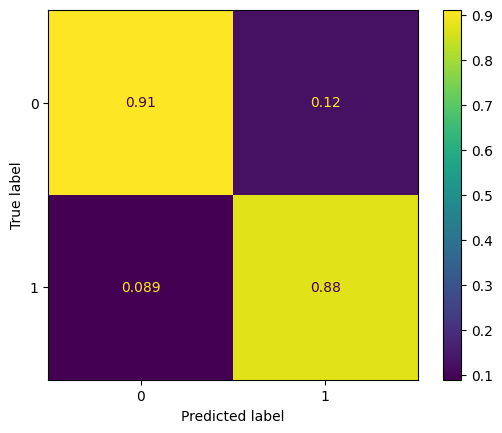

749/749 [==============================] - 2s 2ms/step
0.776
0.224
Cell: ['A160119#001'] - 0
0.859
0.141
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.363
0.637
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.107
0.893
Cell: ['A160426#021'] - 1
0.062
0.938
Cell: ['A160426#080'] - 1
0.142
0.858
Cell: ['A160427#022'] - 1
0.363
0.637
Cell: ['A160427#035'] - 1
0.008
0.992
Cell: ['A160427#037'] - 1
0.085
0.915
Cell: ['A160427#039'] - 1
0.108
0.891
Cell: ['A160427#041'] - 1
0.075
0.925
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.023
0.977
Cell: ['A160427#055'] - 1
0.01
0.99
Cell: ['A160427#073'] - 1
0.311
0.689
Cell: ['A160427#075'] - 1
0.097
0.903
Cell: ['A160427#084'] - 1
0.691
0.309
Cell: ['A

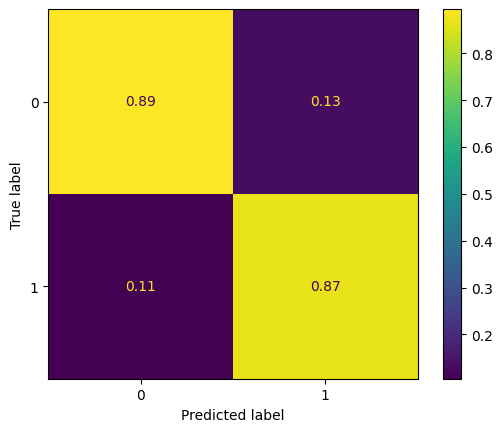

749/749 [==============================] - 2s 2ms/step
0.81
0.191
Cell: ['A160119#001'] - 0
0.788
0.212
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.381
0.619
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.989
0.011
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.11
0.891
Cell: ['A160426#021'] - 1
0.067
0.933
Cell: ['A160426#080'] - 1
0.108
0.892
Cell: ['A160427#022'] - 1
0.426
0.574
Cell: ['A160427#035'] - 1
0.017
0.983
Cell: ['A160427#037'] - 1
0.084
0.915
Cell: ['A160427#039'] - 1
0.101
0.9
Cell: ['A160427#041'] - 1
0.113
0.887
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.01
0.991
Cell: ['A160427#055'] - 1
0.015
0.985
Cell: ['A160427#073'] - 1
0.422
0.578
Cell: ['A160427#075'] - 1
0.05
0.95
Cell: ['A160427#084'] - 1
0.806
0.194
Cell: ['A1

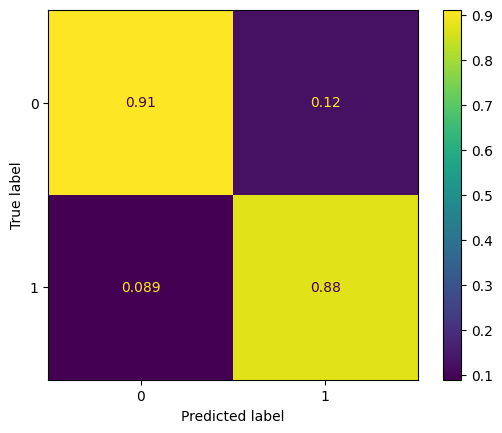

749/749 [==============================] - 2s 2ms/step
0.812
0.188
Cell: ['A160119#001'] - 0
0.768
0.232
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.372
0.628
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.986
0.015
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.099
0.901
Cell: ['A160426#021'] - 1
0.075
0.924
Cell: ['A160426#080'] - 1
0.11
0.89
Cell: ['A160427#022'] - 1
0.375
0.625
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.068
0.931
Cell: ['A160427#039'] - 1
0.105
0.895
Cell: ['A160427#041'] - 1
0.105
0.895
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.013
0.987
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.43
0.57
Cell: ['A160427#075'] - 1
0.038
0.962
Cell: ['A160427#084'] - 1
0.814
0.186
Cell: ['A16

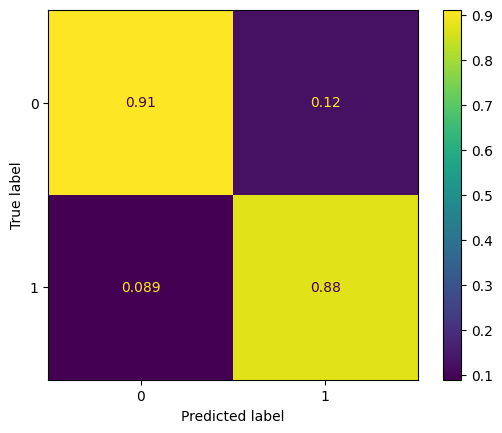

749/749 [==============================] - 2s 2ms/step
0.745
0.255
Cell: ['A160119#001'] - 0
0.81
0.19
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.425
0.575
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.002
Cell: ['A160205#051'] - 0
0.076
0.924
Cell: ['A160426#021'] - 1
0.05
0.95
Cell: ['A160426#080'] - 1
0.092
0.908
Cell: ['A160427#022'] - 1
0.366
0.634
Cell: ['A160427#035'] - 1
0.036
0.965
Cell: ['A160427#037'] - 1
0.165
0.835
Cell: ['A160427#039'] - 1
0.155
0.845
Cell: ['A160427#041'] - 1
0.088
0.912
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.013
0.987
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.26
0.74
Cell: ['A160427#075'] - 1
0.094
0.904
Cell: ['A160427#084'] - 1
0.541
0.459
Cell: ['A1604

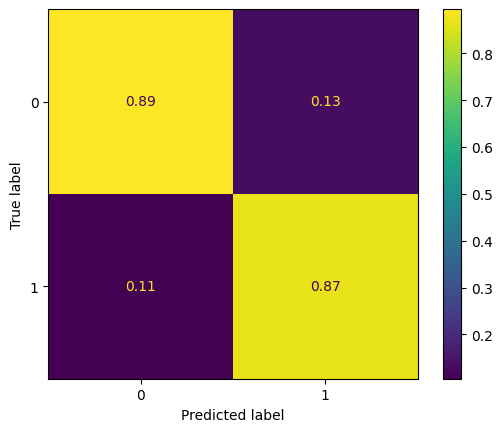

749/749 [==============================] - 2s 2ms/step
0.742
0.257
Cell: ['A160119#001'] - 0
0.819
0.181
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.399
0.601
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.001
Cell: ['A160205#051'] - 0
0.075
0.925
Cell: ['A160426#021'] - 1
0.056
0.944
Cell: ['A160426#080'] - 1
0.087
0.913
Cell: ['A160427#022'] - 1
0.321
0.679
Cell: ['A160427#035'] - 1
0.041
0.959
Cell: ['A160427#037'] - 1
0.158
0.841
Cell: ['A160427#039'] - 1
0.158
0.842
Cell: ['A160427#041'] - 1
0.075
0.925
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.007
0.993
Cell: ['A160427#055'] - 1
0.014
0.986
Cell: ['A160427#073'] - 1
0.234
0.766
Cell: ['A160427#075'] - 1
0.105
0.895
Cell: ['A160427#084'] - 1
0.5
0.5
Cell: [

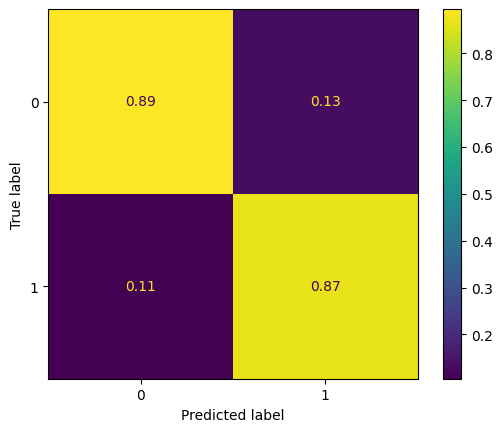

749/749 [==============================] - 2s 2ms/step
0.874
0.126
Cell: ['A160119#001'] - 0
0.865
0.135
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.444
0.555
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.983
0.017
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.13
0.87
Cell: ['A160426#021'] - 1
0.031
0.969
Cell: ['A160426#080'] - 1
0.096
0.904
Cell: ['A160427#022'] - 1
0.44
0.56
Cell: ['A160427#035'] - 1
0.015
0.985
Cell: ['A160427#037'] - 1
0.065
0.935
Cell: ['A160427#039'] - 1
0.109
0.891
Cell: ['A160427#041'] - 1
0.144
0.855
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.022
0.978
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.347
0.654
Cell: ['A160427#075'] - 1
0.084
0.916
Cell: ['A160427#084'] - 1
0.689
0.312
Cell: [

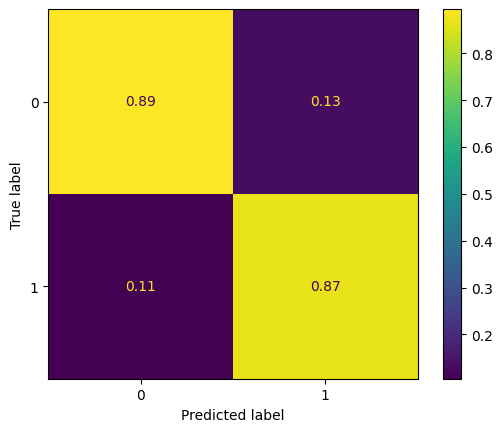

749/749 [==============================] - 2s 2ms/step
0.858
0.142
Cell: ['A160119#001'] - 0
0.874
0.126
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.453
0.547
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.977
0.023
Cell: ['A160129#038'] - 0
0.999
0.001
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.13
0.87
Cell: ['A160426#021'] - 1
0.021
0.979
Cell: ['A160426#080'] - 1
0.104
0.896
Cell: ['A160427#022'] - 1
0.431
0.57
Cell: ['A160427#035'] - 1
0.021
0.979
Cell: ['A160427#037'] - 1
0.048
0.952
Cell: ['A160427#039'] - 1
0.128
0.872
Cell: ['A160427#041'] - 1
0.155
0.845
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.025
0.975
Cell: ['A160427#055'] - 1
0.011
0.989
Cell: ['A160427#073'] - 1
0.293
0.707
Cell: ['A160427#075'] - 1
0.067
0.933
Cell: ['A160427#084'] - 1
0.632
0.368
Ce

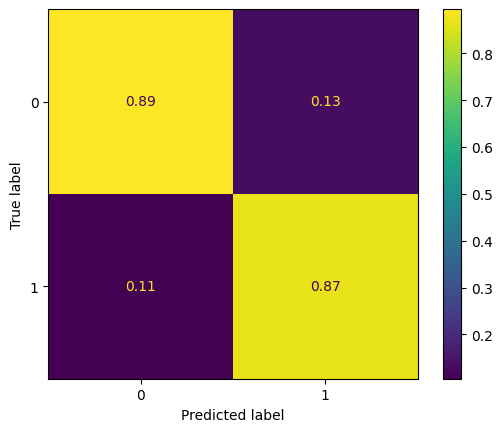

749/749 [==============================] - 2s 2ms/step
0.808
0.192
Cell: ['A160119#001'] - 0
0.789
0.211
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.456
0.544
Cell: ['A160125#087'] - 1
0.999
0.001
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.003
Cell: ['A160205#051'] - 0
0.073
0.927
Cell: ['A160426#021'] - 1
0.056
0.944
Cell: ['A160426#080'] - 1
0.13
0.87
Cell: ['A160427#022'] - 1
0.414
0.586
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.064
0.935
Cell: ['A160427#039'] - 1
0.046
0.954
Cell: ['A160427#041'] - 1
0.124
0.876
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.013
0.986
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.287
0.713
Cell: ['A160427#075'] - 1
0.142
0.858
Cell: ['A160427#084'] - 1
0.55
0.45
Cell: ['A160427

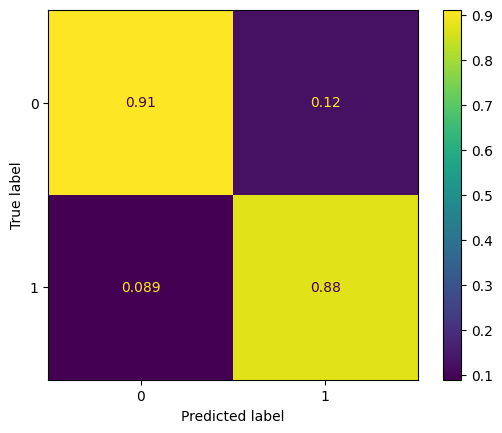

749/749 [==============================] - 2s 2ms/step
0.833
0.167
Cell: ['A160119#001'] - 0
0.797
0.204
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.485
0.515
Cell: ['A160125#087'] - 1
0.998
0.002
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.075
0.925
Cell: ['A160426#021'] - 1
0.038
0.962
Cell: ['A160426#080'] - 1
0.123
0.877
Cell: ['A160427#022'] - 1
0.407
0.592
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.077
0.923
Cell: ['A160427#039'] - 1
0.06
0.94
Cell: ['A160427#041'] - 1
0.133
0.867
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.014
0.986
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.343
0.657
Cell: ['A160427#075'] - 1
0.141
0.86
Cell: ['A160427#084'] - 1
0.609
0.39
Cell: ['A160427

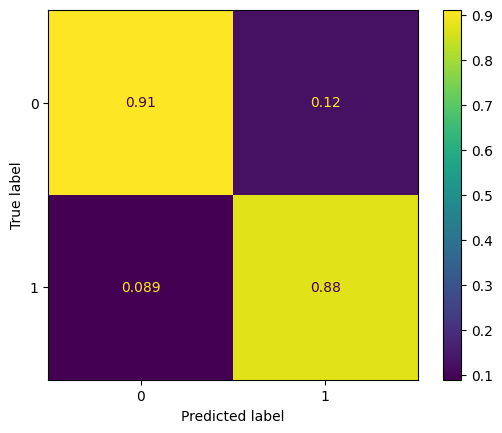

749/749 [==============================] - 2s 2ms/step
0.751
0.249
Cell: ['A160119#001'] - 0
0.854
0.146
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.369
0.631
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.064
0.936
Cell: ['A160426#021'] - 1
0.043
0.957
Cell: ['A160426#080'] - 1
0.032
0.968
Cell: ['A160427#022'] - 1
0.497
0.502
Cell: ['A160427#035'] - 1
0.005
0.995
Cell: ['A160427#037'] - 1
0.072
0.927
Cell: ['A160427#039'] - 1
0.042
0.958
Cell: ['A160427#041'] - 1
0.067
0.933
Cell: ['A160427#047'] - 1
0.998
0.002
Cell: ['A160427#049'] - 0
0.005
0.994
Cell: ['A160427#055'] - 1
0.006
0.994
Cell: ['A160427#073'] - 1
0.28
0.72
Cell: ['A160427#075'] - 1
0.097
0.904
Cell: ['A160427#084'] - 1
0.502
0.498
Cell:

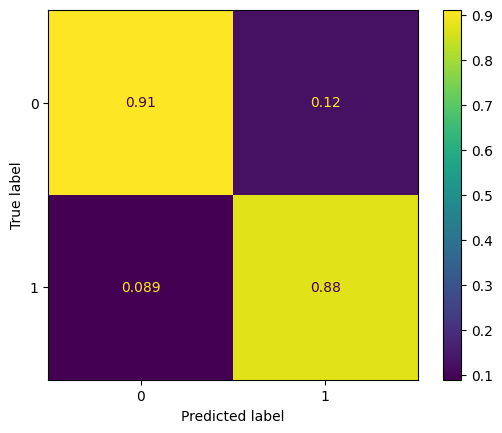

749/749 [==============================] - 2s 2ms/step
0.811
0.188
Cell: ['A160119#001'] - 0
0.871
0.129
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.363
0.637
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.104
0.896
Cell: ['A160426#021'] - 1
0.099
0.901
Cell: ['A160426#080'] - 1
0.04
0.96
Cell: ['A160427#022'] - 1
0.516
0.484
Cell: ['A160427#035'] - 0
0.006
0.994
Cell: ['A160427#037'] - 1
0.079
0.921
Cell: ['A160427#039'] - 1
0.047
0.953
Cell: ['A160427#041'] - 1
0.079
0.921
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.013
0.987
Cell: ['A160427#073'] - 1
0.332
0.668
Cell: ['A160427#075'] - 1
0.119
0.881
Cell: ['A160427#084'] - 1
0.586
0.414
Cell: ['A

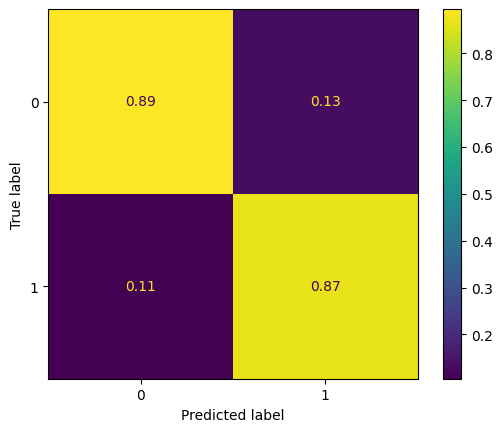

749/749 [==============================] - 2s 2ms/step
0.882
0.118
Cell: ['A160119#001'] - 0
0.792
0.208
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.287
0.713
Cell: ['A160125#087'] - 1
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.996
0.004
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.075
0.924
Cell: ['A160426#021'] - 1
0.086
0.913
Cell: ['A160426#080'] - 1
0.094
0.906
Cell: ['A160427#022'] - 1
0.473
0.527
Cell: ['A160427#035'] - 1
0.015
0.985
Cell: ['A160427#037'] - 1
0.169
0.83
Cell: ['A160427#039'] - 1
0.052
0.948
Cell: ['A160427#041'] - 1
0.078
0.922
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.981
Cell: ['A160427#055'] - 1
0.006
0.994
Cell: ['A160427#073'] - 1
0.35
0.649
Cell: ['A160427#075'] - 1
0.202
0.799
Cell: ['A160427#084'] - 1
0.631
0.368
Cell:

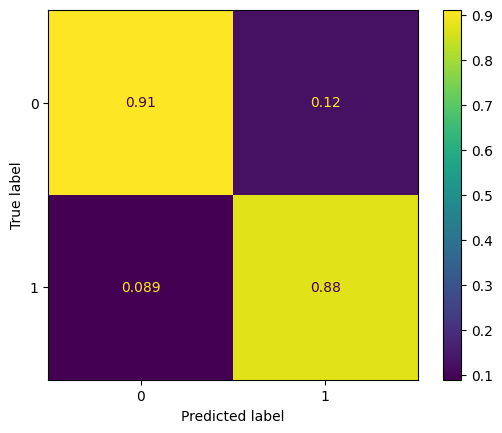

749/749 [==============================] - 2s 2ms/step
0.864
0.137
Cell: ['A160119#001'] - 0
0.784
0.216
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.281
0.719
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.081
0.92
Cell: ['A160426#021'] - 1
0.082
0.917
Cell: ['A160426#080'] - 1
0.112
0.888
Cell: ['A160427#022'] - 1
0.446
0.555
Cell: ['A160427#035'] - 1
0.007
0.993
Cell: ['A160427#037'] - 1
0.138
0.862
Cell: ['A160427#039'] - 1
0.04
0.96
Cell: ['A160427#041'] - 1
0.072
0.928
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.013
0.987
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.347
0.653
Cell: ['A160427#075'] - 1
0.269
0.731
Cell: ['A160427#084'] - 1
0.634
0.367
Cell: ['A1

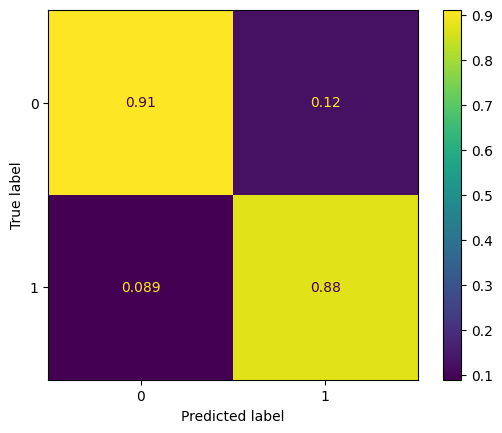

749/749 [==============================] - 2s 2ms/step
0.78
0.221
Cell: ['A160119#001'] - 0
0.867
0.134
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.405
0.596
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
0.998
0.002
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.003
Cell: ['A160205#051'] - 0
0.057
0.943
Cell: ['A160426#021'] - 1
0.067
0.933
Cell: ['A160426#080'] - 1
0.101
0.899
Cell: ['A160427#022'] - 1
0.377
0.623
Cell: ['A160427#035'] - 1
0.017
0.983
Cell: ['A160427#037'] - 1
0.095
0.905
Cell: ['A160427#039'] - 1
0.03
0.97
Cell: ['A160427#041'] - 1
0.084
0.916
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.006
0.994
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.339
0.661
Cell: ['A160427#075'] - 1
0.163
0.837
Cell: ['A160427#084'] - 1
0.614
0.386
Cell: 

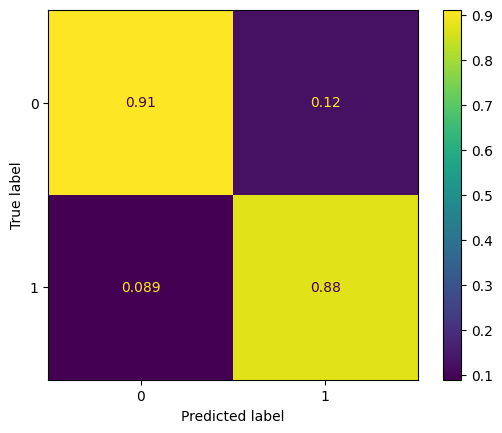

749/749 [==============================] - 2s 2ms/step
0.77
0.23
Cell: ['A160119#001'] - 0
0.848
0.152
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.376
0.625
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.071
0.929
Cell: ['A160426#021'] - 1
0.061
0.94
Cell: ['A160426#080'] - 1
0.108
0.892
Cell: ['A160427#022'] - 1
0.415
0.585
Cell: ['A160427#035'] - 1
0.011
0.989
Cell: ['A160427#037'] - 1
0.09
0.91
Cell: ['A160427#039'] - 1
0.038
0.963
Cell: ['A160427#041'] - 1
0.099
0.901
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.358
0.642
Cell: ['A160427#075'] - 1
0.21
0.791
Cell: ['A160427#084'] - 1
0.64
0.36
Cell: ['A160427

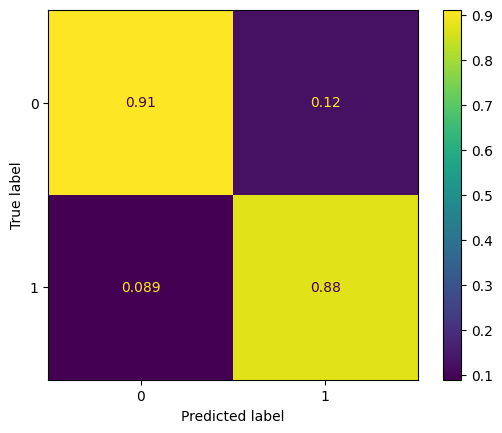

749/749 [==============================] - 2s 2ms/step
0.824
0.176
Cell: ['A160119#001'] - 0
0.861
0.139
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.401
0.599
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
1.0
0.001
Cell: ['A160205#051'] - 0
0.136
0.864
Cell: ['A160426#021'] - 1
0.049
0.951
Cell: ['A160426#080'] - 1
0.129
0.871
Cell: ['A160427#022'] - 1
0.413
0.587
Cell: ['A160427#035'] - 1
0.044
0.957
Cell: ['A160427#037'] - 1
0.156
0.846
Cell: ['A160427#039'] - 1
0.098
0.902
Cell: ['A160427#041'] - 1
0.083
0.917
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.013
0.986
Cell: ['A160427#055'] - 1
0.02
0.98
Cell: ['A160427#073'] - 1
0.372
0.629
Cell: ['A160427#075'] - 1
0.07
0.929
Cell: ['A160427#084'] - 1
0.732
0.269
Cell: ['A16042

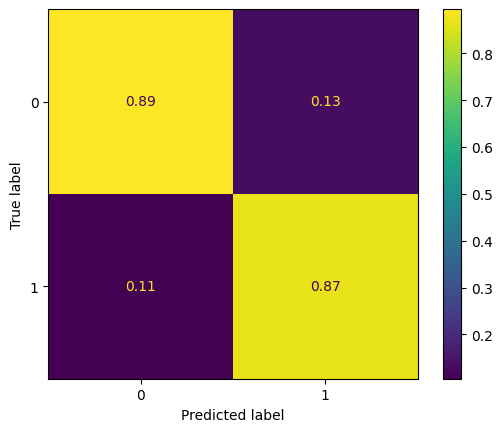

749/749 [==============================] - 2s 2ms/step
0.821
0.179
Cell: ['A160119#001'] - 0
0.869
0.131
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.338
0.662
Cell: ['A160125#087'] - 1
0.993
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.116
0.884
Cell: ['A160426#021'] - 1
0.038
0.962
Cell: ['A160426#080'] - 1
0.107
0.893
Cell: ['A160427#022'] - 1
0.417
0.583
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.115
0.885
Cell: ['A160427#039'] - 1
0.093
0.907
Cell: ['A160427#041'] - 1
0.073
0.926
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.274
0.726
Cell: ['A160427#075'] - 1
0.077
0.923
Cell: ['A160427#084'] - 1
0.642
0.359
Cell: ['A

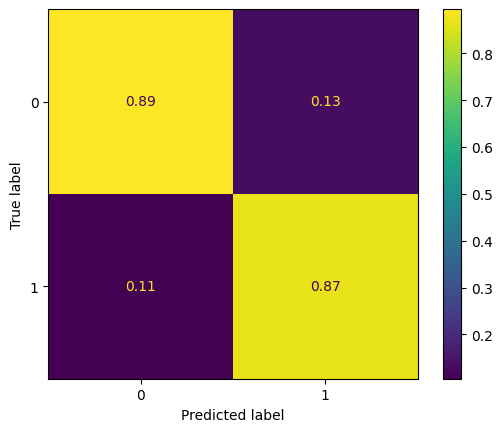

749/749 [==============================] - 2s 2ms/step
0.828
0.171
Cell: ['A160119#001'] - 0
0.786
0.213
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.475
0.525
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.07
0.93
Cell: ['A160426#021'] - 1
0.048
0.952
Cell: ['A160426#080'] - 1
0.143
0.857
Cell: ['A160427#022'] - 1
0.332
0.668
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.126
0.874
Cell: ['A160427#039'] - 1
0.049
0.95
Cell: ['A160427#041'] - 1
0.068
0.932
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.014
0.986
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.374
0.626
Cell: ['A160427#075'] - 1
0.11
0.89
Cell: ['A160427#084'] - 1
0.702
0.298
Cell: ['

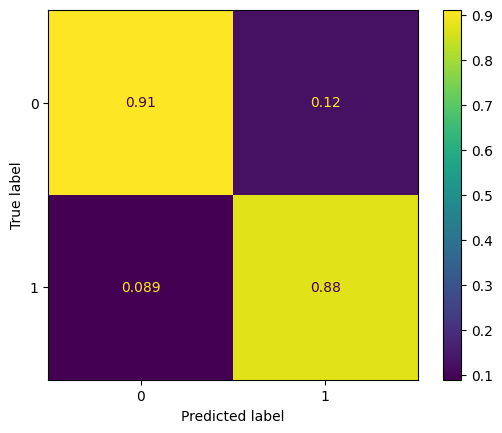

749/749 [==============================] - 2s 2ms/step
0.781
0.219
Cell: ['A160119#001'] - 0
0.75
0.25
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.428
0.572
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.002
Cell: ['A160205#051'] - 0
0.054
0.946
Cell: ['A160426#021'] - 1
0.05
0.949
Cell: ['A160426#080'] - 1
0.142
0.859
Cell: ['A160427#022'] - 1
0.3
0.7
Cell: ['A160427#035'] - 1
0.016
0.984
Cell: ['A160427#037'] - 1
0.132
0.868
Cell: ['A160427#039'] - 1
0.046
0.954
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.006
0.994
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.388
0.612
Cell: ['A160427#075'] - 1
0.089
0.911
Cell: ['A160427#084'] - 1
0.754
0.246
Cell: ['A1

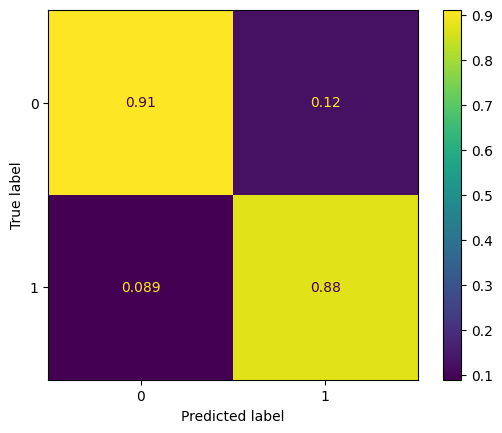

749/749 [==============================] - 2s 2ms/step
0.86
0.139
Cell: ['A160119#001'] - 0
0.736
0.263
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.317
0.683
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.059
0.941
Cell: ['A160426#021'] - 1
0.052
0.948
Cell: ['A160426#080'] - 1
0.094
0.906
Cell: ['A160427#022'] - 1
0.314
0.686
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.058
0.942
Cell: ['A160427#039'] - 1
0.067
0.933
Cell: ['A160427#041'] - 1
0.075
0.925
Cell: ['A160427#047'] - 1
0.994
0.006
Cell: ['A160427#049'] - 0
0.029
0.971
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.362
0.638
Cell: ['A160427#075'] - 1
0.29
0.711
Cell: ['A160427#084'] - 1
0.698
0.3

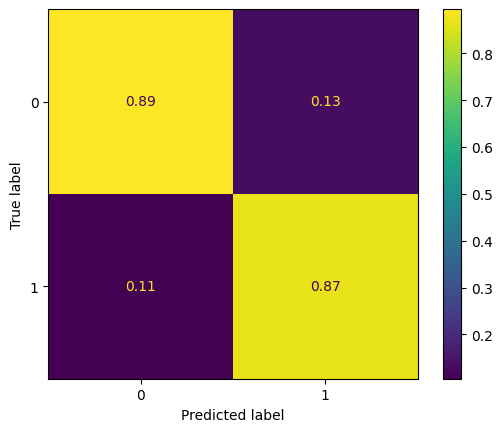

749/749 [==============================] - 2s 2ms/step
0.813
0.187
Cell: ['A160119#001'] - 0
0.727
0.273
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.282
0.718
Cell: ['A160125#087'] - 1
0.989
0.011
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.987
0.013
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.996
0.004
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.051
0.949
Cell: ['A160426#021'] - 1
0.065
0.936
Cell: ['A160426#080'] - 1
0.098
0.902
Cell: ['A160427#022'] - 1
0.328
0.672
Cell: ['A160427#035'] - 1
0.004
0.996
Cell: ['A160427#037'] - 1
0.044
0.956
Cell: ['A160427#039'] - 1
0.034
0.966
Cell: ['A160427#041'] - 1
0.072
0.928
Cell: ['A160427#047'] - 1
0.992
0.006
Cell: ['A160427#049'] - 0
0.027
0.973
Cell: ['A160427#055'] - 1
0.011
0.989
Cell: ['A160427#073'] - 1
0.352
0.648
Cell: ['A160427#075'] - 1
0.308
0.691
Cell: ['A160427#084'] - 1
0.687
0

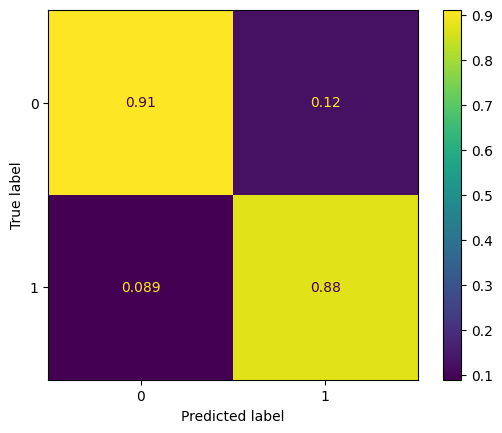

749/749 [==============================] - 2s 2ms/step
0.647
0.353
Cell: ['A160119#001'] - 0
0.883
0.117
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.384
0.616
Cell: ['A160125#087'] - 1
0.98
0.02
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.979
0.021
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.089
0.911
Cell: ['A160426#021'] - 1
0.075
0.925
Cell: ['A160426#080'] - 1
0.095
0.905
Cell: ['A160427#022'] - 1
0.405
0.594
Cell: ['A160427#035'] - 1
0.035
0.965
Cell: ['A160427#037'] - 1
0.107
0.894
Cell: ['A160427#039'] - 1
0.02
0.979
Cell: ['A160427#041'] - 1
0.083
0.917
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.032
0.968
Cell: ['A160427#055'] - 1
0.023
0.977
Cell: ['A160427#073'] - 1
0.387
0.613
Cell: ['A160427#075'] - 1
0.138
0.862
Cell: ['A160427#084'] - 1
0.655
0.346
Cell: 

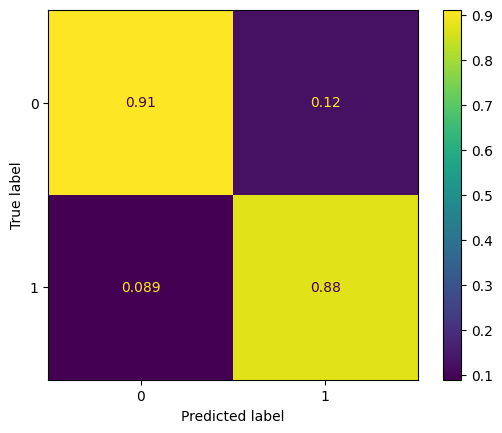

749/749 [==============================] - 2s 2ms/step
0.693
0.307
Cell: ['A160119#001'] - 0
0.881
0.119
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.361
0.639
Cell: ['A160125#087'] - 1
0.979
0.021
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.984
0.016
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.083
0.917
Cell: ['A160426#021'] - 1
0.036
0.964
Cell: ['A160426#080'] - 1
0.078
0.922
Cell: ['A160427#022'] - 1
0.442
0.558
Cell: ['A160427#035'] - 1
0.013
0.987
Cell: ['A160427#037'] - 1
0.081
0.92
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.069
0.931
Cell: ['A160427#047'] - 1
0.992
0.008
Cell: ['A160427#049'] - 0
0.013
0.987
Cell: ['A160427#055'] - 1
0.024
0.976
Cell: ['A160427#073'] - 1
0.382
0.618
Cell: ['A160427#075'] - 1
0.08
0.92
Cell: ['A160427#084'] - 1
0.659
0.341
Cell: 

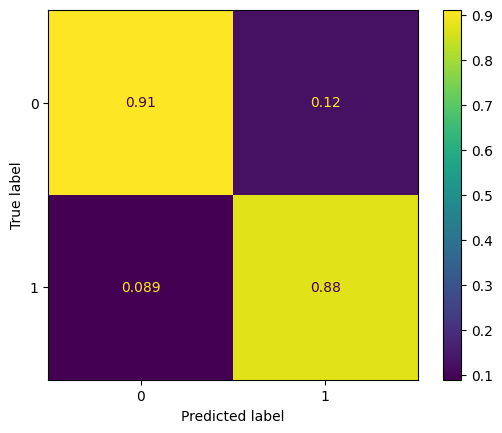

749/749 [==============================] - 2s 2ms/step
0.8
0.201
Cell: ['A160119#001'] - 0
0.87
0.13
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.35
0.65
Cell: ['A160125#087'] - 1
0.99
0.01
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.091
0.909
Cell: ['A160426#021'] - 1
0.087
0.913
Cell: ['A160426#080'] - 1
0.096
0.904
Cell: ['A160427#022'] - 1
0.499
0.501
Cell: ['A160427#035'] - 1
0.011
0.989
Cell: ['A160427#037'] - 1
0.11
0.89
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.08
0.92
Cell: ['A160427#047'] - 1
0.999
0.001
Cell: ['A160427#049'] - 0
0.012
0.988
Cell: ['A160427#055'] - 1
0.022
0.978
Cell: ['A160427#073'] - 1
0.395
0.605
Cell: ['A160427#075'] - 1
0.128
0.872
Cell: ['A160427#084'] - 1
0.725
0.276
Cell: ['A1604

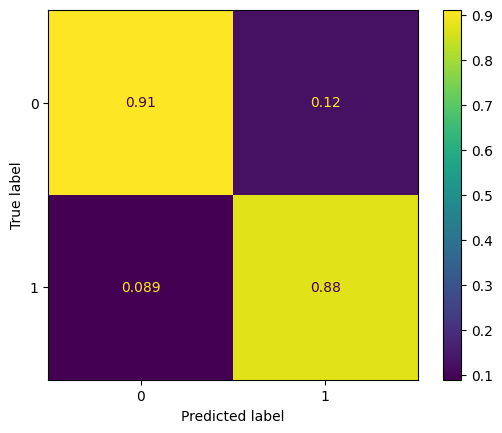

749/749 [==============================] - 2s 2ms/step
0.798
0.202
Cell: ['A160119#001'] - 0
0.865
0.135
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.335
0.666
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.081
0.919
Cell: ['A160426#021'] - 1
0.095
0.905
Cell: ['A160426#080'] - 1
0.067
0.932
Cell: ['A160427#022'] - 1
0.544
0.456
Cell: ['A160427#035'] - 0
0.014
0.986
Cell: ['A160427#037'] - 1
0.081
0.919
Cell: ['A160427#039'] - 1
0.014
0.986
Cell: ['A160427#041'] - 1
0.073
0.927
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.013
0.988
Cell: ['A160427#055'] - 1
0.016
0.984
Cell: ['A160427#073'] - 1
0.363
0.637
Cell: ['A160427#075'] - 1
0.132
0.868
Cell: ['A160427#084'] - 1
0.689
0.312

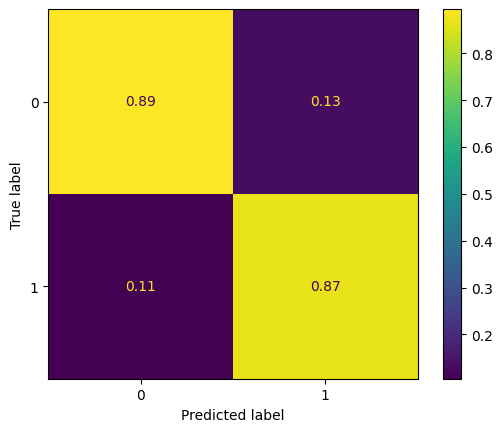

749/749 [==============================] - 2s 2ms/step
0.837
0.164
Cell: ['A160119#001'] - 0
0.836
0.165
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.487
0.514
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.98
0.019
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.088
0.912
Cell: ['A160426#021'] - 1
0.089
0.911
Cell: ['A160426#080'] - 1
0.088
0.912
Cell: ['A160427#022'] - 1
0.418
0.581
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.124
0.876
Cell: ['A160427#039'] - 1
0.03
0.97
Cell: ['A160427#041'] - 1
0.076
0.924
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.025
0.975
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.481
0.519
Cell: ['A160427#075'] - 1
0.237
0.763
Cell: ['A160427#084'] - 1
0.83
0.17
Cell: ['

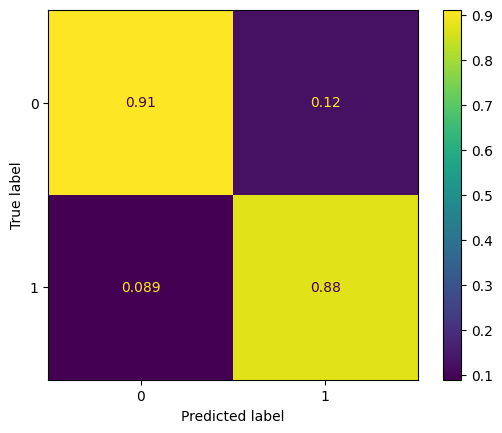

749/749 [==============================] - 2s 2ms/step
0.802
0.198
Cell: ['A160119#001'] - 0
0.806
0.194
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.422
0.578
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.977
0.023
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.066
0.934
Cell: ['A160426#021'] - 1
0.057
0.943
Cell: ['A160426#080'] - 1
0.083
0.917
Cell: ['A160427#022'] - 1
0.34
0.659
Cell: ['A160427#035'] - 1
0.003
0.997
Cell: ['A160427#037'] - 1
0.106
0.893
Cell: ['A160427#039'] - 1
0.031
0.968
Cell: ['A160427#041'] - 1
0.049
0.951
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.472
0.527
Cell: ['A160427#075'] - 1
0.216
0.785
Cell: ['A160427#084'] - 1
0.843
0.157


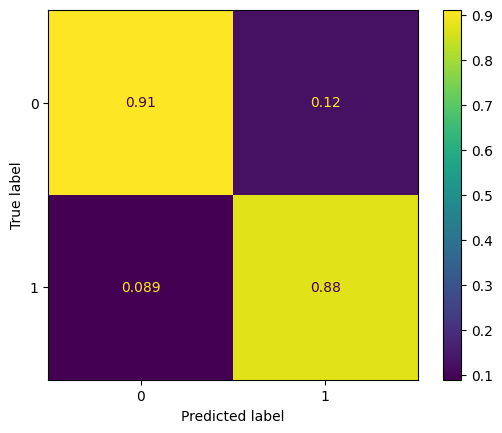

749/749 [==============================] - 2s 2ms/step
0.742
0.258
Cell: ['A160119#001'] - 0
0.803
0.197
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.353
0.647
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.047
0.953
Cell: ['A160426#021'] - 1
0.064
0.935
Cell: ['A160426#080'] - 1
0.098
0.902
Cell: ['A160427#022'] - 1
0.568
0.432
Cell: ['A160427#035'] - 0
0.005
0.995
Cell: ['A160427#037'] - 1
0.107
0.893
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.057
0.943
Cell: ['A160427#047'] - 1
0.996
0.004
Cell: ['A160427#049'] - 0
0.006
0.994
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.39
0.61
Cell: ['A160427#075'] - 1
0.155
0.845
Cell: ['A160427#084'] - 1
0.726
0.2

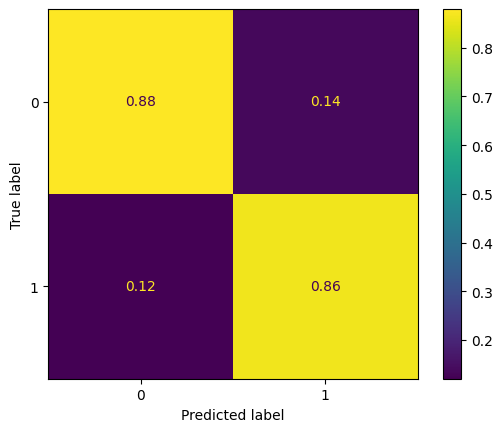

749/749 [==============================] - 2s 2ms/step
0.722
0.278
Cell: ['A160119#001'] - 0
0.795
0.205
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.338
0.662
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.047
0.953
Cell: ['A160426#021'] - 1
0.053
0.947
Cell: ['A160426#080'] - 1
0.101
0.898
Cell: ['A160427#022'] - 1
0.515
0.485
Cell: ['A160427#035'] - 0
0.003
0.997
Cell: ['A160427#037'] - 1
0.088
0.912
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.057
0.943
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.01
0.99
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.351
0.649
Cell: ['A160427#075'] - 1
0.131
0.868
Cell: ['A160427#084'] - 1
0.673
0.327
Cell:

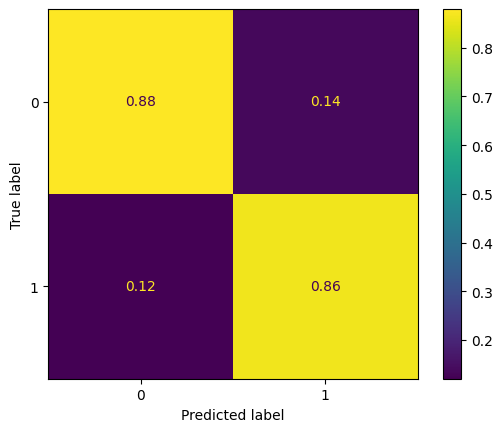

749/749 [==============================] - 2s 2ms/step
0.86
0.14
Cell: ['A160119#001'] - 0
0.841
0.159
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.443
0.557
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.995
0.005
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.987
0.013
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.046
0.954
Cell: ['A160426#021'] - 1
0.052
0.948
Cell: ['A160426#080'] - 1
0.069
0.931
Cell: ['A160427#022'] - 1
0.384
0.616
Cell: ['A160427#035'] - 1
0.005
0.995
Cell: ['A160427#037'] - 1
0.136
0.863
Cell: ['A160427#039'] - 1
0.001
0.999
Cell: ['A160427#041'] - 1
0.079
0.921
Cell: ['A160427#047'] - 1
0.999
0.001
Cell: ['A160427#049'] - 0
0.023
0.978
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.518
0.482
Cell: ['A160427#075'] - 0
0.122
0.877
Cell: ['A160427#084'] - 1
0.847
0.153
C

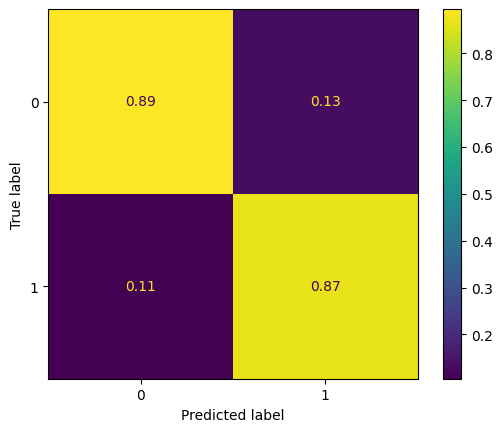

749/749 [==============================] - 2s 2ms/step
0.871
0.129
Cell: ['A160119#001'] - 0
0.856
0.144
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.453
0.548
Cell: ['A160125#087'] - 1
0.996
0.004
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.996
0.004
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.076
0.924
Cell: ['A160426#021'] - 1
0.068
0.932
Cell: ['A160426#080'] - 1
0.074
0.926
Cell: ['A160427#022'] - 1
0.431
0.57
Cell: ['A160427#035'] - 1
0.008
0.992
Cell: ['A160427#037'] - 1
0.124
0.876
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
0.999
0.001
Cell: ['A160427#049'] - 0
0.023
0.977
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.551
0.449
Cell: ['A160427#075'] - 0
0.131
0.869
Cell: ['A160427#084'] - 1
0.856
0.144


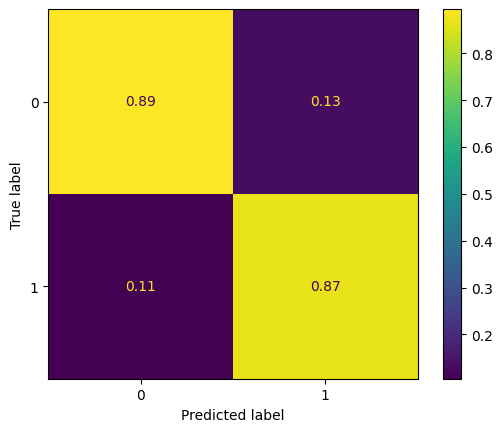

749/749 [==============================] - 2s 2ms/step
0.763
0.237
Cell: ['A160119#001'] - 0
0.779
0.221
Cell: ['A160125#009'] - 0
0.993
0.007
Cell: ['A160125#049'] - 0
0.417
0.583
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.076
0.925
Cell: ['A160426#021'] - 1
0.185
0.814
Cell: ['A160426#080'] - 1
0.143
0.857
Cell: ['A160427#022'] - 1
0.462
0.538
Cell: ['A160427#035'] - 1
0.043
0.956
Cell: ['A160427#037'] - 1
0.262
0.736
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.065
0.935
Cell: ['A160427#047'] - 1
0.992
0.008
Cell: ['A160427#049'] - 0
0.009
0.991
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.581
0.419
Cell: ['A160427#075'] - 0
0.096
0.904
Cell: ['A160427#084'] - 1
0.777
0.223

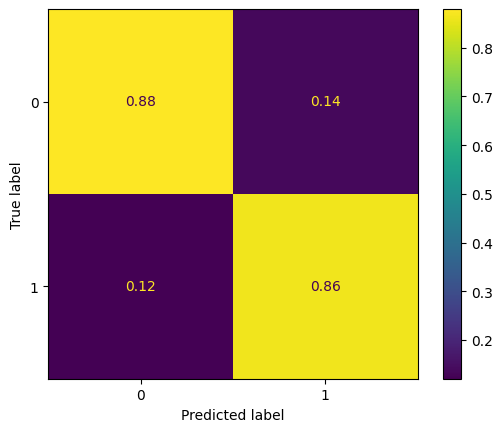

749/749 [==============================] - 2s 2ms/step
0.743
0.257
Cell: ['A160119#001'] - 0
0.726
0.274
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.361
0.639
Cell: ['A160125#087'] - 1
0.992
0.008
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
0.996
0.003
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.056
0.944
Cell: ['A160426#021'] - 1
0.184
0.816
Cell: ['A160426#080'] - 1
0.123
0.877
Cell: ['A160427#022'] - 1
0.429
0.571
Cell: ['A160427#035'] - 1
0.027
0.973
Cell: ['A160427#037'] - 1
0.273
0.727
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.057
0.943
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.019
0.982
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.536
0.464
Cell: ['A160427#075'] - 0
0.095
0.905
Cell: ['A160427#084'] - 1
0.718
0.282

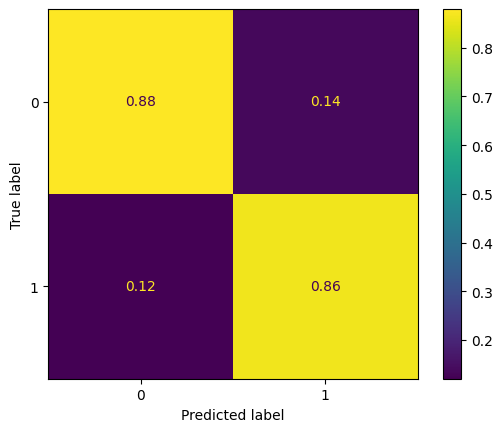

749/749 [==============================] - 2s 2ms/step
0.815
0.185
Cell: ['A160119#001'] - 0
0.786
0.214
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.476
0.524
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.994
0.006
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.989
0.011
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.992
0.008
Cell: ['A160205#051'] - 0
0.133
0.867
Cell: ['A160426#021'] - 1
0.046
0.954
Cell: ['A160426#080'] - 1
0.084
0.916
Cell: ['A160427#022'] - 1
0.478
0.523
Cell: ['A160427#035'] - 1
0.009
0.991
Cell: ['A160427#037'] - 1
0.095
0.905
Cell: ['A160427#039'] - 1
0.011
0.989
Cell: ['A160427#041'] - 1
0.118
0.882
Cell: ['A160427#047'] - 1
0.995
0.006
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.004
0.996
Cell: ['A160427#073'] - 1
0.45
0.55
Cell: ['A160427#075'] - 1
0.081
0.919
Cell: ['A160427#084'] - 1
0.661
0.3

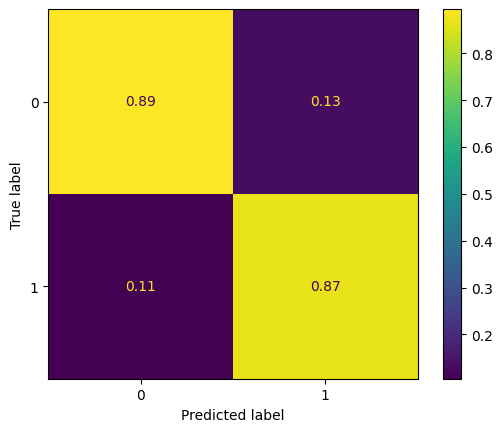

749/749 [==============================] - 2s 3ms/step
0.792
0.208
Cell: ['A160119#001'] - 0
0.787
0.213
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.455
0.545
Cell: ['A160125#087'] - 1
0.993
0.007
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.995
0.005
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.989
0.011
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.1
0.901
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.057
0.943
Cell: ['A160427#022'] - 1
0.465
0.535
Cell: ['A160427#035'] - 1
0.007
0.993
Cell: ['A160427#037'] - 1
0.092
0.908
Cell: ['A160427#039'] - 1
0.009
0.991
Cell: ['A160427#041'] - 1
0.123
0.877
Cell: ['A160427#047'] - 1
0.984
0.015
Cell: ['A160427#049'] - 0
0.029
0.971
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.395
0.606
Cell: ['A160427#075'] - 1
0.101
0.897
Cell: ['A160427#084'] - 1
0.603
0.3

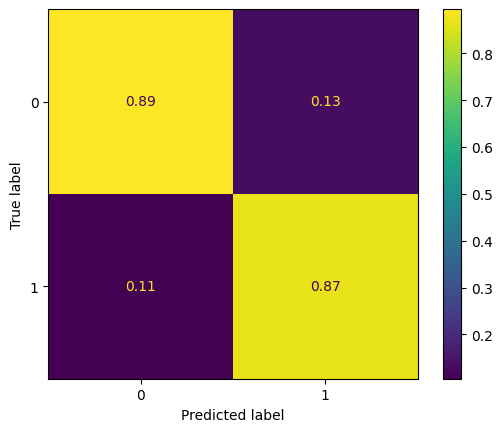

749/749 [==============================] - 2s 2ms/step
0.758
0.242
Cell: ['A160119#001'] - 0
0.851
0.149
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.357
0.643
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.077
0.923
Cell: ['A160426#021'] - 1
0.058
0.941
Cell: ['A160426#080'] - 1
0.083
0.916
Cell: ['A160427#022'] - 1
0.626
0.374
Cell: ['A160427#035'] - 0
0.023
0.977
Cell: ['A160427#037'] - 1
0.204
0.795
Cell: ['A160427#039'] - 1
0.023
0.977
Cell: ['A160427#041'] - 1
0.085
0.915
Cell: ['A160427#047'] - 1
0.996
0.004
Cell: ['A160427#049'] - 0
0.017
0.983
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.457
0.543
Cell: ['A160427#075'] - 1
0.184
0.813
Cell: ['A160427#084'] - 1
0.688
0

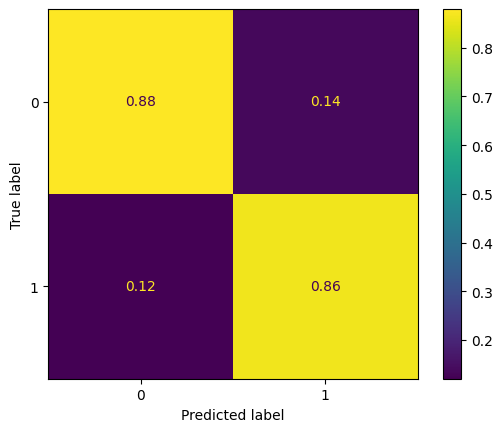

749/749 [==============================] - 2s 2ms/step
0.815
0.185
Cell: ['A160119#001'] - 0
0.863
0.137
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.372
0.628
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.995
0.005
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.075
0.925
Cell: ['A160426#021'] - 1
0.054
0.946
Cell: ['A160426#080'] - 1
0.087
0.913
Cell: ['A160427#022'] - 1
0.641
0.358
Cell: ['A160427#035'] - 0
0.019
0.981
Cell: ['A160427#037'] - 1
0.184
0.816
Cell: ['A160427#039'] - 1
0.017
0.983
Cell: ['A160427#041'] - 1
0.069
0.931
Cell: ['A160427#047'] - 1
0.986
0.014
Cell: ['A160427#049'] - 0
0.017
0.984
Cell: ['A160427#055'] - 1
0.001
0.999
Cell: ['A160427#073'] - 1
0.456
0.544
Cell: ['A160427#075'] - 1
0.203
0.797
Cell: ['A160427#084'] - 1
0.674
0.326

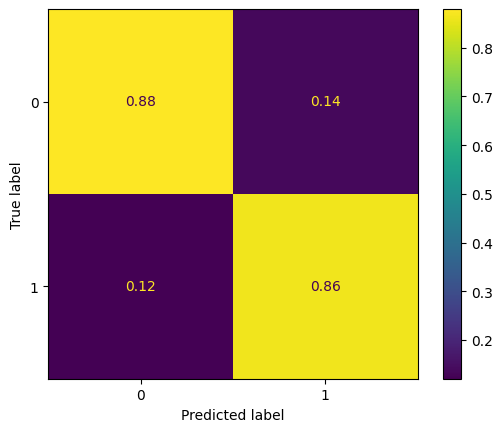

749/749 [==============================] - 2s 2ms/step
0.706
0.294
Cell: ['A160119#001'] - 0
0.816
0.184
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.389
0.61
Cell: ['A160125#087'] - 1
0.983
0.017
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.975
0.025
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.106
0.894
Cell: ['A160426#021'] - 1
0.03
0.97
Cell: ['A160426#080'] - 1
0.036
0.964
Cell: ['A160427#022'] - 1
0.494
0.506
Cell: ['A160427#035'] - 1
0.03
0.97
Cell: ['A160427#037'] - 1
0.172
0.828
Cell: ['A160427#039'] - 1
0.029
0.971
Cell: ['A160427#041'] - 1
0.097
0.902
Cell: ['A160427#047'] - 1
0.996
0.004
Cell: ['A160427#049'] - 0
0.01
0.99
Cell: ['A160427#055'] - 1
0.049
0.951
Cell: ['A160427#073'] - 1
0.436
0.564
Cell: ['A160427#075'] - 1
0.081
0.919
Cell: ['A160427#084'] - 1
0.696
0.30

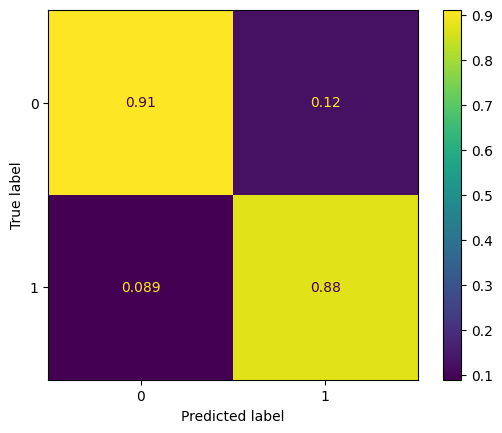

749/749 [==============================] - 2s 2ms/step
0.681
0.319
Cell: ['A160119#001'] - 0
0.774
0.226
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.392
0.608
Cell: ['A160125#087'] - 1
0.984
0.016
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.98
0.02
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.116
0.884
Cell: ['A160426#021'] - 1
0.028
0.972
Cell: ['A160426#080'] - 1
0.037
0.963
Cell: ['A160427#022'] - 1
0.473
0.527
Cell: ['A160427#035'] - 1
0.024
0.976
Cell: ['A160427#037'] - 1
0.166
0.834
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.11
0.89
Cell: ['A160427#047'] - 1
0.995
0.005
Cell: ['A160427#049'] - 0
0.021
0.979
Cell: ['A160427#055'] - 1
0.045
0.955
Cell: ['A160427#073'] - 1
0.427
0.573
Cell: ['A160427#075'] - 1
0.069
0.93
Cell: ['A160427#084'] - 1
0.659
0.341


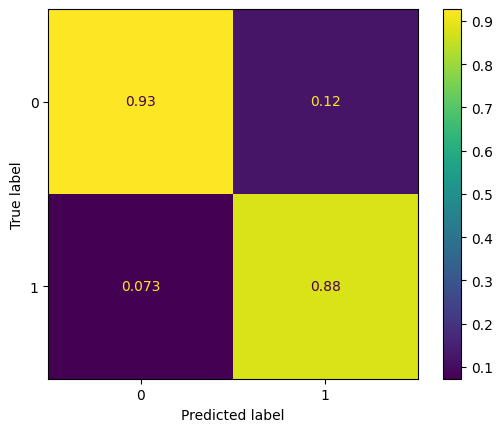

749/749 [==============================] - 2s 2ms/step
0.757
0.243
Cell: ['A160119#001'] - 0
0.878
0.122
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.437
0.563
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.977
0.023
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.039
0.961
Cell: ['A160426#021'] - 1
0.055
0.944
Cell: ['A160426#080'] - 1
0.101
0.899
Cell: ['A160427#022'] - 1
0.302
0.698
Cell: ['A160427#035'] - 1
0.02
0.979
Cell: ['A160427#037'] - 1
0.203
0.797
Cell: ['A160427#039'] - 1
0.037
0.963
Cell: ['A160427#041'] - 1
0.095
0.905
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.022
0.978
Cell: ['A160427#055'] - 1
0.011
0.989
Cell: ['A160427#073'] - 1
0.541
0.459
Cell: ['A160427#075'] - 0
0.153
0.847
Cell: ['A160427#084'] - 1
0.78
0.22
Ce

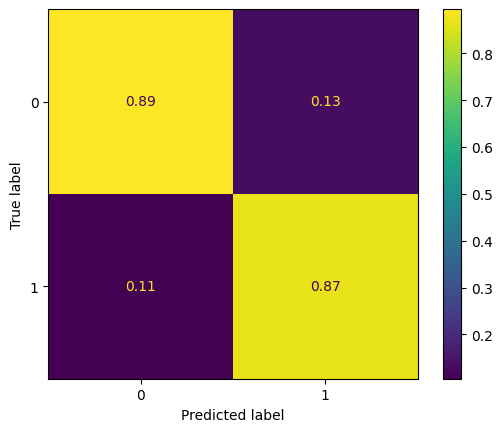

749/749 [==============================] - 2s 2ms/step
0.775
0.225
Cell: ['A160119#001'] - 0
0.88
0.12
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.424
0.575
Cell: ['A160125#087'] - 1
0.989
0.01
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.983
0.017
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.04
0.96
Cell: ['A160426#021'] - 1
0.04
0.96
Cell: ['A160426#080'] - 1
0.097
0.903
Cell: ['A160427#022'] - 1
0.317
0.683
Cell: ['A160427#035'] - 1
0.022
0.978
Cell: ['A160427#037'] - 1
0.201
0.798
Cell: ['A160427#039'] - 1
0.037
0.963
Cell: ['A160427#041'] - 1
0.104
0.896
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.023
0.977
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.571
0.428
Cell: ['A160427#075'] - 0
0.156
0.843
Cell: ['A160427#084'] - 1
0.806
0.194
Ce

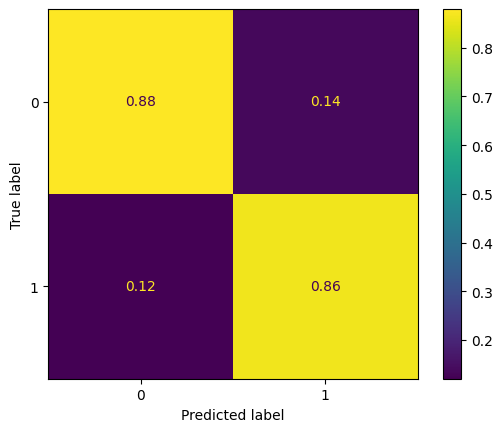

749/749 [==============================] - 2s 2ms/step
0.72
0.28
Cell: ['A160119#001'] - 0
0.785
0.215
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.358
0.641
Cell: ['A160125#087'] - 1
0.984
0.016
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.003
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.98
0.02
Cell: ['A160129#038'] - 0
0.999
0.001
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.992
0.008
Cell: ['A160205#051'] - 0
0.067
0.933
Cell: ['A160426#021'] - 1
0.043
0.956
Cell: ['A160426#080'] - 1
0.102
0.897
Cell: ['A160427#022'] - 1
0.481
0.519
Cell: ['A160427#035'] - 1
0.019
0.981
Cell: ['A160427#037'] - 1
0.149
0.852
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.104
0.895
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.027
0.973
Cell: ['A160427#055'] - 1
0.003
0.997
Cell: ['A160427#073'] - 1
0.442
0.558
Cell: ['A160427#075'] - 1
0.282
0.718
Cell: ['A160427#084'] - 1
0.656
0

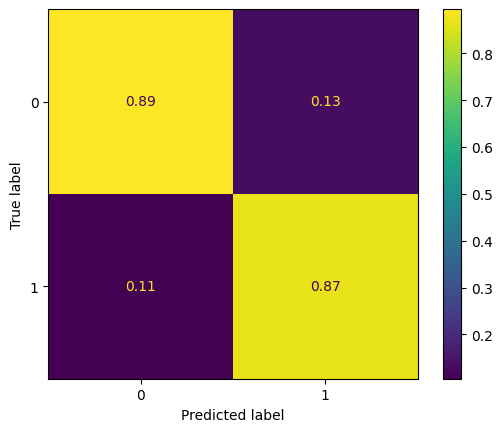

749/749 [==============================] - 2s 2ms/step
0.72
0.28
Cell: ['A160119#001'] - 0
0.794
0.206
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.344
0.656
Cell: ['A160125#087'] - 1
0.973
0.027
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.982
0.018
Cell: ['A160129#038'] - 0
0.999
0.001
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.058
0.942
Cell: ['A160426#021'] - 1
0.035
0.965
Cell: ['A160426#080'] - 1
0.099
0.901
Cell: ['A160427#022'] - 1
0.521
0.479
Cell: ['A160427#035'] - 0
0.018
0.982
Cell: ['A160427#037'] - 1
0.169
0.831
Cell: ['A160427#039'] - 1
0.01
0.99
Cell: ['A160427#041'] - 1
0.079
0.921
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.002
0.998
Cell: ['A160427#073'] - 1
0.429
0.571
Cell: ['A160427#075'] - 1
0.28
0.72
Cell: ['A160427#084'] - 1
0.656
0.3

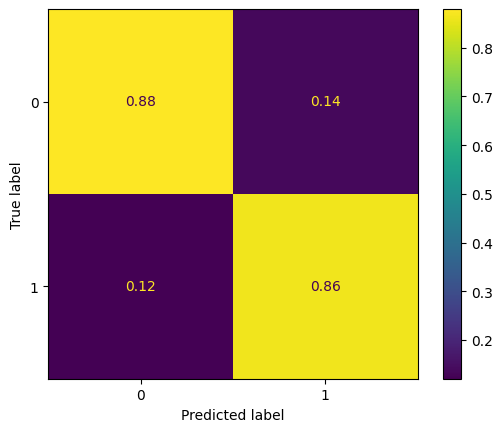

749/749 [==============================] - 2s 2ms/step
0.815
0.185
Cell: ['A160119#001'] - 0
0.818
0.182
Cell: ['A160125#009'] - 0
0.994
0.006
Cell: ['A160125#049'] - 0
0.39
0.61
Cell: ['A160125#087'] - 1
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.989
0.011
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.086
0.914
Cell: ['A160426#021'] - 1
0.033
0.967
Cell: ['A160426#080'] - 1
0.105
0.895
Cell: ['A160427#022'] - 1
0.487
0.512
Cell: ['A160427#035'] - 1
0.014
0.986
Cell: ['A160427#037'] - 1
0.169
0.832
Cell: ['A160427#039'] - 1
0.006
0.994
Cell: ['A160427#041'] - 1
0.089
0.911
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.038
0.962
Cell: ['A160427#055'] - 1
0.033
0.967
Cell: ['A160427#073'] - 1
0.469
0.532
Cell: ['A160427#075'] - 1
0.173
0.827
Cell: ['A160427#084'] - 1
0.809
0.1

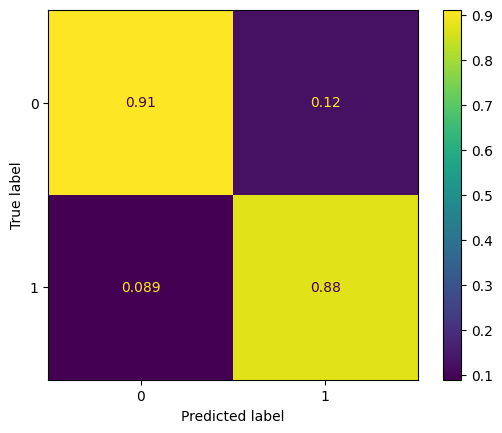

749/749 [==============================] - 2s 2ms/step
0.803
0.197
Cell: ['A160119#001'] - 0
0.823
0.177
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.38
0.62
Cell: ['A160125#087'] - 1
0.989
0.011
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.991
0.009
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.001
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.057
0.943
Cell: ['A160426#021'] - 1
0.032
0.968
Cell: ['A160426#080'] - 1
0.089
0.911
Cell: ['A160427#022'] - 1
0.51
0.49
Cell: ['A160427#035'] - 0
0.012
0.987
Cell: ['A160427#037'] - 1
0.132
0.868
Cell: ['A160427#039'] - 1
0.002
0.998
Cell: ['A160427#041'] - 1
0.096
0.904
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.022
0.978
Cell: ['A160427#055'] - 1
0.019
0.981
Cell: ['A160427#073'] - 1
0.436
0.564
Cell: ['A160427#075'] - 1
0.148
0.852
Cell: ['A160427#084'] - 1
0.761
0.238
Cel

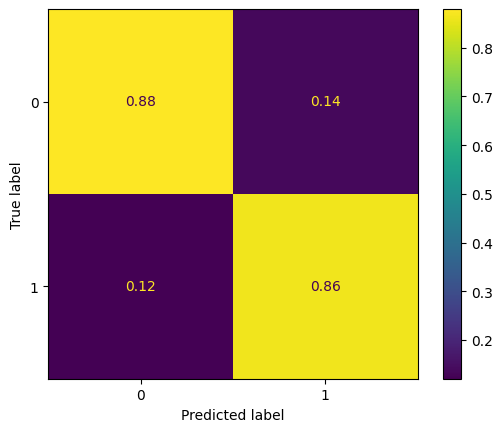

749/749 [==============================] - 2s 2ms/step
0.806
0.194
Cell: ['A160119#001'] - 0
0.844
0.156
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.396
0.603
Cell: ['A160125#087'] - 1
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.131
0.869
Cell: ['A160426#021'] - 1
0.024
0.975
Cell: ['A160426#080'] - 1
0.091
0.909
Cell: ['A160427#022'] - 1
0.51
0.49
Cell: ['A160427#035'] - 0
0.017
0.983
Cell: ['A160427#037'] - 1
0.152
0.848
Cell: ['A160427#039'] - 1
0.013
0.987
Cell: ['A160427#041'] - 1
0.1
0.9
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.02
0.98
Cell: ['A160427#055'] - 1
0.045
0.955
Cell: ['A160427#073'] - 1
0.575
0.424
Cell: ['A160427#075'] - 0
0.197
0.803
Cell: ['A160427#084'] - 1
0.822
0.178
Cell: ['A

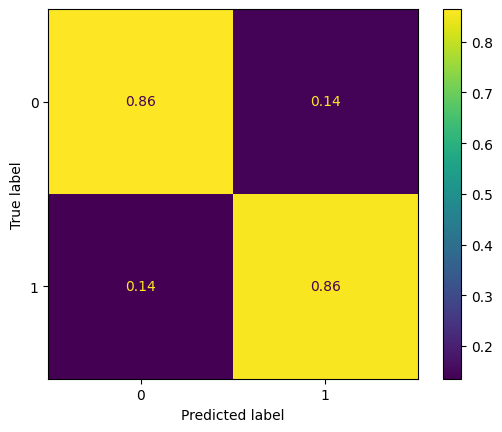

749/749 [==============================] - 2s 2ms/step
0.827
0.172
Cell: ['A160119#001'] - 0
0.84
0.16
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.422
0.577
Cell: ['A160125#087'] - 1
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.985
0.015
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.142
0.858
Cell: ['A160426#021'] - 1
0.025
0.975
Cell: ['A160426#080'] - 1
0.088
0.912
Cell: ['A160427#022'] - 1
0.475
0.525
Cell: ['A160427#035'] - 1
0.01
0.99
Cell: ['A160427#037'] - 1
0.132
0.867
Cell: ['A160427#039'] - 1
0.014
0.986
Cell: ['A160427#041'] - 1
0.091
0.909
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.021
0.979
Cell: ['A160427#055'] - 1
0.051
0.949
Cell: ['A160427#073'] - 1
0.608
0.392
Cell: ['A160427#075'] - 0
0.215
0.786
Cell: ['A160427#084'] - 1
0.851
0.149
Cel

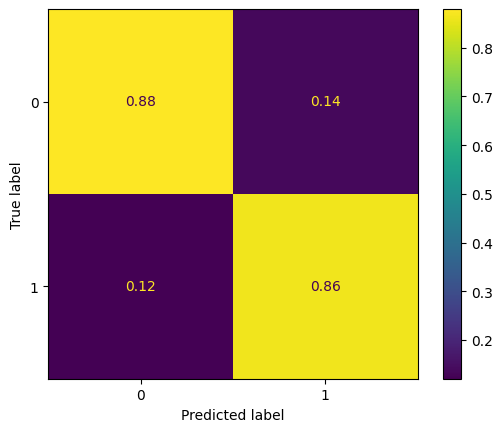

749/749 [==============================] - 2s 2ms/step
0.857
0.143
Cell: ['A160119#001'] - 0
0.883
0.117
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.385
0.615
Cell: ['A160125#087'] - 1
0.986
0.014
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.986
0.014
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.994
0.006
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.078
0.922
Cell: ['A160426#021'] - 1
0.046
0.954
Cell: ['A160426#080'] - 1
0.069
0.931
Cell: ['A160427#022'] - 1
0.522
0.478
Cell: ['A160427#035'] - 0
0.007
0.993
Cell: ['A160427#037'] - 1
0.146
0.853
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.072
0.928
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.025
0.975
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.489
0.511
Cell: ['A160427#075'] - 1
0.21
0.79
Cell: ['A160427#084'] - 1
0.811
0.1

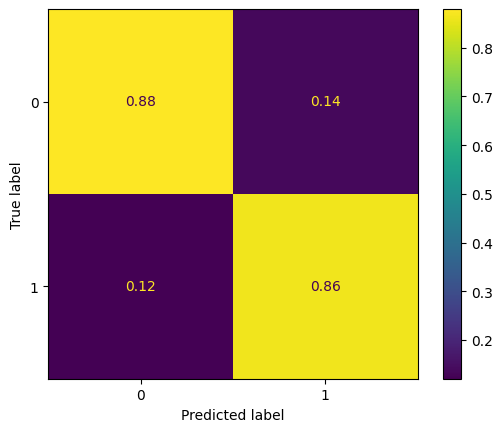

749/749 [==============================] - 2s 2ms/step
0.842
0.158
Cell: ['A160119#001'] - 0
0.862
0.138
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.344
0.656
Cell: ['A160125#087'] - 1
0.983
0.017
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.986
0.014
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.993
0.007
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.049
0.951
Cell: ['A160426#021'] - 1
0.047
0.953
Cell: ['A160426#080'] - 1
0.058
0.942
Cell: ['A160427#022'] - 1
0.519
0.481
Cell: ['A160427#035'] - 0
0.006
0.994
Cell: ['A160427#037'] - 1
0.122
0.878
Cell: ['A160427#039'] - 1
0.018
0.983
Cell: ['A160427#041'] - 1
0.061
0.939
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.459
0.541
Cell: ['A160427#075'] - 1
0.254
0.745
Cell: ['A160427#084'] - 1
0.774
0

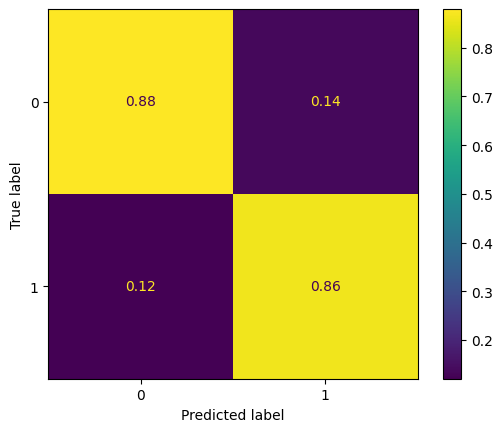

749/749 [==============================] - 2s 2ms/step
0.732
0.268
Cell: ['A160119#001'] - 0
0.865
0.135
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.509
0.491
Cell: ['A160125#087'] - 0
0.981
0.019
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.995
0.005
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.983
0.017
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.075
0.925
Cell: ['A160426#021'] - 1
0.067
0.933
Cell: ['A160426#080'] - 1
0.099
0.901
Cell: ['A160427#022'] - 1
0.554
0.447
Cell: ['A160427#035'] - 0
0.032
0.968
Cell: ['A160427#037'] - 1
0.147
0.852
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.145
0.855
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.022
0.978
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.444
0.556
Cell: ['A160427#075'] - 1
0.143
0.857
Cell: ['A160427#084'] - 1
0.735
0.265

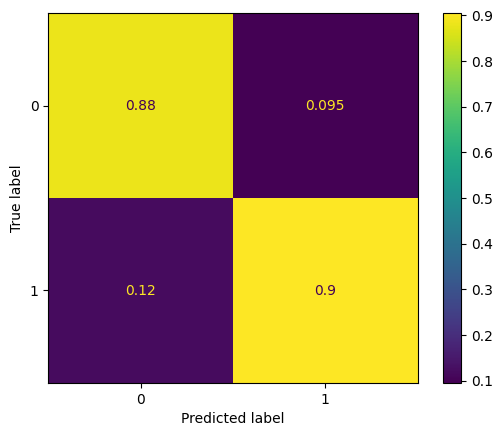

749/749 [==============================] - 2s 2ms/step
0.755
0.245
Cell: ['A160119#001'] - 0
0.849
0.151
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.476
0.524
Cell: ['A160125#087'] - 1
0.978
0.022
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.978
0.022
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.07
0.93
Cell: ['A160426#021'] - 1
0.08
0.92
Cell: ['A160426#080'] - 1
0.112
0.888
Cell: ['A160427#022'] - 1
0.516
0.484
Cell: ['A160427#035'] - 0
0.06
0.939
Cell: ['A160427#037'] - 1
0.167
0.833
Cell: ['A160427#039'] - 1
0.026
0.974
Cell: ['A160427#041'] - 1
0.152
0.848
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.976
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.401
0.599
Cell: ['A160427#075'] - 1
0.132
0.868
Cell: ['A160427#084'] - 1
0.665
0.334
Cell

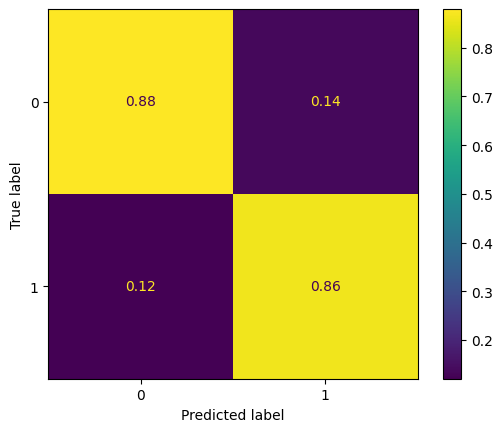

749/749 [==============================] - 2s 2ms/step
0.814
0.186
Cell: ['A160119#001'] - 0
0.855
0.145
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.493
0.507
Cell: ['A160125#087'] - 1
0.985
0.014
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.984
0.016
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.097
0.903
Cell: ['A160426#021'] - 1
0.069
0.931
Cell: ['A160426#080'] - 1
0.089
0.911
Cell: ['A160427#022'] - 1
0.449
0.551
Cell: ['A160427#035'] - 1
0.023
0.977
Cell: ['A160427#037'] - 1
0.25
0.749
Cell: ['A160427#039'] - 1
0.016
0.984
Cell: ['A160427#041'] - 1
0.094
0.906
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.023
0.977
Cell: ['A160427#055'] - 1
0.016
0.984
Cell: ['A160427#073'] - 1
0.459
0.541
Cell: ['A160427#075'] - 1
0.211
0.789
Cell: ['A160427#084'] - 1
0.791
0.

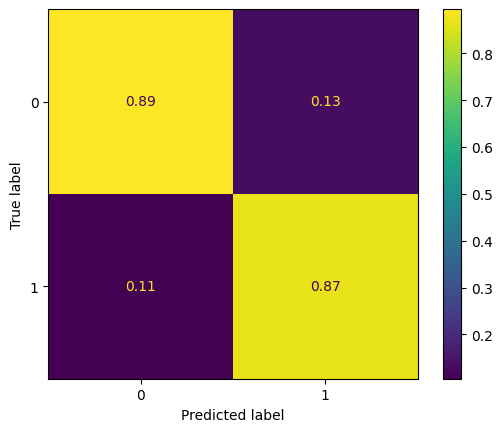

749/749 [==============================] - 2s 2ms/step
0.795
0.204
Cell: ['A160119#001'] - 0
0.872
0.129
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.435
0.566
Cell: ['A160125#087'] - 1
0.982
0.018
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.982
0.018
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.994
0.006
Cell: ['A160205#051'] - 0
0.083
0.917
Cell: ['A160426#021'] - 1
0.051
0.95
Cell: ['A160426#080'] - 1
0.062
0.937
Cell: ['A160427#022'] - 1
0.463
0.536
Cell: ['A160427#035'] - 1
0.015
0.985
Cell: ['A160427#037'] - 1
0.259
0.741
Cell: ['A160427#039'] - 1
0.019
0.98
Cell: ['A160427#041'] - 1
0.074
0.926
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.015
0.985
Cell: ['A160427#055'] - 1
0.014
0.986
Cell: ['A160427#073'] - 1
0.444
0.556
Cell: ['A160427#075'] - 1
0.187
0.813
Cell: ['A160427#084'] - 1
0.809
0.191
C

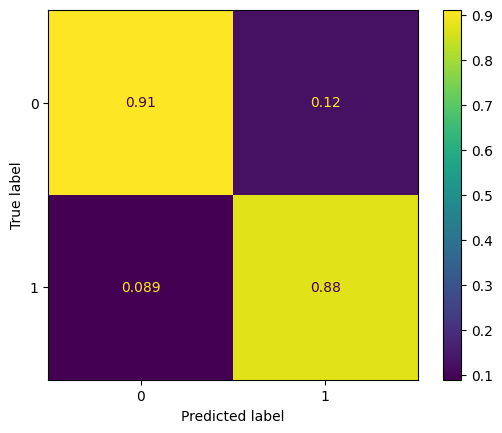

749/749 [==============================] - 2s 2ms/step
0.765
0.235
Cell: ['A160119#001'] - 0
0.826
0.174
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.387
0.613
Cell: ['A160125#087'] - 1
0.98
0.02
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
0.999
0.001
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.106
0.895
Cell: ['A160426#021'] - 1
0.041
0.959
Cell: ['A160426#080'] - 1
0.061
0.939
Cell: ['A160427#022'] - 1
0.446
0.554
Cell: ['A160427#035'] - 1
0.022
0.977
Cell: ['A160427#037'] - 1
0.162
0.838
Cell: ['A160427#039'] - 1
0.01
0.99
Cell: ['A160427#041'] - 1
0.08
0.92
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.017
0.982
Cell: ['A160427#055'] - 1
0.026
0.974
Cell: ['A160427#073'] - 1
0.492
0.508
Cell: ['A160427#075'] - 1
0.187
0.813
Cell: ['A160427#084'] - 1
0.815
0.1

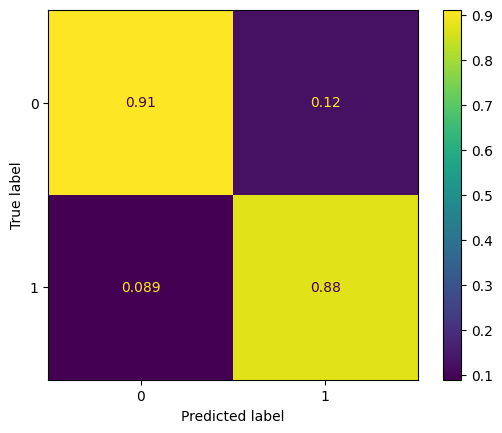

749/749 [==============================] - 2s 2ms/step
0.795
0.205
Cell: ['A160119#001'] - 0
0.823
0.177
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.402
0.598
Cell: ['A160125#087'] - 1
0.982
0.018
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.993
0.007
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.107
0.893
Cell: ['A160426#021'] - 1
0.033
0.967
Cell: ['A160426#080'] - 1
0.062
0.937
Cell: ['A160427#022'] - 1
0.502
0.498
Cell: ['A160427#035'] - 0
0.026
0.974
Cell: ['A160427#037'] - 1
0.114
0.887
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.082
0.918
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.017
0.984
Cell: ['A160427#055'] - 1
0.026
0.974
Cell: ['A160427#073'] - 1
0.476
0.524
Cell: ['A160427#075'] - 1
0.171
0.83
Cell: ['A160427#084'] - 1
0.781
0.

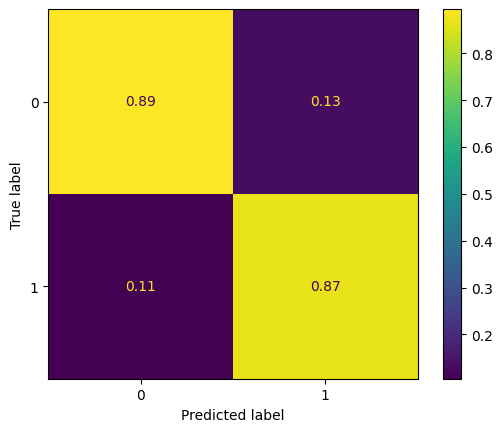

749/749 [==============================] - 2s 2ms/step
0.788
0.212
Cell: ['A160119#001'] - 0
0.725
0.275
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.392
0.608
Cell: ['A160125#087'] - 1
0.977
0.023
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.992
0.008
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.062
0.938
Cell: ['A160426#021'] - 1
0.06
0.941
Cell: ['A160426#080'] - 1
0.06
0.941
Cell: ['A160427#022'] - 1
0.494
0.506
Cell: ['A160427#035'] - 1
0.008
0.992
Cell: ['A160427#037'] - 1
0.124
0.876
Cell: ['A160427#039'] - 1
0.018
0.982
Cell: ['A160427#041'] - 1
0.089
0.911
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.032
0.968
Cell: ['A160427#055'] - 1
0.007
0.992
Cell: ['A160427#073'] - 1
0.472
0.528
Cell: ['A160427#075'] - 1
0.158
0.843
Cell: ['A160427#084'] - 1
0.789
0.2

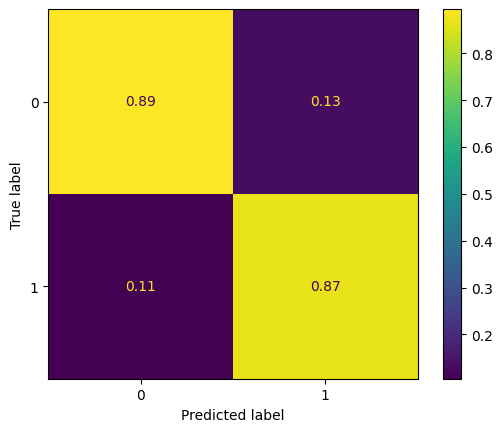

749/749 [==============================] - 2s 2ms/step
0.794
0.206
Cell: ['A160119#001'] - 0
0.713
0.287
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.377
0.624
Cell: ['A160125#087'] - 1
0.98
0.02
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.997
0.003
Cell: ['A160127#118'] - 0
0.994
0.006
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.994
0.007
Cell: ['A160205#051'] - 0
0.06
0.94
Cell: ['A160426#021'] - 1
0.055
0.945
Cell: ['A160426#080'] - 1
0.064
0.936
Cell: ['A160427#022'] - 1
0.506
0.494
Cell: ['A160427#035'] - 0
0.017
0.983
Cell: ['A160427#037'] - 1
0.127
0.873
Cell: ['A160427#039'] - 1
0.022
0.978
Cell: ['A160427#041'] - 1
0.081
0.919
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.035
0.965
Cell: ['A160427#055'] - 1
0.005
0.995
Cell: ['A160427#073'] - 1
0.482
0.518
Cell: ['A160427#075'] - 1
0.201
0.8
Cell: ['A160427#084'] - 1
0.819
0.18
Ce

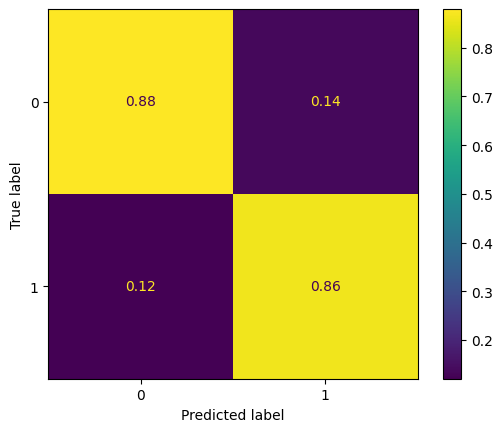

749/749 [==============================] - 2s 2ms/step
0.687
0.312
Cell: ['A160119#001'] - 0
0.64
0.36
Cell: ['A160125#009'] - 0
0.992
0.008
Cell: ['A160125#049'] - 0
0.415
0.585
Cell: ['A160125#087'] - 1
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.987
0.013
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.995
0.005
Cell: ['A160203#003'] - 0
0.999
0.0
Cell: ['A160205#051'] - 0
0.108
0.891
Cell: ['A160426#021'] - 1
0.084
0.916
Cell: ['A160426#080'] - 1
0.081
0.919
Cell: ['A160427#022'] - 1
0.466
0.534
Cell: ['A160427#035'] - 1
0.019
0.981
Cell: ['A160427#037'] - 1
0.199
0.801
Cell: ['A160427#039'] - 1
0.031
0.969
Cell: ['A160427#041'] - 1
0.137
0.863
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.089
0.911
Cell: ['A160427#055'] - 1
0.009
0.991
Cell: ['A160427#073'] - 1
0.563
0.437
Cell: ['A160427#075'] - 0
0.077
0.923
Cell: ['A160427#084'] - 1
0.777
0.223
Cel

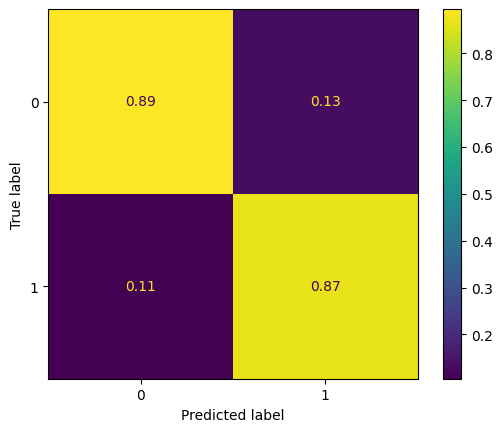

749/749 [==============================] - 2s 2ms/step
0.678
0.322
Cell: ['A160119#001'] - 0
0.665
0.335
Cell: ['A160125#009'] - 0
0.994
0.007
Cell: ['A160125#049'] - 0
0.431
0.57
Cell: ['A160125#087'] - 1
0.995
0.005
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
1.0
0.0
Cell: ['A160205#051'] - 0
0.124
0.876
Cell: ['A160426#021'] - 1
0.119
0.88
Cell: ['A160426#080'] - 1
0.106
0.894
Cell: ['A160427#022'] - 1
0.497
0.503
Cell: ['A160427#035'] - 1
0.022
0.978
Cell: ['A160427#037'] - 1
0.183
0.817
Cell: ['A160427#039'] - 1
0.027
0.973
Cell: ['A160427#041'] - 1
0.13
0.87
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.104
0.896
Cell: ['A160427#055'] - 1
0.008
0.992
Cell: ['A160427#073'] - 1
0.564
0.436
Cell: ['A160427#075'] - 0
0.096
0.903
Cell: ['A160427#084'] - 1
0.776
0.224
Cel

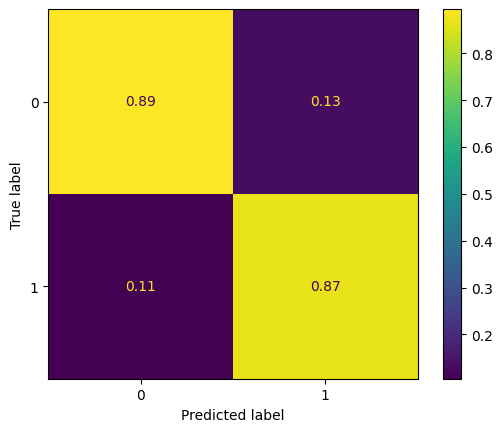

749/749 [==============================] - 2s 2ms/step
0.767
0.233
Cell: ['A160119#001'] - 0
0.799
0.201
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.447
0.553
Cell: ['A160125#087'] - 1
0.965
0.035
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.997
0.003
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.996
0.004
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.09
0.91
Cell: ['A160426#021'] - 1
0.045
0.955
Cell: ['A160426#080'] - 1
0.086
0.914
Cell: ['A160427#022'] - 1
0.481
0.518
Cell: ['A160427#035'] - 1
0.02
0.98
Cell: ['A160427#037'] - 1
0.242
0.758
Cell: ['A160427#039'] - 1
0.034
0.966
Cell: ['A160427#041'] - 1
0.15
0.851
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.024
0.977
Cell: ['A160427#055'] - 1
0.01
0.99
Cell: ['A160427#073'] - 1
0.561
0.439
Cell: ['A160427#075'] - 0
0.028
0.972
Cell: ['A160427#084'] - 1
0.831
0.169
Cell

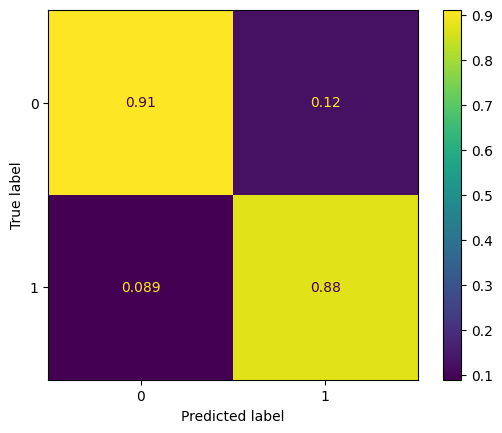

749/749 [==============================] - 2s 2ms/step
0.767
0.233
Cell: ['A160119#001'] - 0
0.811
0.19
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.44
0.56
Cell: ['A160125#087'] - 1
0.954
0.046
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.998
0.002
Cell: ['A160127#090'] - 0
0.997
0.003
Cell: ['A160127#118'] - 0
0.987
0.013
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.993
0.007
Cell: ['A160205#051'] - 0
0.073
0.927
Cell: ['A160426#021'] - 1
0.034
0.966
Cell: ['A160426#080'] - 1
0.069
0.931
Cell: ['A160427#022'] - 1
0.439
0.561
Cell: ['A160427#035'] - 1
0.006
0.994
Cell: ['A160427#037'] - 1
0.193
0.807
Cell: ['A160427#039'] - 1
0.013
0.987
Cell: ['A160427#041'] - 1
0.141
0.859
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.029
0.971
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.539
0.461
Cell: ['A160427#075'] - 0
0.039
0.961
Cell: ['A160427#084'] - 1
0.83
0.171

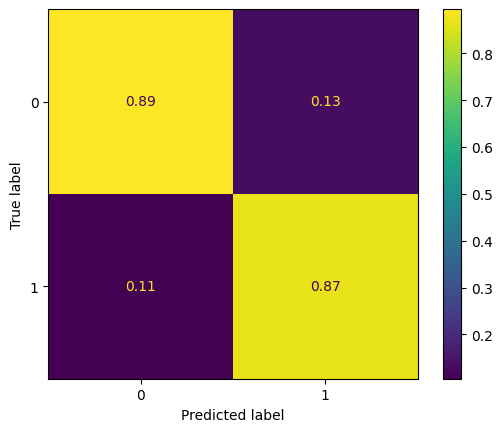

749/749 [==============================] - 2s 2ms/step
0.811
0.189
Cell: ['A160119#001'] - 0
0.71
0.29
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.435
0.565
Cell: ['A160125#087'] - 1
0.981
0.019
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.986
0.014
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.995
0.005
Cell: ['A160205#051'] - 0
0.081
0.919
Cell: ['A160426#021'] - 1
0.034
0.964
Cell: ['A160426#080'] - 1
0.071
0.929
Cell: ['A160427#022'] - 1
0.347
0.653
Cell: ['A160427#035'] - 1
0.028
0.972
Cell: ['A160427#037'] - 1
0.192
0.809
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.069
0.931
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.018
0.981
Cell: ['A160427#055'] - 1
0.018
0.982
Cell: ['A160427#073'] - 1
0.491
0.509
Cell: ['A160427#075'] - 1
0.13
0.87
Cell: ['A160427#084'] - 1
0.806
0.195

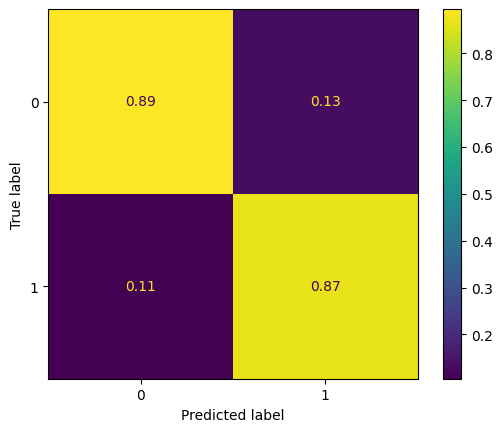

749/749 [==============================] - 2s 2ms/step
0.829
0.17
Cell: ['A160119#001'] - 0
0.704
0.296
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.42
0.58
Cell: ['A160125#087'] - 1
0.982
0.018
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.999
0.001
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.982
0.018
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.091
0.909
Cell: ['A160426#021'] - 1
0.038
0.961
Cell: ['A160426#080'] - 1
0.07
0.93
Cell: ['A160427#022'] - 1
0.325
0.675
Cell: ['A160427#035'] - 1
0.014
0.986
Cell: ['A160427#037'] - 1
0.147
0.853
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.059
0.941
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.01
0.99
Cell: ['A160427#055'] - 1
0.015
0.985
Cell: ['A160427#073'] - 1
0.518
0.482
Cell: ['A160427#075'] - 0
0.144
0.855
Cell: ['A160427#084'] - 1
0.832
0.168
Cell: 

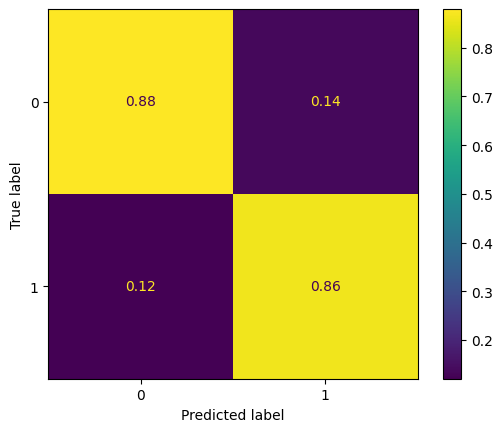

749/749 [==============================] - 2s 2ms/step
0.688
0.312
Cell: ['A160119#001'] - 0
0.838
0.162
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.444
0.556
Cell: ['A160125#087'] - 1
0.984
0.016
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.989
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.152
0.847
Cell: ['A160426#021'] - 1
0.057
0.943
Cell: ['A160426#080'] - 1
0.1
0.9
Cell: ['A160427#022'] - 1
0.362
0.639
Cell: ['A160427#035'] - 1
0.023
0.977
Cell: ['A160427#037'] - 1
0.305
0.695
Cell: ['A160427#039'] - 1
0.02
0.98
Cell: ['A160427#041'] - 1
0.086
0.914
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.075
0.926
Cell: ['A160427#055'] - 1
0.026
0.974
Cell: ['A160427#073'] - 1
0.543
0.457
Cell: ['A160427#075'] - 0
0.314
0.687
Cell: ['A160427#084'] - 1
0.852
0.148
Cell:

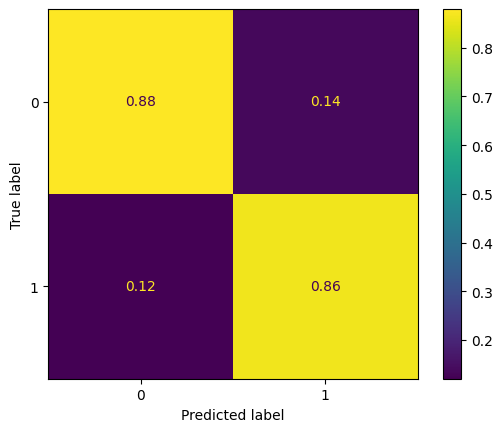

749/749 [==============================] - 2s 2ms/step
0.697
0.303
Cell: ['A160119#001'] - 0
0.809
0.191
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.441
0.56
Cell: ['A160125#087'] - 1
0.989
0.011
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.999
0.001
Cell: ['A160127#118'] - 0
0.985
0.015
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.998
0.002
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.15
0.85
Cell: ['A160426#021'] - 1
0.059
0.941
Cell: ['A160426#080'] - 1
0.092
0.908
Cell: ['A160427#022'] - 1
0.303
0.697
Cell: ['A160427#035'] - 1
0.019
0.981
Cell: ['A160427#037'] - 1
0.267
0.733
Cell: ['A160427#039'] - 1
0.026
0.974
Cell: ['A160427#041'] - 1
0.082
0.918
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.092
0.908
Cell: ['A160427#055'] - 1
0.024
0.976
Cell: ['A160427#073'] - 1
0.503
0.498
Cell: ['A160427#075'] - 0
0.315
0.684
Cell: ['A160427#084'] - 1
0.828
0.172
Ce

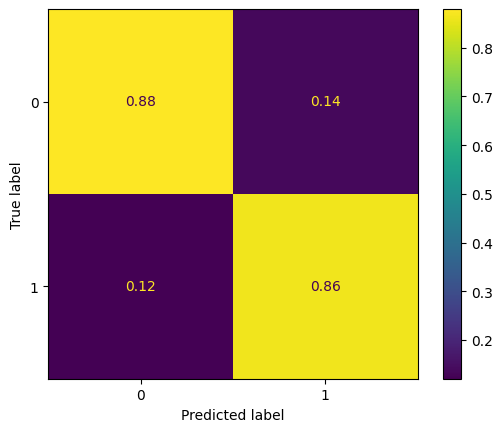

749/749 [==============================] - 2s 2ms/step
0.601
0.399
Cell: ['A160119#001'] - 0
0.848
0.152
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.523
0.477
Cell: ['A160125#087'] - 0
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.989
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.136
0.864
Cell: ['A160426#021'] - 1
0.071
0.929
Cell: ['A160426#080'] - 1
0.14
0.86
Cell: ['A160427#022'] - 1
0.346
0.654
Cell: ['A160427#035'] - 1
0.015
0.985
Cell: ['A160427#037'] - 1
0.24
0.76
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.109
0.891
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.074
0.925
Cell: ['A160427#055'] - 1
0.027
0.973
Cell: ['A160427#073'] - 1
0.529
0.47
Cell: ['A160427#075'] - 0
0.181
0.819
Cell: ['A160427#084'] - 1
0.789
0.21
Cell: ['A1

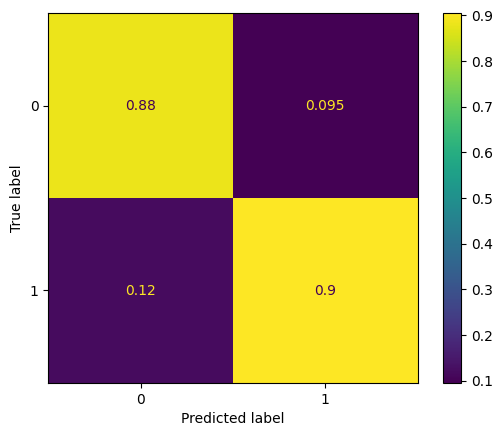

749/749 [==============================] - 2s 2ms/step
0.602
0.397
Cell: ['A160119#001'] - 0
0.821
0.179
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.489
0.511
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.99
0.01
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.12
0.88
Cell: ['A160426#021'] - 1
0.069
0.931
Cell: ['A160426#080'] - 1
0.12
0.879
Cell: ['A160427#022'] - 1
0.327
0.674
Cell: ['A160427#035'] - 1
0.014
0.986
Cell: ['A160427#037'] - 1
0.222
0.779
Cell: ['A160427#039'] - 1
0.032
0.968
Cell: ['A160427#041'] - 1
0.102
0.898
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.064
0.936
Cell: ['A160427#055'] - 1
0.031
0.968
Cell: ['A160427#073'] - 1
0.557
0.443
Cell: ['A160427#075'] - 0
0.147
0.853
Cell: ['A160427#084'] - 1
0.786
0.213
Cell: ['

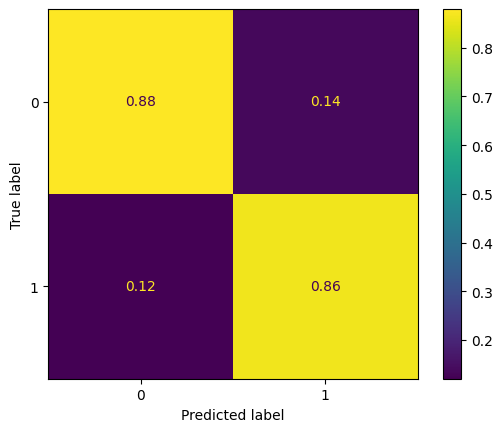

749/749 [==============================] - 2s 2ms/step
0.715
0.286
Cell: ['A160119#001'] - 0
0.92
0.081
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.483
0.518
Cell: ['A160125#087'] - 1
0.991
0.009
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.974
0.026
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.225
0.775
Cell: ['A160426#021'] - 1
0.07
0.93
Cell: ['A160426#080'] - 1
0.141
0.859
Cell: ['A160427#022'] - 1
0.459
0.542
Cell: ['A160427#035'] - 1
0.039
0.961
Cell: ['A160427#037'] - 1
0.358
0.643
Cell: ['A160427#039'] - 1
0.01
0.991
Cell: ['A160427#041'] - 1
0.129
0.871
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.119
0.882
Cell: ['A160427#055'] - 1
0.03
0.97
Cell: ['A160427#073'] - 1
0.618
0.383
Cell: ['A160427#075'] - 0
0.098
0.902
Cell: ['A160427#084'] - 1
0.838
0.162
Cell: ['A1604

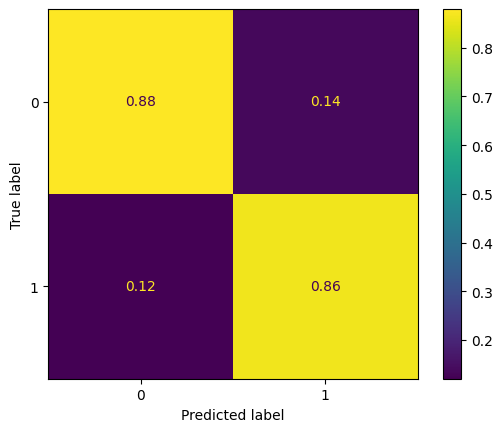

749/749 [==============================] - 2s 2ms/step
0.7
0.3
Cell: ['A160119#001'] - 0
0.909
0.091
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.476
0.524
Cell: ['A160125#087'] - 1
0.985
0.015
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.975
0.025
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.219
0.781
Cell: ['A160426#021'] - 1
0.067
0.932
Cell: ['A160426#080'] - 1
0.148
0.852
Cell: ['A160427#022'] - 1
0.442
0.558
Cell: ['A160427#035'] - 1
0.037
0.963
Cell: ['A160427#037'] - 1
0.358
0.643
Cell: ['A160427#039'] - 1
0.012
0.988
Cell: ['A160427#041'] - 1
0.143
0.857
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.128
0.871
Cell: ['A160427#055'] - 1
0.03
0.97
Cell: ['A160427#073'] - 1
0.616
0.384
Cell: ['A160427#075'] - 0
0.121
0.879
Cell: ['A160427#084'] - 1
0.825
0.175
Cell: ['A1604

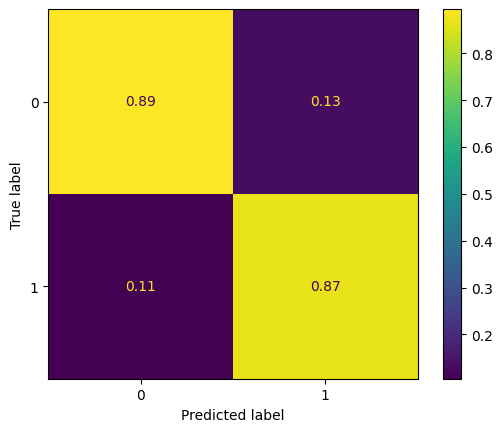

749/749 [==============================] - 2s 2ms/step
0.67
0.331
Cell: ['A160119#001'] - 0
0.792
0.208
Cell: ['A160125#009'] - 0
0.997
0.003
Cell: ['A160125#049'] - 0
0.506
0.494
Cell: ['A160125#087'] - 0
0.985
0.015
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.983
0.017
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.997
0.003
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.074
0.926
Cell: ['A160426#021'] - 1
0.058
0.942
Cell: ['A160426#080'] - 1
0.168
0.832
Cell: ['A160427#022'] - 1
0.325
0.675
Cell: ['A160427#035'] - 1
0.022
0.978
Cell: ['A160427#037'] - 1
0.223
0.777
Cell: ['A160427#039'] - 1
0.008
0.992
Cell: ['A160427#041'] - 1
0.134
0.866
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.12
0.88
Cell: ['A160427#055'] - 1
0.031
0.969
Cell: ['A160427#073'] - 1
0.43
0.57
Cell: ['A160427#075'] - 1
0.154
0.846
Cell: ['A160427#084'] - 1
0.748
0.252
Cell

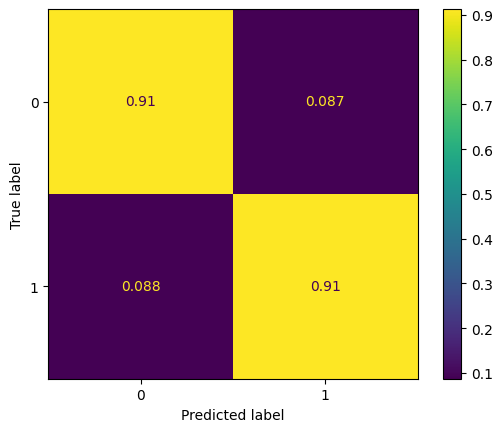

749/749 [==============================] - 2s 2ms/step
0.676
0.325
Cell: ['A160119#001'] - 0
0.781
0.219
Cell: ['A160125#009'] - 0
0.998
0.002
Cell: ['A160125#049'] - 0
0.535
0.465
Cell: ['A160125#087'] - 0
0.987
0.013
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.996
0.004
Cell: ['A160127#118'] - 0
0.982
0.018
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.996
0.004
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.055
0.945
Cell: ['A160426#021'] - 1
0.05
0.95
Cell: ['A160426#080'] - 1
0.145
0.855
Cell: ['A160427#022'] - 1
0.285
0.715
Cell: ['A160427#035'] - 1
0.016
0.984
Cell: ['A160427#037'] - 1
0.165
0.835
Cell: ['A160427#039'] - 1
0.004
0.997
Cell: ['A160427#041'] - 1
0.131
0.869
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.1
0.9
Cell: ['A160427#055'] - 1
0.02
0.98
Cell: ['A160427#073'] - 1
0.411
0.589
Cell: ['A160427#075'] - 1
0.151
0.849
Cell: ['A160427#084'] - 1
0.748
0.252
Cell: [

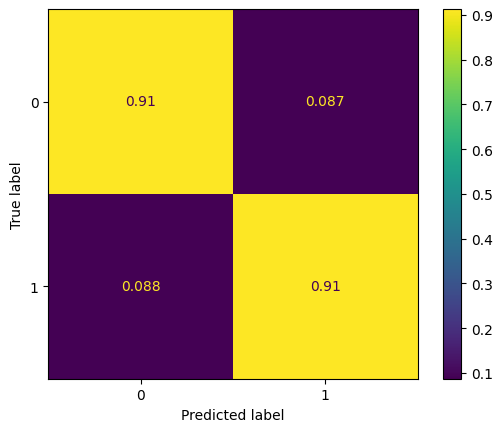

749/749 [==============================] - 2s 2ms/step
0.661
0.339
Cell: ['A160119#001'] - 0
0.752
0.248
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.438
0.562
Cell: ['A160125#087'] - 1
0.981
0.019
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.982
0.018
Cell: ['A160129#038'] - 0
0.999
0.001
Cell: ['A160129#040'] - 0
0.996
0.004
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.084
0.916
Cell: ['A160426#021'] - 1
0.047
0.953
Cell: ['A160426#080'] - 1
0.109
0.891
Cell: ['A160427#022'] - 1
0.276
0.725
Cell: ['A160427#035'] - 1
0.039
0.961
Cell: ['A160427#037'] - 1
0.172
0.828
Cell: ['A160427#039'] - 1
0.003
0.996
Cell: ['A160427#041'] - 1
0.154
0.846
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.093
0.907
Cell: ['A160427#055'] - 1
0.015
0.985
Cell: ['A160427#073'] - 1
0.489
0.511
Cell: ['A160427#075'] - 1
0.268
0.732
Cell: ['A160427#084'] - 1
0.82
0.

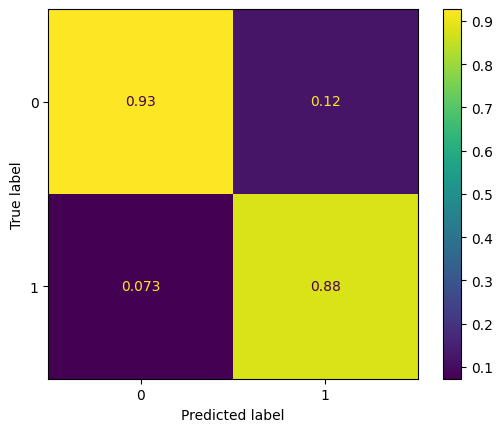

749/749 [==============================] - 2s 2ms/step
0.606
0.394
Cell: ['A160119#001'] - 0
0.728
0.272
Cell: ['A160125#009'] - 0
0.995
0.005
Cell: ['A160125#049'] - 0
0.475
0.525
Cell: ['A160125#087'] - 1
0.983
0.017
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
0.998
0.002
Cell: ['A160127#118'] - 0
0.98
0.02
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.994
0.006
Cell: ['A160203#003'] - 0
0.997
0.003
Cell: ['A160205#051'] - 0
0.076
0.924
Cell: ['A160426#021'] - 1
0.064
0.936
Cell: ['A160426#080'] - 1
0.121
0.879
Cell: ['A160427#022'] - 1
0.262
0.739
Cell: ['A160427#035'] - 1
0.011
0.989
Cell: ['A160427#037'] - 1
0.141
0.859
Cell: ['A160427#039'] - 1
0.005
0.995
Cell: ['A160427#041'] - 1
0.174
0.826
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.106
0.894
Cell: ['A160427#055'] - 1
0.012
0.988
Cell: ['A160427#073'] - 1
0.461
0.539
Cell: ['A160427#075'] - 1
0.289
0.71
Cell: ['A160427#084'] - 1
0.747
0.254
Ce

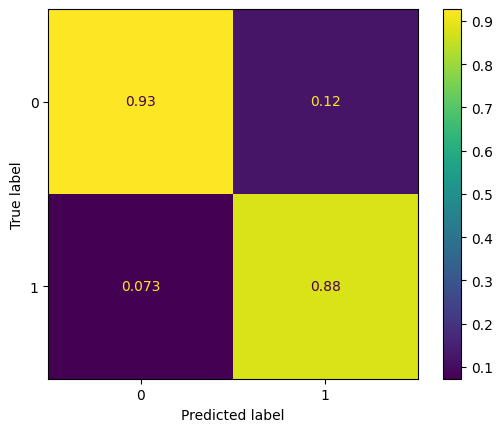

749/749 [==============================] - 2s 2ms/step
0.571
0.43
Cell: ['A160119#001'] - 0
0.833
0.167
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.422
0.577
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.988
0.012
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.998
0.002
Cell: ['A160205#051'] - 0
0.056
0.944
Cell: ['A160426#021'] - 1
0.032
0.968
Cell: ['A160426#080'] - 1
0.067
0.933
Cell: ['A160427#022'] - 1
0.274
0.725
Cell: ['A160427#035'] - 1
0.022
0.978
Cell: ['A160427#037'] - 1
0.172
0.828
Cell: ['A160427#039'] - 1
0.015
0.985
Cell: ['A160427#041'] - 1
0.098
0.901
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.057
0.942
Cell: ['A160427#055'] - 1
0.007
0.993
Cell: ['A160427#073'] - 1
0.401
0.598
Cell: ['A160427#075'] - 1
0.164
0.835
Cell: ['A160427#084'] - 1
0.701
0.299
Cell: ['

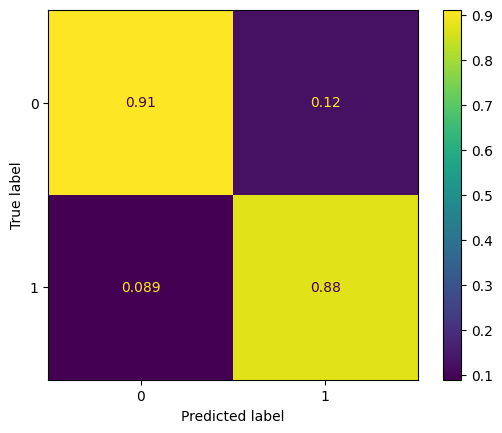

749/749 [==============================] - 2s 2ms/step
0.517
0.483
Cell: ['A160119#001'] - 0
0.814
0.186
Cell: ['A160125#009'] - 0
0.996
0.004
Cell: ['A160125#049'] - 0
0.355
0.644
Cell: ['A160125#087'] - 1
0.994
0.006
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
1.0
0.0
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.985
0.015
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
0.999
0.001
Cell: ['A160203#003'] - 0
0.999
0.001
Cell: ['A160205#051'] - 0
0.04
0.96
Cell: ['A160426#021'] - 1
0.031
0.969
Cell: ['A160426#080'] - 1
0.049
0.951
Cell: ['A160427#022'] - 1
0.25
0.75
Cell: ['A160427#035'] - 1
0.008
0.992
Cell: ['A160427#037'] - 1
0.158
0.842
Cell: ['A160427#039'] - 1
0.01
0.99
Cell: ['A160427#041'] - 1
0.094
0.907
Cell: ['A160427#047'] - 1
1.0
0.0
Cell: ['A160427#049'] - 0
0.045
0.955
Cell: ['A160427#055'] - 1
0.01
0.99
Cell: ['A160427#073'] - 1
0.337
0.664
Cell: ['A160427#075'] - 1
0.21
0.789
Cell: ['A160427#084'] - 1
0.641
0.359
Cell: ['A160

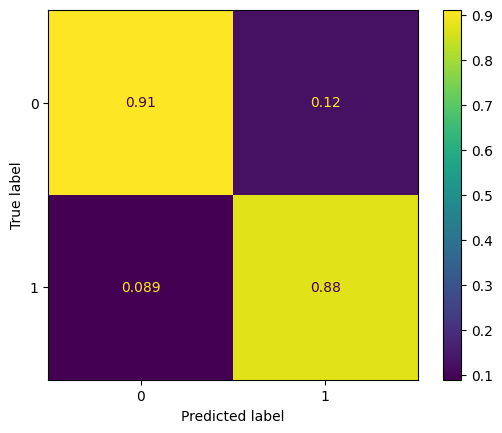

In [ ]:
#a = 44
dimN = 160
step_a=50
step_b = 10000
start_m = 20
end_m = 32
#dfTotNormScores = pd.DataFrame(columns=['Model','Test loss','Test accuracy','Test Precision','Test Recall','Test Binary Accuracy','Test False Positives','Test False Negatives',' Test Sensitivity At Specificity 0.5'])
dfNonHomScores = pd.DataFrame(columns=['Training Session','Test Binary Accuracy',' Test Sensitivity At Specificity 0.5','Test Confusion Matrix'])
#final_test_result_b = pd.DataFrame(columns=['Training Session','Cell_Name','Cell_Type_Name','Cell_Type','Cell_Type_Cat'])
for a in range(1,200,1):
  #### Non-Homogeneous Data Test
  prsList = []
  for i in range(start_m,end_m,1):
    keras.backend.clear_session()
    loaded_model = tf.keras.models.load_model("/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a)+".keras")
    prs=loaded_model.predict(X_test_new)
    if len(prsList)>0:
      prsList = np.append(prsList,[prs],axis=0)
    else:
      prsList = [prs]
  testPrs= np.mean(prsList,axis=0)
  testPrs = np.argmax(testPrs,axis=1)
  testResults = pd.DataFrame(columns=[])
  testResults['Cell_Name'] = clsTest.tolist()
  testResults['Cell_Name'] = testResults['Cell_Name'].astype('string')
  testPrsCat= np.mean(prsList,axis=0)
  testPrs = np.argmax(testPrsCat,axis=1)
  #testPrsCat= np.round(testPrsCat,decimals=0)
  testResults['Cell_Prediction_Cat'] = testPrsCat.tolist()
  testPrs = np.argmax(testPrsCat,axis=1)
  testResults['Cell_Prediction_Bin'] = testPrs.tolist()
  # Step 2: Group by 'cell_name'
  grouped_data = testResults.groupby('Cell_Name')
  test_cell_type_pred = []
  for cell_name, group in grouped_data:
      mean_cell = np.mean(group['Cell_Prediction_Cat'].tolist(),axis=0)
      print(np.round(mean_cell[0],3))
      print(np.round(mean_cell[1],3))
      if mean_cell[0] > mean_cell[1]:
          status = 0
      else:
          status = 1

      if len(test_cell_type_pred)==0:
        test_cell_type_pred = [status]
      else:
        test_cell_type_pred = np.append(test_cell_type_pred,[status], axis=0)
      print(f"Cell: {cell_name} - {status}")
  m = keras.metrics.BinaryAccuracy()
  m.update_state(test_cell_type_pred, testCellType)
  bin_acc = m.result()
  conf_mat_result = confusion_matrix(testCellType, test_cell_type_pred , normalize='pred')
  print(conf_mat_result)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_result,display_labels=None)
  disp.plot()
  plt.show()
  mSens = keras.metrics.SensitivityAtSpecificity(0.5)
  mSens.update_state(test_cell_type_pred, testCellType)
  sens_spec = mSens.result()
  dfNonHomScores.loc[a] = [a, bin_acc, sens_spec, conf_mat_result]
  dfNonHomScores.to_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/DataAugModConvBinNormN_NonHomogeneous_Scores-Data240124.csv')
  a = a+1

### Non Homogeneous Data - Test and Result - Original Models

749/749 [==============================] - 3s 4ms/step
0.632
0.368
Cell: ['A160119#001'] - 0
0.751
0.249
Cell: ['A160125#009'] - 0
0.999
0.001
Cell: ['A160125#049'] - 0
0.418
0.582
Cell: ['A160125#087'] - 1
0.997
0.003
Cell: ['A160127#011'] - 0
1.0
0.0
Cell: ['A160127#035'] - 0
0.997
0.003
Cell: ['A160127#090'] - 0
1.0
0.0
Cell: ['A160127#118'] - 0
0.997
0.003
Cell: ['A160129#038'] - 0
1.0
0.0
Cell: ['A160129#040'] - 0
1.0
0.0
Cell: ['A160203#003'] - 0
0.996
0.004
Cell: ['A160205#051'] - 0
0.035
0.965
Cell: ['A160426#021'] - 1
0.009
0.991
Cell: ['A160426#080'] - 1
0.007
0.993
Cell: ['A160427#022'] - 1
0.277
0.723
Cell: ['A160427#035'] - 1
0.0
1.0
Cell: ['A160427#037'] - 1
0.0
1.0
Cell: ['A160427#039'] - 1
0.037
0.963
Cell: ['A160427#041'] - 1
0.15
0.85
Cell: ['A160427#047'] - 1
0.993
0.007
Cell: ['A160427#049'] - 0
0.02
0.98
Cell: ['A160427#055'] - 1
0.0
1.0
Cell: ['A160427#073'] - 1
0.008
0.992
Cell: ['A160427#075'] - 1
0.0
1.0
Cell: ['A160427#084'] - 1
0.008
0.992
Cell: ['A160427#094

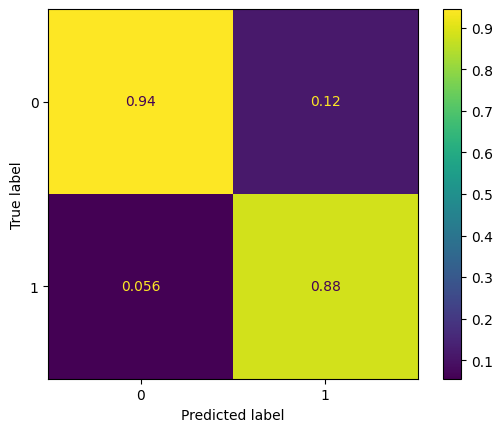

In [ ]:
dfNonHomScores = pd.DataFrame(columns=['Training Session','Test Binary Accuracy',' Test Sensitivity At Specificity 0.5','Test Confusion Matrix'])
start_m = 20
end_m = 32
#### Non-Homogeneous Data Test
prsList = []
for i in range(start_m,end_m,1):
  keras.backend.clear_session()
  loaded_model = tf.keras.models.load_model("/content/drive/My Drive/NEURONDL/ModelsDNN/ModConvBinNormN"+str(i)+".keras")
  prs=loaded_model.predict(X_test_new)
  if len(prsList)>0:
    prsList = np.append(prsList,[prs],axis=0)
  else:
    prsList = [prs]
testPrs= np.mean(prsList,axis=0)
testPrs = np.argmax(testPrs,axis=1)
testResults = pd.DataFrame(columns=[])
testResults['Cell_Name'] = clsTest.tolist()
testResults['Cell_Name'] = testResults['Cell_Name'].astype('string')
testPrsCat= np.mean(prsList,axis=0)
testPrs = np.argmax(testPrsCat,axis=1)
#testPrsCat= np.round(testPrsCat,decimals=0)
testResults['Cell_Prediction_Cat'] = testPrsCat.tolist()
testPrs = np.argmax(testPrsCat,axis=1)
testResults['Cell_Prediction_Bin'] = testPrs.tolist()
# Step 2: Group by 'cell_name'
grouped_data = testResults.groupby('Cell_Name')
test_cell_type_pred = []
for cell_name, group in grouped_data:
    mean_cell = np.mean(group['Cell_Prediction_Cat'].tolist(),axis=0)
    print(np.round(mean_cell[0],3))
    print(np.round(mean_cell[1],3))
    if mean_cell[0] > mean_cell[1]:
        status = 0
    else:
        status = 1

    if len(test_cell_type_pred)==0:
      test_cell_type_pred = [status]
    else:
      test_cell_type_pred = np.append(test_cell_type_pred,[status], axis=0)
    print(f"Cell: {cell_name} - {status}")
m = keras.metrics.BinaryAccuracy()
m.update_state(test_cell_type_pred, testCellType)
bin_acc = m.result()
conf_mat_result = confusion_matrix(testCellType, test_cell_type_pred , normalize='pred')
print(conf_mat_result)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_result,display_labels=None)
disp.plot()
plt.show()
mSens = keras.metrics.SensitivityAtSpecificity(0.5)
mSens.update_state(test_cell_type_pred, testCellType)
sens_spec = mSens.result()


In [ ]:
dfNonHomScores.loc[1] = [1, bin_acc, sens_spec, conf_mat_result]
dfNonHomScores.to_csv('/content/drive/My Drive/NEURONDL/ModelsDNN/DataAugTest/ConvBinNormN_NonHomogeneous_Scores-Data240124.csv')

In [ ]:
dfNonHomScores

Training Session                       Test Binary Accuracy  \
0                 0  tf.Tensor(0.925, shape=(), dtype=float32)   

              Test Sensitivity At Specificity 0.5  \
0  tf.Tensor(0.88461536, shape=(), dtype=float32)   

                               Test Confusion Matrix  
0  [[0.9444444444444444, 0.11538461538461539], [0...